In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold, RFE
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LassoCV

In [0]:
from sklearn.manifold import TSNE
from matplotlib.colors import LinearSegmentedColormap as cmap
from sklearn.feature_selection.rfe import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

[DataCamp Link](https://www.datacamp.com/courses/dimensionality-reduction-in-python)

**Course Description**

High-dimensional datasets can be overwhelming and leave you not knowing where to start. Typically, you’d visually explore a new dataset first, but when you have too many dimensions the classical approaches will seem insufficient. Fortunately, there are visualization techniques designed specifically for high dimensional data and you’ll be introduced to these in this course. After exploring the data, you’ll often find that many features hold little information because they don’t show any variance or because they are duplicates of other features. You’ll learn how to detect these features and drop them from the dataset so that you can focus on the informative ones. In a next step, you might want to build a model on these features, and it may turn out that some don’t have any effect on the thing you’re trying to predict. You’ll learn how to detect and drop these irrelevant features too, in order to reduce dimensionality and thus complexity. Finally, you’ll learn how feature extraction techniques can reduce dimensionality for you through the calculation of uncorrelated principal components.

In [5]:
ansur_f = pd.read_csv("ANSUR_II_FEMALE.csv")
ansur_f.tail()

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,...,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
1981,Combat Support,Army National Guard,Female,285,1392,335,223,1297,252,196,368,299,312,477,72,306,282,136,1089,255,856,652,541,373,1457,290,1082,293,1258,779,732,382,36,60,19,210,746,103,259,328,...,535,486,61,423,121,369,391,1307,118,414,237,1036,354,145,865,840,555,1716,1391,1119,660,155,749,446,136,872,1706,447,334,1043,265,370,1002,162,836,83.2,1.687,29.234331,Overweight,Normal
1982,Combat Support,Army National Guard,Female,262,1324,301,202,1204,236,181,378,294,287,468,66,309,311,145,1016,246,818,572,464,375,1390,291,1016,269,1151,732,647,331,36,65,23,274,770,101,245,319,...,483,457,58,383,130,359,399,1323,99,377,237,1051,318,142,881,794,525,1620,1316,1043,616,157,721,422,131,838,1648,446,334,971,243,374,958,157,804,71.7,1.613,27.558173,Overweight,Normal
1983,Combat Support,Army National Guard,Female,260,1334,318,213,1259,234,183,363,332,299,460,70,317,311,139,1063,262,846,637,525,370,1412,285,1093,286,1166,793,609,326,39,62,18,204,739,97,249,338,...,517,476,57,412,111,352,402,1318,116,392,259,1054,338,136,841,848,566,1740,1337,1054,640,159,758,449,127,862,1590,444,335,982,254,351,970,159,774,76.2,1.644,28.193653,Overweight,Normal
1984,Combat Support,Army National Guard,Female,205,1293,302,199,1207,213,163,376,276,280,426,62,282,267,137,1051,225,786,582,480,370,1377,270,922,243,1137,763,575,310,35,62,21,222,738,91,226,306,...,491,445,58,400,119,326,380,1286,111,375,230,996,321,136,854,791,530,1628,1288,1028,623,163,725,419,135,802,1525,450,298,837,208,335,952,146,769,63.2,1.616,24.201059,Normal,Normal
1985,Combat Support,Army National Guard,Female,238,1346,308,210,1256,236,188,361,285,279,433,71,304,278,129,974,217,820,586,479,343,1401,272,902,219,1186,783,536,307,35,58,23,243,754,100,239,314,...,504,445,66,372,114,325,381,1372,112,390,249,997,339,135,861,821,542,1685,1334,1089,592,162,762,436,130,849,1547,462,299,891,223,394,943,154,797,61.0,1.641,22.652319,Normal,Normal


In [6]:
ansur_m = pd.read_csv("ANSUR_II_MALE.csv")
ansur_m.tail()

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,...,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
4077,Combat Arms,Army National Guard,Male,235,1353,312,216,1263,228,193,384,318,241,457,70,321,301,137,917,231,878,587,497,345,1444,266,954,238,1231,807,606,306,36,61,22,195,762,95,255,329,...,523,476,68,371,123,378,427,1304,112,418,259,1096,348,150,883,865,568,1688,1368,1079,579,162,758,447,140,869,1557,442,279,816,210,347,1016,163,778,67.5,1.688,23.689663,Normal,Normal
4078,Combat Arms,Army National Guard,Male,247,1473,336,234,1346,253,196,428,374,284,536,76,319,316,135,1049,252,899,632,517,399,1533,323,1072,242,1301,848,695,378,35,60,20,299,807,103,263,341,...,565,510,67,420,117,392,430,1433,114,447,265,1199,356,146,938,903,606,1818,1456,1146,662,171,785,472,135,886,1715,475,351,978,235,385,1082,178,873,89.6,1.765,28.761967,Overweight,Tall
4079,Combat Arms,Army National Guard,Male,264,1394,313,227,1280,245,193,407,367,271,501,74,323,316,142,1038,276,857,614,502,378,1469,290,1045,247,1263,787,668,337,38,62,26,257,784,101,263,340,...,527,466,71,413,118,416,444,1310,110,407,257,1181,333,135,895,860,571,1642,1384,1096,605,178,750,439,127,858,1682,483,333,991,258,353,1011,178,822,83.2,1.690,29.130633,Overweight,Normal
4080,Combat Arms,Army National Guard,Male,203,1417,327,223,1314,250,196,419,365,271,493,75,342,327,138,929,209,898,598,499,389,1483,284,984,228,1271,846,603,314,37,61,22,237,782,98,266,322,...,542,489,70,364,123,387,414,1388,115,432,254,1162,358,154,900,874,576,1760,1405,1116,544,170,779,453,118,886,1589,430,293,783,192,350,1062,172,837,73.1,1.718,24.766866,Normal,Normal
4081,Combat Arms,Army National Guard,Male,327,1523,358,226,1408,269,225,442,379,275,531,81,359,364,150,1009,254,981,659,550,396,1595,308,1144,281,1349,931,637,313,36,61,24,214,780,111,295,377,...,596,536,70,410,136,439,477,1399,116,464,295,1231,386,152,896,955,638,1885,1500,1208,622,196,861,509,135,970,1764,511,354,1080,294,389,1119,182,894,98.5,1.828,29.477038,Overweight,Tall


In [0]:
grocery_sales = pd.read_csv("grocery_sales.csv")
grocery_sales.tail()

,storeID,product,quantity,revenue
73,Y,Bananas,902,3169.8
74,Y,Oranges,1441,6856.1
75,Z,Apples,1441,7209.0
76,Z,Bananas,1199,4440.5
77,Z,Oranges,973,3990.4


In [0]:
PimaIndians = pd.read_csv("PimaIndians.csv")
PimaIndians.tail()

,pregnant,glucose,diastolic,triceps,insulin,bmi,family,age,test
387,0,181,88,44,510,43.3,0.222,26,positive
388,1,128,88,39,110,36.5,1.057,37,positive
389,2,88,58,26,16,28.4,0.766,22,negative
390,10,101,76,48,180,32.9,0.171,63,negative
391,5,121,72,23,112,26.2,0.245,30,negative


In [7]:
pokemon = pd.read_csv("pokemon.csv", index_col=0)
pokemon.tail()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [0]:
Public_Schools2 = pd.read_csv("Public_Schools2.csv")
Public_Schools2.tail()

,x,y,objectid_1,objectid,bldg_id,bldg_name,address,city,zipcode,csp_sch_id,sch_id,sch_name,sch_label,sch_type,shared,complex,label,tlt,pl,point_x,point_y
126,-71.092030,42.317660,127,1736,52,Higginson Bldg,160 Harrishof Street,Roxbury,2119,4241,4241,Higginson Elementary (K1-2),Higginson (K1-2),ES,NaN,NaN,61,1,Marice,766503.829431,2.941044e+06
127,-71.037940,42.371568,128,2136,0,Alighieri Bldg,37 Gove St.,East Boston,2128,4321,4321,Alighieri Montessori,Alighieri,ES,NaN,NaN,2,1,Marice,781025.956811,2.960764e+06
128,-71.068150,42.348770,129,2938,0,Church Street Bldg,20 Church Street,Boston,2116,1215,1215,Boston Adult Tech Acad,BATA,Special,NaN,NaN,8,4,Freddie,772904.812815,2.952413e+06
129,-71.145961,42.350441,130,2946,139,Taft Bldg,20 Warren Street,Brighton,2135,1470,1470,Boston Green Academy,Boston Green Academy,6/7-12,NaN,NaN,11,4,Jonathan,751868.385102,2.952925e+06
130,-71.080504,42.326153,131,3346,150,Dearborn Bldg,35 Greenville Street,Roxbury,2119,1260,1260,Dearborn Academy,Dearborn Academy,6/7-12,NaN,NaN,31,4,Anthony,769605.963000,2.944155e+06


#1.Exploring high dimensional data

You'll be introduced to the concept of dimensionality reduction and will learn when an why this is important. You'll learn the difference between feature selection and feature extraction and will apply both techniques for data exploration. The chapter ends with a lesson on t-SNE, a powerful feature extraction technique that will allow you to visualize a high-dimensional dataset.

In [0]:
# match dataset
pokemon_df = pokemon[:160]
pokemon_df['Type'] = pokemon_df['Type 1']
pokemon_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type
#,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Grass
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Grass
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Grass
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Grass
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Fire


Use the `.describe()` method to find the numeric feature without variance and remove its name from the list assigned to `number_cols`.

In [0]:
# Remove the feature without variance from this list
# ans: "Generation"
number_cols = ['HP', 'Attack', 'Defense']

In [0]:
# Leave this list as is for now
non_number_cols = ['Name', 'Type', 'Legendary']

# Sub-select by combining the lists with chosen features
df_selected = pokemon_df[number_cols + non_number_cols]

# Prints the first 5 lines of the new dataframe
print(df_selected.head())

   HP  Attack  Defense                   Name   Type  Legendary
#                                                              
1  45      49       49              Bulbasaur  Grass      False
2  60      62       63                Ivysaur  Grass      False
3  80      82       83               Venusaur  Grass      False
3  80     100      123  VenusaurMega Venusaur  Grass      False
4  39      52       43             Charmander   Fire      False


- Find the non-numeric feature without variance and remove its name from the list assigned to `non_number_cols`.

In [0]:
# Leave this list as is
number_cols = ['HP', 'Attack', 'Defense']

# Remove the feature without variance from this list
# ans: 'Legendary'
non_number_cols = ['Name', 'Type']

# Create a new dataframe by subselecting the chosen features
df_selected = pokemon_df[number_cols + non_number_cols]

# Prints the first 5 lines of the new dataframe
print(df_selected.head())

   HP  Attack  Defense                   Name   Type
#                                                   
1  45      49       49              Bulbasaur  Grass
2  60      62       63                Ivysaur  Grass
3  80      82       83               Venusaur  Grass
3  80     100      123  VenusaurMega Venusaur  Grass
4  39      52       43             Charmander   Fire


###Feature selection vs feature extraction


In [0]:
subset = ['Gender', 'weight_kg', 'stature_m']
ansur_df_1 = ansur_m[subset][:200]

In [0]:
#@title
ansur_df_1["body_height"] = [69.92, 67.01, 68.31, 65.16, 75.35, 67.72, 71.26, 72.83, 69.96,
       71.3 , 70.08, 68.23, 71.42, 73.27, 67.28, 68.5 , 66.69, 69.53,
       68.82, 70.63, 70.08, 66.14, 65.08, 77.13, 69.09, 64.17, 71.85,
       70.67, 68.7 , 71.57, 74.06, 69.29, 65.94, 72.91, 70.28, 70.51,
       66.34, 72.83, 68.39, 68.62, 68.66, 66.1 , 72.28, 68.11, 69.37,
       65.71, 68.5 , 67.28, 73.98, 65.91, 70.04, 72.6 , 64.45, 69.06,
       67.09, 72.44, 70.2 , 68.82, 67.05, 72.91, 63.35, 67.28, 72.24,
       66.1 , 68.58, 66.85, 65.79, 72.83, 69.06, 63.74, 69.76, 67.13,
       63.74, 67.95, 72.44, 68.62, 65.91, 68.9 , 71.61, 70.83, 68.9 ,
       67.83, 71.22, 70.51, 67.83, 62.13, 67.64, 70.83, 68.5 , 67.01,
       68.39, 68.11, 70.28, 71.54, 72.56, 70.51, 65.24, 66.97, 70.31,
       69.09, 61.42, 65.55, 67.36, 65.35, 61.89, 67.2 , 64.72, 65.79,
       59.88, 62.6 , 67.2 , 65.67, 65.12, 65.59, 62.95, 65.87, 64.84,
       66.06, 66.1 , 63.58, 59.72, 65.91, 63.9 , 65.67, 64.72, 62.17,
       56.93, 63.78, 66.3 , 63.74, 62.68, 65.16, 67.83, 66.02, 65.12,
       64.33, 66.26, 61.1 , 63.66, 62.52, 64.61, 66.34, 65.2 , 63.11,
       63.31, 65.51, 63.74, 63.78, 67.72, 62.28, 67.72, 67.72, 66.97,
       64.06, 60.47, 60.87, 65.12, 63.19, 64.17, 63.46, 69.17, 65.75,
       64.25, 64.37, 66.22, 65.39, 62.83, 62.83, 65.55, 63.66, 61.22,
       62.13, 62.24, 66.85, 61.18, 69.13, 61.65, 65.  , 62.4 , 65.24,
       67.68, 71.73, 64.92, 66.42, 66.85, 60.24, 62.24, 63.35, 64.72,
       60.94, 63.23, 64.65, 63.86, 65.71, 68.7 , 58.86, 58.78, 64.61,
       63.27, 61.42]

In [0]:
# match dataset
ansur_df_1.head()

,Gender,weight_kg,stature_m,body_height
0,Male,81.5,1.776,69.92
1,Male,72.6,1.702,67.01
2,Male,92.9,1.735,68.31
3,Male,79.4,1.655,65.16
4,Male,94.6,1.914,75.35


In [0]:
cols = ['Gender', 'footlength', 'headlength']
ansur_df_2 = ansur_f[cols][:200]

In [0]:
ansur_df_2['n_legs'] = 2

In [0]:
ansur_df_2.head()

,Gender,footlength,headlength,n_legs
0,Female,246,191,2
1,Female,249,180,2
2,Female,265,207,2
3,Female,265,206,2
4,Female,247,181,2


####Visually detecting redundant features

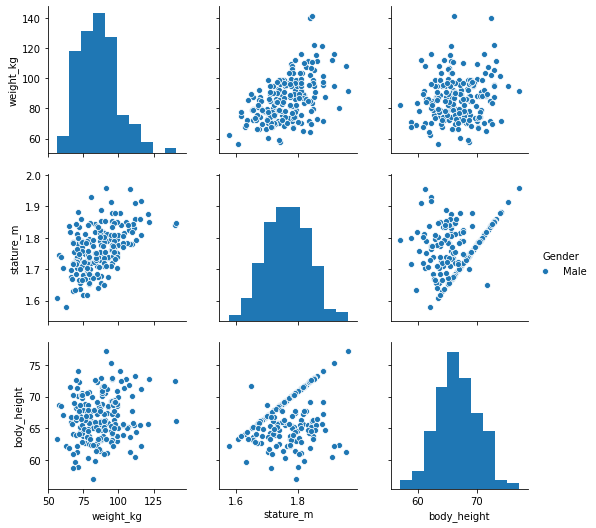

In [0]:
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_1, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

- Two features are basically duplicates, remove one of them from the dataset.

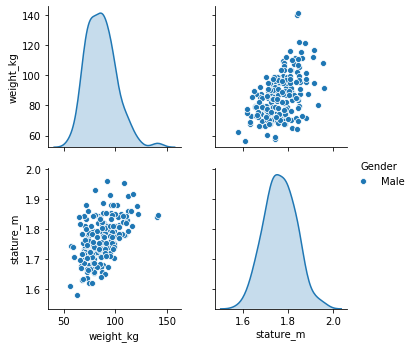

In [0]:
# Remove one of the redundant features 
reduced_df = ansur_df_1.drop('body_height', axis=1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender')

# Show the plot
plt.show()

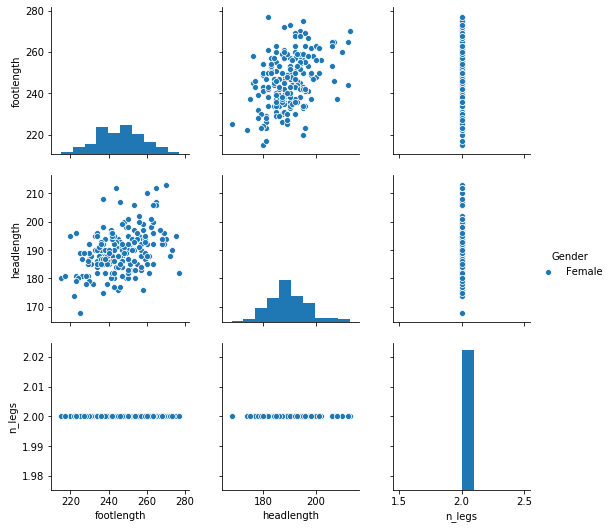

In [0]:
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_2, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

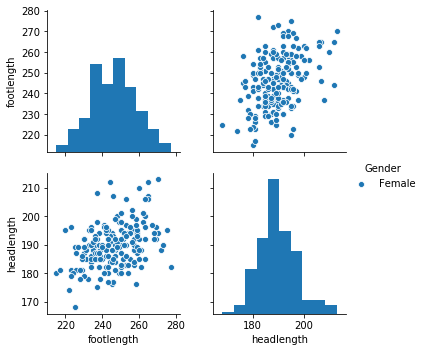

In [0]:
# Remove the redundant feature
reduced_df = ansur_df_2.drop('n_legs', axis=1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

###t-SNE visualization of high-dimensional data

- to visually explore the patterns in a high dimensional dataset.
press


In [0]:
ansur = pd.concat([ansur_f, ansur_m], axis=0)
ansur.tail()

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,...,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
4077,Combat Arms,Army National Guard,Male,235,1353,312,216,1263,228,193,384,318,241,457,70,321,301,137,917,231,878,587,497,345,1444,266,954,238,1231,807,606,306,36,61,22,195,762,95,255,329,...,523,476,68,371,123,378,427,1304,112,418,259,1096,348,150,883,865,568,1688,1368,1079,579,162,758,447,140,869,1557,442,279,816,210,347,1016,163,778,67.5,1.688,23.689663,Normal,Normal
4078,Combat Arms,Army National Guard,Male,247,1473,336,234,1346,253,196,428,374,284,536,76,319,316,135,1049,252,899,632,517,399,1533,323,1072,242,1301,848,695,378,35,60,20,299,807,103,263,341,...,565,510,67,420,117,392,430,1433,114,447,265,1199,356,146,938,903,606,1818,1456,1146,662,171,785,472,135,886,1715,475,351,978,235,385,1082,178,873,89.6,1.765,28.761967,Overweight,Tall
4079,Combat Arms,Army National Guard,Male,264,1394,313,227,1280,245,193,407,367,271,501,74,323,316,142,1038,276,857,614,502,378,1469,290,1045,247,1263,787,668,337,38,62,26,257,784,101,263,340,...,527,466,71,413,118,416,444,1310,110,407,257,1181,333,135,895,860,571,1642,1384,1096,605,178,750,439,127,858,1682,483,333,991,258,353,1011,178,822,83.2,1.690,29.130633,Overweight,Normal
4080,Combat Arms,Army National Guard,Male,203,1417,327,223,1314,250,196,419,365,271,493,75,342,327,138,929,209,898,598,499,389,1483,284,984,228,1271,846,603,314,37,61,22,237,782,98,266,322,...,542,489,70,364,123,387,414,1388,115,432,254,1162,358,154,900,874,576,1760,1405,1116,544,170,779,453,118,886,1589,430,293,783,192,350,1062,172,837,73.1,1.718,24.766866,Normal,Normal
4081,Combat Arms,Army National Guard,Male,327,1523,358,226,1408,269,225,442,379,275,531,81,359,364,150,1009,254,981,659,550,396,1595,308,1144,281,1349,931,637,313,36,61,24,214,780,111,295,377,...,596,536,70,410,136,439,477,1399,116,464,295,1231,386,152,896,955,638,1885,1500,1208,622,196,861,509,135,970,1764,511,354,1080,294,389,1119,182,894,98.5,1.828,29.477038,Overweight,Tall


In [0]:
sub = ['Branch', 'Component', 'Gender', 'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference',
       'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc',
       'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth',
       'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight',
       'eyeheightsitting', 'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength',
       'handbreadth', 'handcircumference', 'handlength', 'headbreadth', 'headcircumference', 'headlength', 'heelanklecircumference', 'heelbreadth', 'hipbreadth', 'hipbreadthsitting',
       'iliocristaleheight', 'interpupillarybreadth', 'interscyei', 'interscyeii', 'kneeheightmidpatella', 'kneeheightsitting', 'lateralfemoralepicondyleheight', 'lateralmalleolusheight',
       'lowerthighcircumference', 'mentonsellionlength', 'neckcircumference', 'neckcircumferencebase', 'overheadfingertipreachsitting', 'palmlength', 'poplitealheight', 'radialestylionlength',
       'shouldercircumference', 'shoulderelbowlength', 'shoulderlength', 'sittingheight', 'sleevelengthspinewrist', 'sleeveoutseam', 'span', 'suprasternaleheight', 'tenthribheight',
       'thighcircumference', 'thighclearance', 'thumbtipreach', 'tibialheight', 'tragiontopofhead', 'trochanterionheight', 'verticaltrunkcircumferenceusa', 'waistbacklength', 'waistbreadth',
       'waistcircumference', 'waistdepth', 'waistfrontlengthsitting', 'waistheightomphalion', 'wristcircumference', 'wristheight']
df = ansur[sub]

####Fitting t-SNE to the ANSUR data

In [0]:
from sklearn.manifold import TSNE

In [0]:
# Non-numerical columns in the dataset
non_numeric = ['Branch', 'Gender', 'Component']

# Drop the non-numerical columns from df
df_numeric = df.drop(non_numeric, axis=1)

# Create a t-SNE model with learning rate 50
m = TSNE(learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(df_numeric)
print(tsne_features.shape)

(6068, 2)


####t-SNE visualisation of dimensionality

In [0]:
#@title
df = [  38, 2401, 3819,   81,  464, 1771, 3190, 2425,  112, 1415,  921,
        282,  377,  343, 3549,  676, 3718, 2005, 1375, 1560, 2815, 2140,
       2872,  362, 3530, 2644, 4067, 2786, 3285, 3454, 1538, 1335, 1841,
        372,  255, 3928,   23, 3561, 1072, 1883, 2335,  835,  303, 3100,
        368, 1808,  711,  714,  210,  461, 1506, 1923,  412,  612, 1569,
       2518, 1614,  503, 1436,  981, 3405,  465, 2354, 2145,  284, 4043,
       3185, 1489, 1642, 2572,  774, 2946, 1501,  109, 3191, 1965, 3214,
       1979, 1287, 1435, 1499, 1529,   87,  802,  434, 2952, 1103,  693,
       2865, 2608,  768, 1106, 1507, 3668, 1782, 1801,  489, 3339, 3951,
        426, 1895,  332, 2828,  697, 2562,  816, 1924, 1065, 1381,  501,
       1658,  991, 1078, 1278, 3766, 1024,  963,  472, 1885,  730, 1800,
       3594,   68, 3978, 1427, 1058, 1679,  638, 1017, 1394,   78, 2471,
       4058, 2207,  571, 2118, 2417, 1303, 1763,  126,  702, 3007,  265,
       1198,  762, 1876, 1027, 1760, 2199,  207, 1990, 1937, 1933, 2412,
       3395, 3379, 1484,  900, 1643, 1988, 1620,  575, 1624,  786, 3894,
       2423, 1959,   83, 3128, 1683, 1135, 1521, 2792, 2038, 1391, 2221,
       1039, 3272, 3054,  665,  917, 1507,  763, 2540, 1935, 1089, 1325,
       3282, 3431, 2430, 1706, 1321, 1940, 1674, 1000, 1130,  556,  523,
       2186,  939, 2885, 1294, 2040, 2239,  433,  225,  171, 3639, 1357,
        246,  660,    3, 3912, 1912, 1630, 3563,  946,  794, 1607, 2273,
        304, 2351, 3526,  690, 1643,  427,  761, 1938,  659,  777, 1919,
        746, 1805, 1441, 1729, 2931, 1233, 1006, 1212, 2551, 3032, 1885,
       1902, 2599, 1783, 1149, 1696, 3485, 1598, 1917, 1749, 1696, 2068,
       1543, 4040, 1733, 2024, 3076, 2693,  118,  365, 1217, 2484, 2311,
       1870,  427, 1389, 2097, 1220, 3865, 1678,  860, 1781, 1525, 3284,
       3239,  701, 3816, 3360, 3062,  733,  230,  360, 3290, 2220, 2871,
       1644,  272,  521, 3001, 1894, 3040,  418, 1183, 3442, 2346,  863,
        505,  688,  716,  220, 1942,  443, 4073, 3596, 3123, 1359,  123,
         52, 3630, 3945,  377,   25,  475, 4050,  484, 1558, 3531,  965,
       2434, 2197, 1670,  185, 1231,   20,  806, 1496, 2051,  569, 2415,
       1059, 1247, 1787, 2855, 1517, 3035, 1057, 1481,  378, 1932, 3052,
       1092, 1571, 2650,  548,   99,  151, 1396, 1548,   15,  488, 1296,
       3370,  168,  372, 1947,  193,  750,  381, 1585, 2411,  398, 1333,
        876, 2756,  788, 1051, 3153, 3678,  358, 1699, 1657, 3631, 1968,
        981, 2583, 2308,  555,  684,   93, 1742,  420,  330, 2544,   41,
         76,  536, 1479,  567, 1279,  438, 2277, 1889,  964,  182, 3237,
         18, 2080, 3302, 1390,  528, 1109, 1219, 3108, 1683,  142, 1414,
       1586,  772,  423, 1155, 1218,  396,  537, 2923, 1157, 1140, 4071,
       1462, 1377,  373, 2922, 3952, 3135,  574,  991,  204, 2284, 3377,
        905, 3231, 2768,  361, 3210, 1798, 1954, 2827, 2942, 3071, 2357,
       1880,  550, 1774, 3693, 1681, 4051,  715, 1781,  544, 2805,  351,
       1394, 2224,  109, 1260, 3731, 2661, 3582,  435,  650,  596, 3449,
        790,  223,  137, 2971,  173, 4002,  835, 1328,   10, 2550, 2654,
       1878, 1701, 2053,  866, 1860,  286,  292, 1745,  698, 2977, 3386,
        551, 3793, 1620,  103, 1893,  785, 1174, 1499,  337, 1077, 1931,
        310,  611, 2150,  867, 1713, 1667,   80, 1261, 4016, 3233, 1697,
       1257, 2876, 1795, 1951, 3830, 1086, 1554, 1487,  487, 2750, 2279,
       1463,  847, 2816, 1739,  946,  198, 1518,  409, 2013, 1038,  744,
       3695, 1460, 1753,  635, 1028, 1859, 1633,  983, 1159, 2059, 1018,
       3629,  471,  492, 2367, 1515, 1311,  277, 1947, 3445, 2160, 2297,
       3387,  752,  802,  428, 2837, 1396, 1983, 3557,  714,  535,  295,
       1769, 1350,   35, 1314, 1311, 1290, 1604, 1193,  353, 1780, 2957,
        658, 1550, 1119,   70, 1347,  504, 3129,  356,  907, 2784, 1031,
        678, 1057, 3280,  312, 2334, 1354, 1435,  901,  510, 1592,   96,
       2735, 1661,  146, 1319, 1008, 3070, 1488,  602, 2487,  794,  961,
       3985, 1952,  652,    5, 3746,  237,   58,  205, 2161, 3476, 3542,
       1111,   13,  800, 1098, 2870,  102, 2403, 1757, 1037, 3352, 1746,
       2840, 2472, 1586, 2456, 2164, 4079, 1469, 1661, 1824, 1585, 1934,
       2087,   17, 3059, 2287, 1948,  330, 3567,  485,  727, 3451, 1539,
       1985, 2746, 3226, 3118, 2595, 1044, 3682,  696, 1272, 1340, 1603,
       2455, 2657, 1428, 2243, 1043, 2505, 1240, 1692, 2502, 1491,  384,
       3434, 1352, 3393,  147, 1777, 3676, 1029, 1917, 2391, 2897, 1299,
       1664, 1632,  349, 1451, 1840, 2016,  804,  430, 3213,  937,  332,
       3702,  189, 1904, 2439, 2682, 2368,  830,  733, 2913, 1352, 2929,
        843, 2300, 1439,  832, 1909, 1812, 2065, 1346,  354,  746, 2137,
        876, 1139,  179,  453,    2, 2078, 1729, 2188, 3177, 2860, 1916,
       1184,  573,  354,   87, 1884,  862, 1580, 2485, 1344, 2373, 3268,
       1245,  905, 2856,  625,  952,  605, 1368, 2785, 1278, 1184,  623,
        911, 3096,  482, 3162, 2564, 2270, 3247, 3439, 2726, 1096,  507,
        429, 2427,  621,  538, 2102, 1280, 1141, 3367, 3389, 1959, 2294,
       3471,  824, 1449, 2928, 3222,  386,  583, 1862, 3615,  444, 1651,
       3633, 3908, 3486, 3620, 1914,  364,  285, 3728,  259,  111,  242,
       1553, 1462, 1483, 2581,  189, 3929, 2882, 2060, 1782, 1500, 2715,
         54, 3876, 3430,  951, 1687,  445, 1145, 3019, 2848,  611, 3761,
        566,  708, 3362, 1954, 1293,  526,  213, 1013, 3253, 2557, 1877,
       1803, 1852, 2359, 3106, 3356, 1870, 1960,  830, 1166, 1533,  958,
       2846, 1758, 2000,  119,    9, 3218, 1277, 3500, 2709, 2938,  986,
       2459, 2892, 1569, 1944, 3479, 2011, 2939, 1766,   13, 2055,  160,
       1614, 3269, 3934, 1283,  791, 3292, 1910, 1493, 1691, 3286, 2829,
         62, 3849, 2706, 1410,  992, 1884,  750,  177,  256, 2506,  184,
       2974, 2754,  283,  825, 2790, 2713, 3459, 3142, 1849, 2793, 1068,
       1453,  883, 3641, 2653,  586, 1939, 2320, 1460, 1208,  172, 1972,
       2135, 3942,  873,  413, 3465, 1867, 1371, 3234, 3034, 3242,  424,
       1114, 1742, 2381, 2361, 1313, 2196, 1087,  751,  562, 3850, 1002,
       3782,  116, 1838, 3959,  532, 3396,  710, 1207,    3,  207,   80,
       1264, 1903, 1234, 1672,  616,   68,  850, 2192, 2316, 2449,  687,
         83,  663, 1168, 1248, 1165, 1101, 2094,  579, 1953, 1382, 2705,
       1405, 3740,  143,  629, 3172, 1776, 1047, 2099,  726, 3216, 3487,
       1361, 1036, 4032,  780, 1312,  605, 1120, 1605, 1728, 2054, 2458,
       1653, 2398, 1061,  743,  174,  323, 3311,   56, 1306,  906, 1575,
       2722, 1416,  337, 3872, 3048,  959, 3650,  283,  113, 1925, 1744,
       1432, 1143, 1816, 1120, 2036, 1116,  314, 1699, 1842, 3301, 1051,
       3021, 1534, 1079, 1199, 3217, 1855, 2029, 2968, 1898,  329,  930,
       3926,   34, 2413, 2119, 2762, 1417, 3136,  508, 3334,  114, 1485,
       2958, 1673, 2512, 1575, 3691,  531, 1020,  210, 1709, 1009,  997,
       1576, 1980, 1190, 2209, 2093,  291,  371,  218, 1407,  673, 1522,
       3345, 2989, 1650,  904, 3800, 3547, 3176,  561, 3161, 1408, 3295,
        997, 3066, 1905, 2925, 1156, 1498, 2376, 1804,  356, 1712, 3723,
        757,  241, 3772, 3716, 1508, 2154, 1310, 1156,  364, 1478, 1045,
       3992, 2406, 2519, 3670, 3204,  872,  888,  100, 3855,  834, 1646,
       2282,  851, 1956, 2847, 2012, 1588, 2462, 1335, 1235, 1506, 3415,
       3871, 1908, 3756, 1622,  116,   79, 1172,  797, 2158, 3814, 1076,
       2477, 1543, 1121, 1961,  294, 1160,    8, 1124, 1208, 2743, 1041,
         47, 3376, 1993,  921, 4074, 3501, 1645, 3047, 1382, 2049, 1331,
       3261, 1324, 1434,  616, 1275,  610, 3621, 2566, 1700,  801, 1173,
        912, 1072,  594,  391, 3077, 2144, 3555, 2194, 1516, 1538, 1719,
        209, 3322, 1196, 4068,  150,  279,  971,  258,  444,  693, 3565,
       1651, 3422, 1253,   26, 2567, 1000, 3757, 1682, 2570, 1748,  600,
       3105,    5,  277,  690,  607, 3973, 1764, 3252, 1112,  278, 2216,
       1263, 3711, 1182, 1503, 3198, 1542,  815, 2687,  134, 1874,   37,
       2195,  624, 1901, 1168, 2831, 3957, 2249,  152, 1385,  717,  380,
        117, 3474, 2173,  850, 1339, 3313,  279,  559, 1093,  621, 3511,
        518, 2717, 2883, 3815, 1629, 1489,  812, 2056,  818, 1734, 3833,
       1266, 2233, 3103, 3384, 2677, 3843, 3171,  291, 3276, 2112, 2930,
       3743, 1981, 1457,  683, 1177, 3968,  533,  389,  838, 2891,  483,
        681, 2984,    1, 1381, 1206,  124, 2976,  522, 2733,   82,  608,
        499, 3883,  299, 3727,  840, 1194, 3342, 1099, 1835, 1400, 1328,
       4038, 1722, 3093, 1636,  281,  262,  419, 3677, 3065, 2281,  450,
       3970,  554, 3635, 4039, 1330, 3863, 2326, 1919,  410, 1030, 1323,
       2868,  202, 1265, 3605, 1380, 1360,  305,   67, 1420,  325, 3461,
        206,  311,  949, 1778, 1469, 1325,  303, 2261, 2649, 1281, 3296,
       1792,   40, 1211, 1728,  208,  256,  987, 1282,  969, 1074, 3200,
       2409, 3338,   71,  666,  495, 1647,  126, 2009, 1154, 1305,  171,
       3323,   47, 1621,  363, 4029, 2765, 1594, 1232, 1617, 1322, 2673,
       1127,  546,  219, 2292,  736, 1897, 3029, 1837, 1726,  592, 1702,
       2918,  369, 3546,  419, 1197, 1315, 1337, 3640, 1546, 3709, 3410,
       2193,  869, 1566,  483,  442,  680, 1602, 3971, 2509,   39,  789,
        499, 3343,  689,  501, 2106, 1478,   79,  105, 1818, 1541, 1170,
       1105,   16,  998,  263, 1250, 2737, 2684, 2110, 1583,  585, 3999,
       1823, 2395,  432, 2622, 1895,  140, 2489, 1684, 3749, 2170,  400,
       3911, 4035, 2602,  620, 2479,  903,  807, 1477, 1198,   46, 3064,
       2047, 2914, 2781,  547,  262,  306, 1115, 1303, 1735, 1504, 2658,
       2202,   98,   90, 4004, 2457, 1212,  865, 1615, 1353,  271, 4066,
        776, 2670, 2289, 1440, 1450, 2100,  567, 2324,  982, 1689,  845,
       1082, 2103, 1677, 1786,  347, 3890, 3183, 1505,  694,  112, 2995,
       1277, 3905,  812, 2162, 2685, 2362, 1854, 3791,  865, 3769, 3131,
       1199, 2527, 3798,  885, 3916,  803, 1007,  897, 3777,  884,  539,
       3132, 1685, 1567, 3355, 3967, 1551, 1391, 2182, 3741, 3953, 1914,
        609, 3174,  942, 1241, 1301, 1504, 2799,  544, 2212,  814,   29,
        950, 1810,  677, 1487, 2142, 4018, 1553, 1016, 1887, 3289, 1814,
        824, 1222,  985, 1196, 1941, 1731,  124,  947,  770,  227,  115,
       3665, 1513,  563, 2508, 1045, 3413, 1639,  620, 1236, 1746, 1795,
       1291,  270, 1020, 3862, 3701,  820,  458, 3739,  129, 1596, 1481,
       1695,  292, 3495,  779,  289, 2312,  904, 1975, 1924, 1334, 1246,
        740, 2576,   55,  805, 3023, 1452, 1048,  319, 3149, 1206, 1909,
       1762, 3792, 3496, 2591, 3725,  740, 3026, 3720,  823, 1149,   95,
        762, 3822, 3083, 1287,  352, 3588, 1249, 3579, 2748, 2499, 1456,
       1401, 1886, 2766, 1317,  454, 1242, 1475,  889, 2310, 1384, 1564,
        534, 1848,  632,  949, 3368, 2838, 1365, 2141, 2907,   72, 3044,
        671, 3341, 3994, 1611, 1159, 1709, 2433, 3895, 1409, 3699, 1613,
        163, 1094, 1475, 2683, 1472,  564,  324, 2445, 1309,  791, 1063,
       1398,  455, 3998,  947, 1085, 1793, 1498, 1179,  392,  629, 1595,
       1667, 3248, 3980, 1764, 1915, 3432, 1964, 2447, 1723, 3580, 3169,
       3201,  269,  792, 1827, 3433,   26,   57,  854, 1275,  808, 2165,
       1933, 1510,  728,  937, 2694, 3278, 1332, 1412, 1181,  238, 1717,
       1013,  945,  144, 1088, 3805, 2949, 1245,   15, 1514, 2879,  411,
       3597,  892, 2325, 1817,  822, 2222, 2973,  612,   33, 1043,  325,
        503,  104,  702, 3315, 3215,  138, 4023, 2926, 3787,   14, 1834,
       2714, 3753, 3884,  889,  478,  588, 3481, 1966, 1116,  874,  980,
        934, 1743, 1765,  732, 1436,  930, 1602, 1480,   61, 3228,  229,
       2218, 1850, 2183, 1761,  654,  368, 3519, 1062, 2818, 1694,  149,
        692, 1535, 1445,  853,  892, 1626, 3499,   96,  633, 2514, 3181,
       1399, 1133, 1333,  514, 3050,  276,  603,  128, 1763, 3613, 3685,
        932,  110, 3859,  810,  301,  378,  944,  347, 1383, 1056,  607,
        286, 2607, 1191,  297,  816,  778, 2902, 1932,  895, 1317, 1014,
       1319, 1692, 1999, 1444, 3365, 1587, 3675,  813,  107,  832,  254,
        661,  302,  243,  308, 2248, 1433, 2095, 3488, 3974, 3116, 2603,
        275, 4080, 1251, 2524, 1809, 1944, 2563,  170, 2474,   56,   48,
        167, 2881, 2803, 3236,  704, 1290, 1963,  327, 1663, 1254, 2290,
        630, 1286, 1825, 3224, 1876, 3543, 1486, 1681, 4045, 1671, 1865,
       1593, 3573, 3051,  852, 4052, 3623,   27,  137,  782, 2444, 1097,
       1117, 1946,   85, 3838,  369, 1321, 3964, 3088, 1237,  224, 2963,
       1221, 1837, 2001, 1640,   52,  236, 1756, 2849, 3562, 1589, 1626,
        473, 1318, 3924, 2621, 3030,  783,  493, 2074, 2466,  857,  527,
       3003, 2797, 1461, 2252, 2276, 1480,  251, 2757, 1915, 2371, 1738,
       1935, 4008, 1316, 3372, 2528, 3143, 2835,  250, 1413,  965, 1100,
       3178,  412,  399, 1829, 1779,  974, 1898, 1266, 2611, 1142,  828,
       2229, 1794,  614, 1388,  313, 1930,  980,  203, 2155, 3170, 1525,
       1807, 1047, 1171,  345, 1557, 3262, 2426, 1857,  362, 1301,  633,
        770,  334, 1579, 2779, 4009, 1308,  459, 1163, 1386, 1205,  585,
       2306, 2791, 1730, 4017, 2741, 2364, 1079, 2874, 2878, 2117,  753,
       1642,  367, 1819,  983, 2723, 2901, 3840, 3589,  512]

In [0]:
df = df.iloc[idx_list]

In [0]:
df.shape

(2000, 94)

In [0]:
#@title
df['x'] = np.array([-1.39077120e+01, -2.86591110e+01, -6.99832300e+00, -1.71715350e+01,
       -4.33686730e+00, -4.14161150e+01, -5.87055320e+01, -4.98159170e+00,
       -5.20536540e-01,  6.72320700e+00,  5.55578500e+01,  3.91918200e+01,
        1.83313320e+00, -6.97911400e+00, -1.22031180e+00,  7.00856600e+01,
       -5.28579560e+01, -1.35871420e+01, -3.97148670e+01,  5.77194370e+01,
        4.35299000e+00,  1.25231800e+01,  1.43569300e+01,  3.89589700e+01,
        2.65767400e+00,  1.24101400e+01, -1.29355950e+01, -2.09992750e+01,
       -3.89679340e+01, -4.52711200e+01,  5.88876380e+01,  4.76282500e+01,
        4.84720950e+01, -3.00678790e+01,  1.17984270e+01,  6.52741050e+00,
       -6.02379800e+01, -7.40922550e+00, -3.41599100e+01, -1.58459015e+01,
       -1.04569360e+01,  2.76392300e+01,  4.04415860e+01, -1.94640060e+01,
        4.30839960e+01, -3.96502230e+01,  1.16938670e+00,  6.81227600e+01,
       -2.14837040e+01, -1.62196800e+00,  4.59618570e+01,  3.75757870e+01,
        3.66271740e+01,  2.23333500e+00,  4.83329930e+01,  4.52051970e+00,
       -2.90014950e+01, -3.27228050e+01, -4.47615500e+01,  4.54050030e+01,
       -4.86144870e+01,  2.93197270e+01, -2.91182940e+01, -4.06354370e+01,
        2.01902730e+01, -3.31388900e+01, -2.10720080e+01,  4.09055820e+01,
        4.86610000e+01, -1.19373230e+01,  3.11507900e+01, -5.18261760e+01,
        5.57073360e+01,  2.65535660e+00, -2.01504340e+01,  3.12573280e+01,
        8.92610900e+00, -7.20861600e+00,  6.18737830e+01, -3.34540440e+01,
       -2.62414030e+00,  5.39243900e+01, -3.16060560e+01, -6.04293170e+01,
        1.66005740e+01, -2.94899800e+01,  6.52818150e+01,  4.19496200e+01,
        1.31114320e+01, -4.82762070e+01, -2.43560900e+00, -1.37744180e+01,
        5.22142330e+01, -4.95572500e+01, -4.39054370e+01,  2.98825780e+01,
        2.53494910e+01, -3.23322450e+01, -1.93501280e+01, -1.03822155e+01,
       -4.30783100e+01,  8.07576000e+00, -2.26415390e+01, -2.89637660e+01,
        1.11183150e+01, -2.72002940e+01, -5.45250780e+01,  5.08175620e+01,
        4.55426330e+01,  3.95809170e+01, -1.26410010e+01, -4.27846870e+01,
        5.86683650e+01, -5.61440200e+01,  2.83724520e+00,  4.31868400e+01,
        3.99408570e+01,  5.96828370e+00,  1.01191030e+01,  5.36069150e+01,
       -4.79458000e+01, -3.83915440e+01,  2.37281880e+01, -3.95409620e+01,
       -1.06379850e+00, -4.25551400e+01,  3.32918780e+01, -3.32148500e+01,
       -4.80595400e+01,  4.07549500e+01,  3.54308850e+01,  1.15698960e+01,
       -8.23923700e+00, -2.02124600e+01,  8.78391550e+00,  1.05633540e+01,
       -4.33205300e+01, -4.48875920e+01,  5.89035800e+01,  3.54287600e+01,
       -4.85651500e+01, -2.17522000e+01,  2.81991700e+01, -3.77698000e+01,
        3.83923230e+01, -4.10381850e+01, -4.61659600e+01,  5.81244660e+01,
       -4.04990600e+01, -5.38996280e+01, -9.10991800e+00,  6.45235700e+01,
        5.35896400e+01, -2.30177480e+01, -1.16452850e+01,  2.02696940e+00,
        5.79469070e+01,  3.16837940e+01,  4.17029230e+01,  1.01923120e+00,
       -2.08938580e+01, -1.44814040e+01, -1.92662300e+01, -4.28360000e+01,
        1.26334380e+01, -4.16371800e+01,  4.74308000e+01,  3.12814520e+01,
        6.19476130e+01,  6.34366230e+01,  4.58107300e+01,  6.76213100e+01,
       -2.14758600e+01, -1.07893540e+01,  3.14119130e+01, -1.96906740e+01,
       -1.66602650e+01, -1.17346070e+00, -8.83943750e+00, -3.56931800e+01,
        4.97783370e+00, -4.55973850e+01,  6.44018900e+01, -8.23297000e+00,
       -5.07059200e+01,  4.02212830e+01, -3.99686970e+01, -1.02185280e-02,
        7.99634360e+00,  8.66068900e+00, -2.36942160e+01, -4.39518800e+01,
       -3.61775600e+00,  6.01429300e+01, -3.61908500e+01, -4.10200000e+01,
       -5.73993000e+01,  3.64439430e+01, -2.16803280e+01, -4.52174330e+00,
       -4.45762560e+01,  5.36031000e+01, -2.57277470e+01, -3.78338780e+01,
        5.84821500e+01, -2.65227640e+01, -6.79847760e+00, -4.29444660e+01,
       -1.82154350e+01,  1.51288670e+01, -1.80897270e+01,  1.03239440e+01,
        1.62340410e+01, -4.62410660e+01,  2.47929130e+01, -5.21650920e+01,
       -1.76977770e+01, -4.12970600e+01, -2.86355060e+01, -9.60705500e+00,
       -3.14048820e+01, -1.67254480e+00, -6.55651760e+00, -4.08970220e+01,
       -1.51251730e+01,  3.58001860e+01, -4.71286800e+01, -5.18005370e+01,
        2.99734610e+01,  2.84632510e+01, -1.03825940e+01,  5.32241970e+01,
        4.81829600e+01, -3.40620300e+01,  4.53933900e+01, -3.07110520e+01,
        4.10821900e+01,  3.14878370e+01,  5.32543030e+01, -1.38053800e+01,
       -2.30410460e+01,  4.86183360e+01,  3.06284180e+01, -6.18872640e+01,
       -3.31766170e+01,  4.11402740e+01, -1.45194270e+01, -2.01986330e+01,
        4.30318550e+00,  2.85638070e+01, -3.58738600e+01,  4.72353970e+01,
       -1.78411350e+01,  5.46962550e+01, -3.92848700e+01,  9.15983140e-01,
       -1.21596240e+01, -6.44386400e+00, -3.61663320e+00,  4.41155900e+01,
        1.33740350e+00,  3.01182560e+01,  1.38561150e+01, -4.53450550e+01,
        1.42520920e+01, -1.18224700e+01, -2.85196860e+01, -2.68189740e+01,
       -5.11693700e+01,  1.43303530e+01,  2.86428410e+01,  5.48697300e+01,
        5.45790500e+01,  7.06064450e+01, -6.18746600e+00, -5.34526100e+00,
       -2.49160120e+01, -2.33059960e+01, -2.74558010e+01, -1.69032360e+01,
       -2.75194260e+01,  1.81306860e+00,  2.25761640e+01, -2.89147510e+01,
       -4.14349860e+01, -4.65628620e+00,  4.69955060e+01, -8.42711400e+00,
        3.02569390e+01, -3.73547020e+01, -4.57994700e+01, -9.15191400e+00,
        4.17725900e+01,  5.65175800e+01, -4.93928450e+01, -2.33054070e+01,
        6.03917350e+01, -8.04250900e+00, -1.29526470e+01, -2.46538100e+00,
        2.37447070e+00, -3.21168630e+01, -1.53514380e+01,  5.99978570e-02,
        1.78166930e+00, -1.87608050e+01,  1.96010450e+00,  4.24508550e+01,
        1.75053630e+01, -1.05913690e+01, -3.44139670e+01,  5.59021570e+01,
        4.65308500e+01, -5.28696600e+00, -2.15451800e+01, -8.56069400e+00,
        4.94999580e+01, -2.68654000e+01,  2.73367100e+01, -3.00596050e+01,
       -2.99166000e+01, -2.54576820e+01,  6.04374470e+01, -9.24311300e+00,
        5.21023400e+01,  4.70562930e+01,  2.12582200e+01, -4.68946000e+01,
       -1.06402620e+01, -5.63195150e+01,  6.77643500e+01,  5.81402360e+01,
        3.00801850e+01, -5.06496770e+01, -3.75580400e+01, -3.17663780e+01,
        6.18142620e+01,  2.64412700e+01, -1.43229330e+01,  1.40903960e+01,
       -1.47761430e+01,  6.67266300e+01, -2.12953230e+00, -4.79412600e+01,
        4.32126540e+01,  6.60817600e+01,  5.12813380e+01,  5.90795330e+01,
       -5.28643750e+00, -3.10951390e+01,  5.76165050e+01, -1.74354720e+01,
       -1.55352000e+00, -4.10050540e+01,  4.06726460e+01, -1.53032660e+01,
        4.29948350e+01,  3.94459320e+00, -5.19665000e+01,  3.55492630e+01,
       -3.17250730e+01, -3.76072000e+01,  5.62111100e+01, -5.87121200e+00,
       -7.21554400e+00,  1.07394770e+00,  3.13003750e+01, -1.70309260e+01,
       -5.29283830e+01, -1.26324400e+01, -2.51187500e+01, -3.23852900e+01,
       -1.20712650e+01,  3.05675740e+01, -1.02015990e+01, -9.72818400e+00,
       -4.12273400e+01,  1.08087520e+00,  5.18553000e+01,  4.36914180e+01,
        2.75841240e+01, -6.10343300e+00, -7.51301340e+00, -2.19425560e+01,
        3.46949500e+01, -4.98353050e+00,  3.59536480e+01,  5.87932470e+01,
       -1.63043610e+01, -2.15692730e+01,  6.00230000e+01, -5.16200600e+01,
        4.64950400e+01,  5.54345100e+01, -1.69849500e+01,  8.33696200e-01,
       -1.78308890e+01, -1.28966550e+01, -3.38158150e+01, -3.44038000e+01,
        1.92616920e+01,  6.17043720e+01,  7.76233140e-01, -2.74213310e+01,
       -2.09788190e+01, -5.05680470e+01,  6.30652240e+01,  5.33839700e+01,
        3.83521730e+01,  2.15634780e+01,  2.12734000e+01, -3.60523200e+01,
        3.80841800e+01,  4.54703500e+01, -2.79361170e+01,  5.56379550e+01,
        6.66130700e+01,  6.32424620e+01,  2.56507680e+01,  9.32675900e+00,
        5.50148050e+01, -2.82273350e+01, -4.77433660e+01, -5.22177600e+01,
        4.21948500e+01,  5.23856740e+01,  8.88761800e+00, -2.00021080e+01,
       -4.25538980e+01,  3.25424100e+01, -3.19773520e+01, -2.26304240e+01,
       -6.63133500e-01, -3.95038830e+01, -4.35403060e+01,  1.57892350e+01,
       -6.84293400e+00, -1.80307180e+01, -1.32202090e+01, -4.57146720e+01,
        5.35617520e+01,  8.70654600e+00, -6.00741160e+01,  8.75546600e+00,
        1.52491500e+01, -2.83364940e+01, -2.04602700e+01, -2.01670530e+01,
       -3.99666520e+01, -2.99572100e+01, -2.70816480e+01, -1.43198060e+01,
       -5.12784230e+01,  4.91138570e+01,  5.84431530e+01,  1.36530520e+01,
       -5.80333900e+01, -7.07646500e+00, -3.26553400e+01,  5.62087200e+01,
       -5.32720100e+01, -3.59231640e+01,  3.10115340e+01, -4.03620400e+01,
        4.09928860e+01, -5.14654540e+01, -9.02991200e+00, -3.12412800e+01,
       -8.04465100e+00,  6.69574100e+01,  1.76307620e+01, -2.78397880e+01,
       -6.57913160e+00,  3.59591600e+00, -3.13313620e+01,  4.96395100e+00,
       -2.91373060e+01, -2.61879440e+01,  3.07228490e+01,  5.39288640e+01,
        5.61953960e+01, -5.79508100e+01, -3.73845940e+01, -6.11156600e+01,
       -3.51326830e+01, -3.94329100e+01,  1.45210960e+01, -1.60663000e+01,
       -3.98233100e+01, -5.34847260e+01,  6.36977200e+01, -1.60284800e+01,
        7.96463430e-01, -4.83495600e+01,  4.60607240e+00, -5.12929530e+01,
        1.09712240e+01, -3.21664770e+01, -2.00200750e+01, -1.09672030e+01,
        1.55843290e+01,  1.76289180e+01, -1.21702710e+01, -5.49251000e+01,
       -5.25461000e+01, -1.94748500e+00, -2.76688860e+01, -5.62651100e+01,
       -3.97569600e+01,  1.29840210e+00, -2.01476520e+01,  4.03557130e+01,
       -3.75625150e+01,  5.98156050e+01, -4.81433900e+00, -1.96325510e+01,
        7.78096250e+00, -3.63563650e+01,  6.27180200e+01, -2.99811340e+01,
        5.16389800e+01,  1.64492780e+01,  3.00001980e+01,  4.74854850e+01,
       -4.93206940e+01, -5.43031230e+01, -5.13561600e+01,  5.94364360e+01,
       -3.54753300e+01,  3.85927660e+01, -5.05858700e+01,  3.06103150e+01,
       -9.72567600e+00, -1.23219150e+01,  4.10150830e+01, -4.23611100e+01,
       -7.24712300e+00, -1.89128130e+01,  2.72752150e+01, -2.59581010e+01,
        3.48921850e+01,  3.34464150e+01,  6.55250260e+00,  1.30014530e+01,
       -2.99896340e+01, -1.28468170e+01,  3.17783800e+01, -8.30963500e+00,
       -1.51131860e+01, -8.63913600e+00, -2.44801620e+01, -5.64569470e+01,
        3.83554460e+01, -1.56116720e+01,  1.10206330e+01, -1.69763550e+01,
        3.20752560e+01, -4.19934160e+01, -6.02777520e+01,  4.68322070e+01,
       -3.60656000e+01,  2.00173840e+01, -1.59036530e+01, -3.84155500e+01,
       -4.97650950e+01,  2.06140770e+01, -2.59617520e+01,  3.27397080e+01,
        1.03922615e+01,  5.16495700e+01, -2.61085100e+01,  7.53171630e+00,
        1.69375290e+01,  3.53846900e+01,  3.34415000e+01,  4.98182450e+01,
       -3.79661640e+01, -9.36130200e+00, -3.04539040e+00,  3.49336300e+01,
        3.65107650e+01,  1.45771440e+01, -1.78424380e+01, -1.22416490e+01,
       -1.03172260e+01,  5.46605400e+00,  1.54514830e+01, -9.56594000e+00,
        4.09777150e+01, -1.31080890e+01, -8.71191100e+00, -1.13506670e+01,
       -1.11522820e+00,  6.12000580e+01, -2.20647740e+01,  4.01436770e+01,
        9.61242500e+00,  2.83014890e+01,  4.74341350e+01, -1.72683050e+01,
        5.93925700e+01,  3.05104400e+01,  1.55526480e+01, -5.11283600e+00,
        2.63388980e+01, -2.15261340e+01,  3.77812600e+01, -2.43911080e+01,
        1.36802000e+01, -2.04855780e-01, -4.48783760e+01, -2.54759710e+01,
       -2.48967130e+01, -2.26908260e+01, -3.74655720e+01, -4.59887430e+01,
        7.02968100e+01,  1.48720890e+01, -5.16620180e+01, -4.17216340e+01,
       -3.29299200e+01,  5.35686070e+01, -1.38538250e+01, -3.58802570e+01,
        9.07762100e+00, -2.81500100e+01,  4.88285100e+01, -1.91967770e+01,
       -4.05953140e+01, -1.44094570e+01, -3.74052620e+01, -1.82798940e+01,
        2.73705120e+00,  3.39054370e+01, -4.44815560e+01,  5.51802540e+00,
        9.10558400e+00, -2.74923560e+00, -2.65439080e+00,  3.72417260e+01,
        1.49792510e+01, -2.06803590e+01, -4.66367700e+01,  6.66409800e+01,
       -4.16144520e+01,  3.12236770e+01,  7.00687000e+01, -1.30721490e+01,
        6.60714100e+01, -3.70501200e+01,  1.72553080e+01, -4.44424670e+01,
       -4.38032600e+01,  1.03807680e+01,  5.87498700e+00, -4.56346500e+01,
       -2.38066390e+01, -1.47070900e+01, -1.97149940e+01,  5.93463630e+01,
       -3.00552200e+01, -4.12261200e+00,  1.08520110e+01,  1.05179860e+01,
        6.43628300e+01, -1.52599780e+01,  1.50026455e+01,  2.34389110e+01,
       -2.32540700e+01,  5.39789900e+01, -1.48517065e+01, -7.34504600e+00,
        5.23120300e+00, -6.85912750e+00, -3.08073580e+01, -4.22962400e+01,
       -2.73405280e+01, -3.40658800e+01, -1.37045965e+01, -8.80569100e+00,
       -3.19279980e+01,  4.15519100e+01, -3.63166900e+00, -5.49478720e+01,
        2.67627530e+01,  3.38101580e+01,  1.52849810e+01, -2.74839730e+01,
       -4.37349850e+01,  2.75496730e+01, -3.30252570e+01,  2.42991580e+01,
        2.58456270e+01, -5.59521450e+01,  3.22190930e+01, -2.75273230e+01,
       -2.27616980e+01,  4.98042300e+01, -1.60532590e+01, -2.61146240e+01,
        5.56452450e+01, -2.92015820e+01,  3.16414030e+01, -2.25673540e+01,
        6.01454700e+01, -4.63179970e+01, -4.87589900e+01, -5.76143070e+00,
        9.02451200e+00, -7.05938530e+00, -2.94027180e+01,  1.02996800e+01,
       -2.09259090e+01, -3.57356220e+01, -3.40115400e+01, -5.46228200e+00,
        2.83719200e+01, -9.63198300e+00,  3.43010250e+01,  3.00834430e+01,
       -2.51579280e+01, -4.50753630e+01, -4.29478760e+01, -1.18659140e+01,
       -1.73711380e+01,  6.57814700e+01,  6.49244400e+01, -2.59986060e+01,
        5.29419000e+01,  3.22968980e+01, -1.63354870e+01,  4.51625400e+01,
        1.49225790e+01, -2.42185460e+01, -4.38081500e+01, -5.04334030e+01,
        1.69528260e+01,  4.88138960e+01, -7.78934840e-01,  1.23969260e+01,
       -4.67853700e-01,  3.02478370e+01, -2.00364260e+00, -3.69282040e+01,
       -2.06022200e+01,  2.52977540e+01, -4.00908000e+01, -3.62271740e+00,
        5.08317260e+01, -3.62905240e+01,  4.27927130e+01, -8.68558900e+00,
       -3.65740800e+01,  1.57799610e+01,  3.19202800e-01, -2.33361660e+01,
        4.33685800e+00, -5.13746640e+01, -2.01726600e+01,  3.37923000e+01,
       -3.10399760e+01,  4.65604740e+01, -2.87441670e+01, -4.34469830e+01,
        6.69884870e+00,  5.73939200e+01, -5.74723770e+00,  1.69340090e+00,
       -2.56839370e+01, -2.24871060e+01, -4.67374940e+00,  4.79522130e+01,
        6.39841200e+01, -4.63037640e+01, -3.02989400e+01, -5.05354770e+01,
        4.22572700e+01,  3.64703140e+01, -1.48096830e-01, -1.08663710e+00,
        5.91153500e+01, -3.36425700e+01, -3.44294120e+00, -1.63417740e+01,
       -5.58170170e+01,  2.96871590e+01, -4.67458000e+01,  4.37062840e+01,
       -4.06457760e+00,  2.94645250e+01, -3.33445660e+01,  3.21203660e+00,
        5.92924800e+01, -4.36652260e+01, -1.71484810e+01, -3.50485730e+01,
       -1.62903240e+00, -2.01287200e+01, -1.55155930e+01, -3.17284100e+01,
        2.78291870e+01,  5.01317440e+01, -1.68034460e+01,  6.02997130e+01,
       -8.76966800e-01, -2.30736180e+01,  2.77994270e+01, -5.17706380e+01,
        1.52505210e+01, -4.83886800e+01, -1.75033700e+01, -4.95678060e+01,
        5.55427930e+01, -2.82923300e+01,  4.82105520e+01, -3.17010920e+01,
       -4.12920600e+01, -3.28169300e+01,  2.81471210e+01,  2.51053980e+01,
        4.01251340e+01, -2.44687800e+01, -3.06397940e-01, -1.50465410e+01,
        5.58467520e+01,  7.03109000e+01,  4.08874780e+01, -2.79050850e+00,
       -5.58563880e+01, -2.53477880e+01, -3.90151700e+01, -3.34914470e+01,
        3.26970100e+01,  2.90919900e+01, -1.78209400e+01,  4.00776820e+01,
       -4.69478300e+01, -2.83470340e+01, -7.76449250e+00,  4.91796260e+01,
       -2.71489750e+01, -1.44103420e+01, -4.06748500e+01, -1.66275860e+01,
        5.36367750e+00, -6.72107500e+00,  4.62901080e+01,  9.50872700e+00,
       -3.77208750e+01, -5.18160250e+01, -8.87472000e+00, -1.92411660e+00,
       -3.79328880e+01,  3.37094080e+01, -2.42566600e-01, -5.21756550e+01,
       -1.35828070e+01, -5.73089070e+01,  5.49016720e+01,  7.83565140e+00,
        8.05030800e+00, -4.58406100e+01, -3.46400530e+01, -3.85612600e+01,
        4.73636050e+00, -3.15635260e+01, -4.97639350e+01, -5.46417400e-01,
       -5.12042300e+01,  4.71530380e+01, -4.44277900e+01,  1.05514530e+01,
        2.56285060e+01, -1.66700610e+01,  5.23940300e+01,  5.68392500e+01,
        2.58311080e+01,  3.51211100e+00, -9.33022000e-01,  4.24619000e+01,
       -5.34785400e+01, -4.59817470e+01,  1.24121650e+01,  4.78951070e+01,
       -1.08140640e+01,  1.40500150e+01, -4.44624560e+01, -5.09984300e+01,
        4.36209700e+01, -2.37869910e+01, -1.92032450e+01,  1.75818040e+01,
       -1.81462170e+01, -5.29933800e+01,  7.91664700e+00,  2.96521470e+01,
        1.92304060e+01, -1.95305940e+01, -1.30359160e+01, -1.66400050e+01,
       -3.46288600e+01,  3.37921180e+01,  1.20061860e+01, -3.01470490e+01,
       -4.35840500e+01, -4.76855130e+01, -3.78343280e+01,  1.30446890e+01,
       -1.72666000e+01, -2.45921120e+01, -3.01098420e+01, -3.64133870e+01,
       -5.39061970e+01,  5.17490540e+01, -2.81667730e+01, -5.47570880e+01,
       -2.91831740e+01, -2.69395350e+01,  1.03439570e+00, -1.13939820e+01,
        4.96846000e+01, -4.32808260e+00,  8.58777900e-03, -2.33286650e+01,
       -1.92019620e+01,  5.22750000e+01, -1.29348770e+01, -2.30204160e+01,
       -6.32013850e+00, -3.23348350e+01,  2.64730300e+01,  3.79720500e+01,
        2.71810510e+01,  3.06404880e+01, -2.53246120e+01,  6.11800770e+01,
        6.35079770e+01, -3.03146300e-01, -6.07139060e+00,  5.37446600e+01,
       -1.50188410e+01, -3.13805770e+01, -2.04156950e+01, -2.07604980e+01,
       -2.91577600e+01,  2.54326950e+01, -1.77136080e+01, -4.73203700e+01,
       -2.29227160e+01, -1.03377770e+01,  5.35945100e+01, -2.92140540e+01,
       -4.39147760e+00, -5.93848750e+00,  3.63381000e+01,  2.77426510e+01,
       -3.18146650e+01, -2.77756480e+01, -2.98301320e+01,  3.25406270e+00,
        5.86556130e+01, -6.11787600e+01,  3.81136700e+01,  2.58673900e+01,
       -5.24968450e+01,  2.84868560e+01, -2.08262300e+01, -2.23474480e+01,
        4.39588360e+00, -3.05913070e+00, -1.99572450e+01,  2.72239070e+01,
        6.51754200e+01,  1.59596260e+01,  4.68894580e+01,  4.66394730e+01,
        5.85670780e+01, -3.80883370e+01, -2.93209320e+01, -5.24071270e+01,
       -3.28242700e+01, -5.11332240e+01, -4.16178700e+00,  3.92625270e+01,
       -5.23699100e+01,  1.01100870e+01, -2.93709220e+01,  1.68253150e+01,
        1.34688430e+01,  1.26250530e+01, -4.72611350e+01,  3.00884630e+01,
        4.27487260e+01, -2.40701300e+00, -2.24058630e+01,  1.37984750e+01,
       -1.87389950e+01,  5.58286550e+01,  5.42589870e+01,  4.27090030e+01,
        5.99796640e+01,  5.74084600e+01, -2.90283060e+00,  5.78330540e+01,
       -1.07121520e+00, -9.66359600e+00,  4.86124800e+01,  2.78814200e+01,
        5.59770740e+01,  6.27812500e+01, -3.15088400e+00, -1.47637680e+01,
        1.00261310e+01,  3.56105350e+01,  3.41857380e+01,  2.21591380e+01,
        2.71141070e+01,  1.61740740e+01, -1.46568760e+01,  4.97254030e+01,
        3.49827300e+01,  2.90763740e+01,  1.39526510e+01, -3.38010600e+01,
       -1.63712600e+01, -5.64435230e+01, -2.94784580e+01, -2.14709260e+01,
        2.95422170e+01, -2.84579160e+01,  1.31074790e+01, -1.23858040e+01,
       -3.73631500e+01,  4.34957600e+01,  9.23252600e+00,  4.24103360e+01,
       -1.52287970e+01,  4.71318360e+01, -2.49825130e+01,  6.70046700e+01,
       -5.06548600e+00,  5.89079740e+01,  1.54844830e+01, -1.23396790e+01,
        3.32082180e+01,  4.60948940e+01,  1.97184800e+01, -2.93465120e+01,
       -1.22711860e+01, -3.21176800e+01, -2.04025330e+01, -6.28875260e+00,
        6.02203250e+01, -3.58114470e+01,  4.52630420e+01,  1.80354560e+01,
       -3.62516210e+00, -1.07221420e+01, -2.66466830e+01,  4.16614840e+01,
       -3.14068660e+01, -4.72666930e+01, -5.51873550e+01, -2.17140350e+01,
        9.40287700e+00,  3.20992770e+01, -1.73201600e+01, -4.73510060e+01,
       -1.98325730e+01,  3.03061770e+01, -1.05570680e+01,  2.19377370e+01,
        3.48220630e+01, -4.16364360e+01,  6.06852200e+01, -7.18435240e+00,
       -4.56375270e+01, -3.10511070e+01,  3.55718000e+01, -4.17384450e+01,
        4.15913800e+00, -5.49227300e+01, -6.86072160e+00, -8.70418800e+00,
       -5.53641030e+00, -1.53434290e+01,  4.78638570e+01,  2.84816440e+01,
       -3.87763790e+00, -4.07520260e+01, -7.63159400e+00, -2.41872460e+01,
       -3.96607400e+01, -3.31551670e+01, -1.08468640e+01, -4.94979700e+00,
        4.31587830e+01, -4.68162350e+01,  4.82890900e+01,  5.07713200e+01,
       -2.02504000e+01,  4.73547970e+01,  5.47421340e+01, -5.03012500e+00,
       -4.98637300e+01, -3.27628140e+01, -1.25348930e+01, -2.95539280e+01,
        2.74054640e+01, -5.99287400e+01, -2.10980660e+01, -4.04006730e+01,
       -9.26479900e+00, -2.00292760e+01,  2.95341990e+01,  1.11832960e+01,
       -4.38558460e+01,  3.67677700e+01,  5.43546200e+01, -2.51651040e+01,
       -3.47590520e+01,  2.07301770e+01, -2.23920610e+01, -5.16647150e+01,
       -5.57864230e+01,  6.04827000e+01,  3.35263250e+01,  1.01701270e+01,
       -3.25951540e+01,  1.56359150e+01,  3.52144740e+01,  1.53030770e+01,
        2.64846120e+01, -8.24614300e+00, -3.95726660e+01,  1.81759870e+00,
       -3.13150100e+00, -3.44586400e+01, -8.89007100e-01, -1.11271960e+01,
       -1.24601755e+01,  5.86068270e+01, -1.94610330e+01, -1.14949140e+01,
        1.39319780e+01, -5.34704930e+01, -2.38833140e+01,  1.08481760e+01,
        6.00980530e+01,  5.33152200e+01, -2.78289870e+00, -4.64459720e+01,
       -2.20382040e+01, -1.46745380e+01,  1.73240490e+01,  5.30354040e+01,
        1.88605650e+01, -4.72313160e+01,  2.18531740e+01,  1.57360790e+00,
       -4.71810950e+01, -8.72179200e+00, -4.98174130e+01, -3.94231030e+01,
       -4.48475570e+01,  7.30380730e+00, -7.41369300e+00, -3.13007400e+01,
        2.49277150e+01, -1.05169620e+01,  2.91492400e+01, -5.86641200e+01,
        4.78222900e+01, -3.23228570e+01,  4.96962600e+01, -2.95930060e+01,
       -4.99775050e+01,  2.50692870e-01, -4.56175900e+01,  1.84242150e+01,
       -4.39316520e+01, -1.69002930e+01,  4.55135840e+01, -2.23544710e+01,
        2.05711300e+01, -4.77362900e+01, -5.42216150e+01,  2.86389580e+01,
       -3.27502600e+01, -1.06550670e+01,  4.43631600e+01,  4.63027840e+01,
       -4.48653450e+01, -8.86807200e+00,  4.00332700e+01, -8.75159860e-01,
       -4.83464900e+00,  2.93556880e+01, -8.70925900e+00,  4.47283630e+01,
       -2.07616560e+01, -1.32063800e+01,  5.05976560e+01,  2.87613150e+00,
       -3.22143940e+01, -4.74032140e+01, -9.27201200e-01, -5.04687700e+01,
        6.22476600e+01, -5.12559550e+01,  2.62970830e+00,  4.79223180e+01,
       -4.10898930e+01,  5.05796550e+01, -5.46284330e+01, -2.64800340e+01,
        5.44904570e+00,  4.44352600e+01, -4.99470980e-01, -2.34617270e+01,
        5.58243980e+01, -2.49866120e+01,  1.41046190e+01, -3.95616260e+01,
        4.44033500e+01,  4.10202300e+01, -2.25983720e+01,  1.95711860e+01,
       -3.29533900e+01,  2.05855540e+01, -2.87437020e+01,  2.93180970e+00,
       -2.64709900e+01, -7.08944940e+00,  2.71452960e-01, -3.32413140e+01,
       -1.61454330e+01,  2.75372220e+00,  4.55565400e+01, -6.04466600e+00,
       -8.61958000e+00, -5.50292400e+00,  2.47578430e+00,  5.46204400e+01,
       -2.86838780e+01, -6.16010550e+01, -1.21649130e+01, -2.82565040e+01,
       -2.10718480e+01, -3.73091770e+01,  6.54344560e+01, -3.18389030e+01,
       -1.55217370e+01, -5.66005360e+01, -4.94313800e+01,  2.38890760e+01,
       -4.19659770e+01, -3.69493680e+01,  8.31052000e+00, -2.72902550e+01,
        5.34132730e+01,  5.55301700e+01,  5.55650600e+00,  9.77850500e+00,
       -5.03959660e+01,  8.88155700e+00, -1.73222900e+01,  2.91111970e+01,
       -4.89840430e+01,  5.92286600e+01,  6.90967200e+01, -3.75180630e+01,
       -1.64946440e+01,  4.15311700e+00,  2.48014800e+01, -3.37335780e+01,
       -5.52483130e+00, -3.75498430e+01,  6.38759500e+01, -5.32285150e-01,
       -1.79915850e+01, -5.47367200e+01,  1.34942450e+01,  2.25176850e+01,
        6.59660400e+01, -2.20473670e+01, -5.89790420e+01, -1.95763930e+01,
       -5.29966350e+01, -1.15085945e+01,  5.41851840e+01, -4.57584650e+01,
        4.34154900e+01,  6.88809300e+01, -4.28925280e-01,  6.22399700e+01,
       -1.32818780e+01,  4.21347960e+01,  1.43826030e+01, -5.93725280e+01,
        1.49885870e+01,  4.78101730e+00,  3.31062620e+01, -1.21570330e+01,
        5.89509340e+00,  2.73198320e+01,  3.37559400e+01,  4.03847100e+01,
        5.06456800e+01, -2.12230590e+01,  5.54719050e+01,  1.15418100e+01,
       -1.23686110e+01,  5.74933620e+01,  6.16121500e+01, -4.16636160e+01,
       -5.32215920e+01,  3.30656470e+01,  4.08867900e+00, -1.00314620e+01,
        4.90942840e+01, -3.41367260e+01, -3.91257130e+01,  5.20581700e+01,
       -1.08901020e+01,  2.86590040e+01, -4.52208200e+01,  4.31268000e+00,
        1.48924710e+01, -4.35209350e+01, -5.38042340e+01, -2.55268420e+01,
        2.91687950e+01,  4.02325130e+01, -3.45554660e+01,  3.27117770e+01,
        5.02566800e+01,  4.17531170e+01, -4.29711380e+01,  3.07584530e+01,
       -1.44309180e+01, -1.28116760e+01,  6.45443060e+00, -2.97754520e+01,
        6.39611130e+01,  2.85202850e+01, -2.93811530e+01,  3.98841820e+01,
       -4.24751970e+01, -2.66354560e+01,  6.43538000e+01,  6.39820900e+01,
        3.54446600e+01, -2.94841380e+01,  2.68680780e+01,  2.16498800e+01,
       -8.98449400e+00,  1.08058460e+01,  8.70002400e+00,  3.36668970e+01,
        4.10396500e+01, -2.62565250e+01, -5.03305360e+01, -2.32625790e+01,
        5.79441570e+01, -2.15254730e+01, -3.41187290e+00, -4.89840600e+01,
        5.60690160e+01,  1.03790650e+01,  1.02492590e+01,  5.60033650e+01,
        1.68506030e+01,  1.80867160e+01, -2.21392380e+01, -3.08772140e+01,
       -5.56198700e+01, -2.35309960e+01,  5.58687800e-01,  5.75682450e+01,
        1.23742340e+01,  3.29653320e+01, -2.11946100e+01,  6.38254240e+01,
       -5.18108670e+01, -3.52481900e+01, -1.41657370e+01,  6.27071720e+01,
        5.83044800e+00,  4.38747250e+01,  3.87188700e+01, -3.78717500e+01,
        6.21972730e+01,  5.37528600e-01,  5.14816430e+00,  3.86623540e+01,
       -5.37827950e+01,  6.05057070e+01, -5.00605550e+01,  3.05614150e+01,
       -1.18477740e+01, -5.42100870e+01,  4.30408950e+00,  3.60392380e+01,
        6.87799500e+01,  5.06784800e+01,  3.57429800e+01, -5.13750950e+01,
       -7.83570430e+00,  4.94944570e+01, -3.68305100e+01,  4.75021600e+01,
        5.10383870e+01, -3.74569550e+01, -2.51523040e+01, -4.85538500e+00,
       -1.79215980e+01, -3.00410500e+01,  4.75112000e+00,  4.59562760e+01,
        5.34597600e+00,  1.55853500e+01, -3.93411090e+00,  4.85521550e+01,
        3.18034460e+01,  1.21587830e+01,  4.13962670e+01, -2.31702850e+00,
       -1.91766510e+01, -1.71154040e+01, -3.29050330e+01, -3.65796180e+00,
       -2.06718830e+01,  5.39588620e+01,  5.44414470e+00, -1.02851660e+01,
        3.93679000e+01, -1.70744860e+01,  6.70566900e+01, -1.30880170e+01,
        1.16970770e+01, -4.78825040e+01, -2.69082240e+01, -1.78932820e+01,
        1.31648290e+01, -3.90355000e+01, -6.04436570e+01,  3.59532850e+01,
        5.26815400e+01, -5.42593200e+01, -1.41514120e+01, -3.54823110e+00,
        1.71437550e+01, -1.82654270e+01,  3.72563250e+01,  8.28396600e+00,
       -1.76661170e+01, -2.57672350e+01, -4.49312300e+01,  7.08735800e+01,
        2.86794850e+01,  2.69615420e+01,  1.34284890e+01,  3.66834800e+01,
       -4.78981440e+01, -2.74242330e+00,  1.68014160e+01, -1.98558000e+01,
       -3.09238530e+00,  3.46864660e+01,  1.22743370e+01,  1.45459340e+01,
        2.69463200e+01, -1.48114920e+01,  3.48844960e+00, -3.49683950e+01,
        3.06786700e+01, -5.85352670e+01,  6.45772500e+01, -4.44526520e+01,
       -1.16754400e+01, -1.83106960e+01, -3.08985650e+01,  4.39921380e+01,
       -2.88698560e+01,  2.20239350e+01,  4.28227420e+01, -2.47573150e+01,
       -1.84726870e+01, -1.91143700e+00, -2.42460200e+00,  4.97253230e+01,
       -5.59262470e+00,  5.13598670e+01, -2.25978500e-01, -4.57260600e+01,
        6.95321000e+00, -3.49569150e+00, -3.49122500e+01, -3.58201450e+01,
        4.99469040e+00,  3.55397070e+01,  1.13877830e+01,  4.35207600e+01,
       -4.43421440e+01,  1.16896160e+01, -6.11153700e+00, -2.74553100e+01,
       -8.44074000e+00, -2.33614750e+01, -1.17726610e+00, -3.42731200e+01,
        5.53721800e+01, -3.92580220e+01,  5.05773600e+00, -2.37728820e+01,
       -7.73825900e-01, -4.24146400e+01,  5.29257970e+01,  9.75988300e+00,
        3.48148160e+01,  4.82866740e+01, -4.24982830e+01,  6.17324600e+01,
       -1.09499130e+01,  6.96855600e+01, -8.36357900e+00,  6.10676200e+01,
        4.56529660e+01,  3.74175900e+01,  4.42034630e+00,  5.14152760e+01,
       -2.03180660e+01, -4.81545700e+01, -5.99493170e+00,  6.44250970e+00,
       -4.81412770e+01, -3.10294530e+01, -4.59368360e+01, -2.40568040e+00,
       -9.97735300e+00, -3.47081530e+01,  4.70484430e+01, -1.58185940e+00,
       -2.40932850e+01,  2.67035880e+01, -4.54224050e+01, -1.91065370e+01,
        1.42942915e+01, -1.86532880e+01,  4.40051160e+01, -3.06437150e+01,
        5.19265820e+01,  2.90744440e+01,  2.36592940e+00,  3.79978520e+01,
       -2.95067700e+01, -1.66287940e+01, -7.86198230e+00, -5.12723160e+01,
       -2.91919650e+01,  5.63929820e+01,  5.73416180e+01,  3.36384400e+01,
        1.93277280e+01, -1.14368280e+01, -1.67909280e+00,  3.52541330e+00,
        4.81517940e+01,  8.83532700e+00,  4.77723400e+01, -1.53809260e+01,
       -1.93535480e+01, -4.57331960e-01, -1.86702580e+01, -2.24968850e+01,
        1.77265550e+01,  4.20935020e+01, -4.30863100e+01, -3.79840200e+01,
       -1.95367640e+01,  5.47331160e+01, -1.76380790e+01,  3.81332020e+00,
       -1.17902740e+01, -5.18696860e+01,  6.05389330e+01, -2.52966650e+01,
       -4.67377780e+01,  3.37178880e+01,  3.44069300e+01, -4.99158470e-01,
       -2.82701000e+01, -2.36655100e+01,  2.59255640e+01, -5.78595640e+00,
       -4.09997020e+01, -3.43096500e+00, -3.08886890e+01, -7.44569640e+00,
        5.03602830e+01, -5.27138800e+01, -3.13139670e+01,  4.26443670e+01,
       -3.16511690e+01,  6.18645000e+01, -2.72435360e+01,  1.41164290e+01,
       -3.43841130e+01, -2.59755230e+01, -4.92936500e+01,  9.32751000e+00,
        3.80027100e+01, -2.09010560e+01, -3.64723130e+01, -3.66872560e+01,
       -4.97737580e+01,  1.89244650e+01, -2.56153300e+01, -2.63360900e+00,
        2.54584260e+01,  5.63416860e+01,  3.60720940e+01,  3.44759250e+01,
        6.78955000e+01, -3.49741000e+01,  1.46927490e+01, -3.34393790e+00,
        6.49386140e+01, -4.67828940e+01,  2.60443940e+01,  4.74309040e+01,
       -1.64011290e+01, -1.89899000e+01, -3.29954950e+01, -3.50957370e+01,
       -3.03223550e+01,  1.26994210e+01, -5.28344080e+01,  5.54190140e+01,
        1.36452330e+00, -5.43247220e+01, -3.02679860e+01,  9.10981100e+00,
       -4.07100520e+01,  5.34296450e-01, -2.73800370e+00, -3.49777640e+01,
       -2.17780400e+00, -3.19587420e+01, -4.44908070e+01, -3.54519770e+01,
        1.26062620e+01,  1.29793110e+01,  5.70049500e+01, -2.84126170e+01,
        5.45521620e+01, -1.81478940e+01,  3.85380200e+01,  5.26561500e+01,
       -1.69256740e+01,  5.91202930e+01, -4.71440800e+01, -4.44659100e+01,
        2.84293300e+01,  6.85143300e+01,  6.54752700e+01, -4.24183300e+01,
        2.69059200e+01,  3.68636360e+01, -4.11639600e+01,  5.67621000e+01,
        1.17664420e+01,  6.21294500e-01,  7.54847470e-01, -2.52194900e+01,
       -4.60566180e+01, -7.04888500e+00, -1.87054940e+01, -3.34372800e+01,
        3.03341560e+01,  3.96928550e+00, -3.25015800e+01, -5.43106300e+01,
       -3.41436420e+01, -2.04306620e+01,  8.76571000e+00, -2.65032730e+01,
        7.19137900e+01,  3.94662320e+01, -9.76970300e+00, -3.09452500e+01,
       -7.02884700e+00,  5.46003870e+00, -2.00116020e+01,  3.79545820e+01,
       -1.26085415e+01, -1.33819590e+01, -3.90498000e+01,  1.30367830e+01,
       -7.12450500e+00,  5.66795400e+01, -4.51203200e+01, -8.16244900e+00,
        1.92806330e+00,  4.17968800e+01,  1.25683880e+00,  4.54793360e+01,
       -2.72920590e+01,  1.55161120e+01,  3.81471500e+00, -2.57669160e+01,
        3.57411730e+01, -1.20553860e+01, -2.22341100e+01, -5.30063550e+01,
       -5.08467060e+01,  1.29621900e+01, -5.81668970e+01,  5.33016050e+01,
       -3.84761430e+01, -5.26809700e+01, -4.23931100e+00,  3.83504600e+01,
       -5.27586800e+01, -6.28055860e+00,  3.57710500e+01,  2.22406600e+01,
       -6.27613500e+00,  5.31433900e+01, -4.50534630e+01, -2.11618600e+01,
        2.26885900e+01, -3.67160800e+00,  1.02634600e+01, -3.39702220e+01,
        5.73393730e+00,  1.96448540e+01, -1.10282810e+01, -1.19012120e+01,
        1.59376720e+01, -2.69472790e+01,  5.38675730e+01,  3.61858440e+01,
        2.74683950e+00,  4.38847540e+01, -9.13646200e+00, -1.88876130e+01,
        3.93227800e+01,  5.99965930e+01, -1.84524940e+01,  4.65375000e+01,
        5.82489800e+01,  3.89282300e+01, -1.43556185e+01,  1.26545670e+01,
        4.38471800e+00,  1.76932580e+01, -5.86841250e+00, -2.57447780e+01,
       -4.15781250e+01,  3.19355550e+01, -2.65120300e+01, -2.70158650e+01,
        1.26513990e+01,  1.03123255e+01, -3.63750080e+01, -4.37319100e+01,
       -4.99266540e-01, -5.03739620e+01, -5.78903600e+01,  7.74661700e+00,
       -3.19607450e+01,  6.59743040e+01, -3.64003370e+01,  2.69570480e+01,
        5.38059800e+01, -3.56435130e+01,  1.61375560e+01,  2.59321800e+01,
       -4.06547240e+01, -5.10625570e+01,  4.91895980e+01, -4.13300060e+01,
       -1.70095120e+01, -1.97585300e+01, -3.52416950e+01, -4.08726350e+01,
        5.41225430e-01,  6.57881900e+01, -3.30126150e+01,  2.09042870e+01,
       -6.93127730e+00,  5.56810230e+01,  1.91712680e+01, -2.53533500e+00,
        4.59203300e+01,  9.18559900e+00,  3.33928600e+01,  1.07258150e+01,
       -5.79839800e+01, -3.54579430e+01,  5.41235770e+01,  6.53593800e+01,
        1.17985390e+01, -3.29741670e+01, -6.93348300e+00,  7.39746570e+00,
        4.99615670e+01, -2.73967950e+01, -4.41224440e+01,  3.39845000e+01,
       -3.40757330e+01, -3.17610150e+01,  5.58526100e+01, -4.23183440e+01,
       -6.01557240e+01,  4.05345960e+00,  6.56632840e+01, -3.05559940e+01,
       -5.76459000e+01,  1.12467560e+00,  4.82312800e+01, -1.44662020e+01,
        3.19942570e+01,  1.51221560e+01, -1.67688030e+01,  4.62354770e+01,
        5.83413160e+01, -3.10374010e+01, -9.13777050e-01, -3.87833140e+01,
        4.31602100e+00, -1.55421690e+01, -1.78938900e+01, -1.31162300e+01,
       -1.53787300e+01,  5.93266530e+01, -3.37319040e+00,  6.62322300e+01,
       -5.43549600e+00,  1.37467220e+00,  6.10050050e+01, -3.94419800e+01,
        2.33854560e+01, -2.11525360e+01,  4.56168300e+01,  2.64143280e+01,
        5.71261500e+00, -2.80512100e+01, -3.36845860e+01, -2.08903300e+01,
        7.12587100e+01,  6.17138000e+01, -1.72550200e+01, -2.11675100e+01,
       -8.25970700e+00,  3.62354700e+01, -4.06737700e+01, -4.21459470e+01,
        2.75188000e+01,  5.92313000e+01, -3.35902140e+01,  2.66791440e+01,
       -3.53192400e+00,  6.29873920e+01, -2.90143850e+00,  7.87275840e+00,
       -3.37519070e+01, -1.18719020e+01, -5.71188850e+01, -2.59505860e+01,
       -4.02887650e+01, -2.52024420e+01, -2.92897750e+00, -2.10354160e+00,
        3.88182370e+01, -3.67680900e+01,  3.11438710e+01, -4.14916570e+01,
       -1.21839160e+01, -3.00672630e+01,  5.62546100e+01,  6.34035030e+01,
       -1.99687160e+01,  4.27042540e+01, -2.40622470e+00, -2.40953580e-01,
       -3.38901250e+01,  2.99213430e+01, -5.01920300e+01, -1.41852170e+01,
       -2.52960030e+01, -1.42672630e+01, -2.64629000e+01, -2.50934200e+01,
        1.10744040e+01,  4.21452600e+01, -1.54512110e+01, -3.98861960e+01,
       -5.33202300e+01,  5.85233300e+01,  2.47416020e+00, -2.60060800e+01,
        3.96049100e+01, -4.61984630e+00,  1.46463720e+01, -4.23768000e+00,
        1.87417320e+01, -1.43377000e+01, -2.49262520e+00, -2.25856020e+01,
        5.34832340e+01, -1.50321980e+01, -4.26213460e+01, -2.14110680e+01,
        3.93977700e+01, -2.96038680e+01, -4.87608950e+01,  5.60745000e+01,
        6.42115900e+01, -3.74498940e+01,  3.72416760e+01,  3.85223650e+00,
        3.23699570e+01,  2.83760850e+01, -4.61194150e+01,  5.17707820e+01,
       -1.03616150e+01, -2.42123370e+01, -5.43048800e+01, -3.42020870e+01,
        6.81904300e+01,  5.10306320e+01, -4.67033050e+00,  6.60390000e+01,
       -3.58110800e+01, -3.10760300e+01,  6.16780430e+01, -1.75933590e+01,
        3.45094870e+01,  2.69085180e+01, -2.84689180e+01, -1.54357390e+01,
       -8.70626600e+00, -8.81885300e+00, -7.76002550e+00, -1.08566090e+00,
        2.79174500e+01,  7.55675260e-01,  6.46135560e+01, -1.09962080e+01,
        2.02302500e+01, -3.04576450e+01, -2.23804050e+01, -4.74586100e+01,
       -3.78820340e+01,  4.35109900e+00,  2.07109760e+01, -5.29768100e+01,
       -7.53810260e+00,  5.18605350e+01, -3.34103360e+01, -2.30872520e+01,
       -2.84125860e+01,  5.48881200e+01,  4.94180260e+01,  5.32505870e+01,
       -3.28749000e+01, -9.84058400e+00, -5.42450640e+01,  4.88720250e+01,
       -2.96554850e+01,  5.45141360e+00, -5.69534640e+00,  2.76200300e+01,
        4.47565960e+01,  5.10782620e+01, -9.37701900e+00,  4.58850700e+01,
       -4.11362400e+01,  3.87978200e+00,  6.81317300e+01, -1.65865270e+01,
        3.65450360e+00, -4.75820660e+01, -3.22820630e+01, -4.42903440e+01,
       -2.99113700e+01,  1.76068520e+01,  6.41259160e+01, -3.27210730e+01,
        3.11314750e+01,  5.71827470e+01,  5.85539900e+01,  6.97775200e+00,
       -4.22262150e+01, -1.22356610e+01, -1.99690170e+01, -2.76412120e+01])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:500: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [0]:
#@title
df['y'] = np.array([ 2.16537840e+01, -3.69155200e+01, -2.20384360e+00,  1.71514200e+01,
        1.67665980e+01, -4.97304060e+00, -2.16534040e+00,  3.19952240e+01,
       -2.10839900e+01,  2.18931050e+01, -2.72775500e-01,  1.04112650e+01,
        1.86959570e+01, -9.28831000e+00, -2.40064280e+01,  8.58043200e+00,
       -3.13257350e+01, -1.16645320e+01,  5.26925560e+00,  1.23217090e+01,
        2.70877060e+01,  2.03415720e+01,  8.24529900e-01, -6.34846540e+00,
        2.10047990e+01, -1.30574170e+00,  1.87608790e+00,  2.39987010e+01,
        3.33502860e+00, -1.24646160e+01,  1.68074040e+01,  6.66923700e+00,
        2.50567040e+01,  1.44550570e+01,  2.84193730e+01,  1.99968900e+01,
        7.05129500e-01, -2.74492500e+01, -3.05634000e+01,  2.32787670e+01,
       -1.74240000e+01,  2.03513170e+00, -1.34263525e+01,  2.54386370e+01,
       -5.70766870e-01, -7.12535570e+00, -2.81598000e+01,  1.28037250e+01,
       -6.43456600e+00, -1.55160630e+00,  6.04335370e-01, -6.21966600e+00,
        7.69155800e+00, -2.76213110e+01, -1.10884530e+01, -8.83499900e+00,
       -2.30921340e+01,  2.24957350e+01, -2.68022120e+01,  6.63483700e+00,
       -3.20869670e+01, -5.76715760e+00, -1.08550800e+01, -1.50952540e+01,
       -1.80130700e+01, -1.11625270e+01,  3.15999720e+01, -7.16973200e+00,
       -4.15207600e+00,  1.75023600e+01, -7.02312560e+00, -2.48031080e+01,
        1.57449760e+00, -1.51142190e+01, -4.32611100e-01, -1.61183090e+01,
        5.96348700e+00, -1.78889270e+01, -5.16750900e+00,  8.97824800e-01,
        1.35619650e+01, -1.34311080e+01, -6.92521050e+00, -2.57325960e+00,
       -1.73498020e+01,  3.53259090e+00,  1.70195050e+01,  1.18138030e+01,
       -8.81074900e-01,  1.07428480e+00,  1.34244840e+00,  1.10260180e+01,
       -1.54501190e+00, -1.08663630e+01, -4.27877600e+00,  2.32825180e+01,
       -1.56447400e-01, -1.37297420e+01, -2.91353420e+01,  2.71298050e+01,
       -1.63745470e+00,  1.00067900e+01,  3.24335980e+01,  1.75406950e+01,
        2.18209900e+00, -3.30459430e+00, -2.99949320e+01,  8.81910700e+00,
       -9.86131700e+00,  5.78599200e+00, -1.94224240e+01, -2.93143900e+01,
        1.85801540e+01, -9.80997700e+00, -4.07013940e+00, -1.18766300e+01,
        1.03649840e+01, -2.31050070e+01,  2.67103350e+01, -1.61172640e+00,
       -8.41512800e+00, -2.94256900e+01, -1.11498500e+01, -2.56279870e+01,
       -2.20149020e+01, -1.80339530e+01, -2.05126110e+01,  4.25803140e+00,
       -1.81242660e+01, -8.53706800e+00, -1.76376720e+01, -2.78986430e+00,
        3.06626000e+01,  1.76906090e+01,  2.43197460e+01,  1.57765540e+01,
        7.00997000e+00, -3.35629840e+01, -2.70721530e+00,  9.85419900e+00,
       -2.24587330e+01, -3.07494240e+01, -1.51374150e+01, -2.17092320e+01,
        1.26241150e+01, -3.06305460e+00, -1.73563370e+01,  2.07301080e+01,
        5.41401960e+00, -2.62784920e+01, -1.29248660e+01,  4.98984150e+00,
       -1.18077720e+01, -1.48648200e+01,  2.69326630e+01, -6.18933340e+00,
        2.05746840e+01, -7.69566200e+00, -1.36492450e+01,  1.35153520e+01,
       -1.64842800e+01, -7.37849900e+00,  2.73768630e+01, -1.35550750e+01,
        2.24143900e+01,  2.90514100e+00, -3.15747860e+00,  1.17269050e+01,
       -1.19926010e+00, -6.27541900e+00, -7.83708670e+00,  6.34656330e+00,
        3.56598140e+00,  3.29427950e+01,  8.63277800e+00,  3.15656500e+01,
       -1.41439710e+01,  3.15650040e+01,  1.63348220e+01, -1.89542500e+00,
       -9.81419700e+00, -9.26909400e+00,  5.01957400e+00,  2.88665060e+00,
       -2.03286720e+01, -1.28950340e+01,  9.87341500e+00, -2.75573840e+01,
        2.11545520e+01, -2.48283460e+00, -2.76094740e+01, -2.25572260e+01,
        3.33650600e+01,  1.19938690e+01,  1.52767940e+00, -3.01872980e+01,
        1.04942520e+00, -6.54159980e+00,  2.89243740e+01, -2.31225590e+00,
       -2.09058720e+01,  7.67975850e+00,  3.33203800e+01,  4.24250270e+00,
        3.27315380e+00, -3.40580060e+01, -6.35765600e+00,  1.53816960e+01,
       -1.65150970e+01,  1.58015490e-01,  1.42563950e-01,  6.63844000e+00,
        7.14231400e+00,  6.38817360e+00, -7.49791300e-01, -2.62751850e+01,
        1.12073760e+01, -1.80767820e+01, -2.48132550e+01,  2.79240470e+01,
       -5.57823130e+00,  1.09457610e+00,  9.34625700e+00, -7.65245100e+00,
        1.98203280e+01, -5.10025640e+00, -2.17435280e+01, -1.93230320e+01,
        4.95930150e+00,  1.18103800e+01,  1.94724450e+01, -3.77617870e-01,
        5.05599000e+00,  1.88036500e+01,  1.92421970e+01,  1.04584460e+00,
        5.72346750e-01, -4.10421400e+00,  3.80926350e+00,  1.89165700e+01,
        9.27531400e+00, -1.14513520e+01, -1.43726830e+01, -1.55807030e+00,
       -2.02336640e+01, -1.11665150e+01,  2.40940950e+01, -1.25145170e+01,
       -4.06555750e+00,  1.86967830e+01, -2.18381920e+01,  4.57200960e+00,
        2.38147140e+01,  1.45058530e+01,  6.09394430e-01, -2.35029560e+01,
        3.27417640e+01,  3.26259160e+01, -1.92423690e+01, -6.27643730e+00,
       -2.67311670e+01,  1.91406150e+01,  2.52850770e-01, -4.49566000e+00,
       -1.88527700e+01, -9.24272700e+00, -9.46647100e+00, -3.10847910e+01,
       -9.66206000e+00,  2.53024370e+01,  2.90406200e+00,  2.31278930e+01,
       -2.85133930e+00,  1.00423040e+01,  3.12111020e+01,  2.29807200e+00,
        1.73383940e+01,  4.56783250e+00,  4.90951870e-01,  3.42147520e+01,
       -3.00939600e+01, -2.15611060e+01, -1.95228920e+01, -3.42836270e+01,
       -1.06288650e+01, -9.67371400e+00, -1.22681570e+01,  1.80863290e+01,
       -5.88363080e+00, -1.03489630e+01, -1.73939040e+01,  1.79955370e+01,
       -2.18066020e+00,  8.91334800e+00, -3.00900550e+01,  1.39800090e+01,
        1.11985180e+01, -1.14936380e+01, -2.04738600e+01,  2.95658260e+01,
       -2.23328320e+01, -1.31208920e+01,  1.33082770e+01, -3.96648200e+00,
       -8.61062000e+00,  3.31396940e+01,  3.15160730e+01, -3.80241230e+00,
       -1.90622430e+01,  2.64136100e+01, -1.65823150e+01,  1.30938940e+01,
       -1.47180340e+01,  1.65815240e+01,  2.06994650e+01, -2.23819640e+01,
        1.58025660e+01, -8.40463900e+00,  1.86836720e+01, -3.53287200e+01,
       -2.46251500e+01,  1.83411750e+01, -5.76300900e+00, -1.78168430e+01,
       -1.51103270e+01,  1.40912210e+01, -5.86612460e+00,  4.98139430e+00,
       -1.00643840e+01,  2.21038250e+00,  1.63005750e+01, -6.19357820e+00,
       -4.99177800e+00, -5.69748450e+00, -1.01624220e+01, -1.76869660e+01,
        6.61699700e+00, -1.65401630e+01,  2.75262410e+01, -1.29276700e+00,
       -5.85587700e-01,  6.09685300e+00,  2.62030830e+01,  4.50831460e+00,
       -6.89572800e+00,  1.43513830e+01, -9.10566330e-01, -9.44180300e+00,
       -3.81996060e+00, -1.63690190e+01,  6.91170400e+00, -9.34236700e+00,
       -9.97087200e+00, -1.95088270e+01,  4.01851400e+00, -1.00890690e+01,
       -7.22393560e+00,  5.62575770e+00, -2.99419690e+01,  7.11965200e+00,
       -3.20723000e+01, -1.84917770e+01, -9.80782900e+00, -1.53687950e+01,
        6.13204340e+00, -2.85168630e+01,  2.25007440e+01, -2.71535850e+01,
       -9.86757200e-01,  1.00001750e+01, -3.33762780e+01, -6.01986380e-03,
        1.52220560e+01, -1.59896140e+01,  2.60581400e+01,  2.49540000e+01,
       -1.13274630e+01,  2.14116440e+01,  1.60582030e+01,  1.95507280e+01,
        1.56333950e+00, -2.16084080e+01, -8.57244000e+00,  3.09009550e+01,
        1.10140560e+01, -2.30070300e+01,  1.26953310e+01,  2.09293700e+01,
       -1.37172120e+01, -1.67538450e+01,  6.70674700e+00, -5.23987960e+00,
        1.02438490e+01, -9.38289800e+00,  1.71948910e+01, -1.14838710e+01,
        1.02003680e+01, -1.24352420e+00, -2.48845750e+01, -4.79184770e+00,
       -8.38310050e+00,  3.39189310e+00,  2.92322880e+01,  2.25089670e+00,
       -2.07024650e+01, -2.39862580e+01,  1.78419340e+01, -1.26321190e+01,
       -1.37488010e+01, -1.11207840e+01, -6.80638200e+00, -2.69394000e+01,
       -1.03077280e+01,  1.60003170e+01,  1.00644870e+01,  2.20720300e+01,
        1.14290410e+01, -4.02009520e-01, -1.38526000e+01,  1.09267160e+01,
        5.84581140e+00, -5.54258000e-01,  1.31103550e+01, -1.75303970e+01,
        8.27206100e+00,  2.28388520e+01,  1.19242920e+01,  1.76751880e+01,
        3.69234700e+00, -7.35762800e+00,  2.57617400e+01,  1.98578500e+01,
        7.73274800e+00,  2.00436800e+00, -3.41981350e+01, -2.06045230e+01,
        8.28657600e+00,  3.35237500e+01,  3.93753770e+00,  1.55392350e+01,
       -6.51284900e+00, -9.87497900e+00, -1.27767930e+00, -6.01801400e+00,
       -2.30007340e+01,  2.07486940e+00,  3.36293070e+01,  1.63944990e+01,
       -7.20192800e+00,  2.48285880e+01,  2.76055240e+01, -1.59508730e+01,
       -1.68572870e+00, -1.18011100e+01,  8.20737600e+00,  3.26320460e+00,
        4.75638900e-01,  1.41147700e+00,  2.11868740e+01, -6.86638360e+00,
       -7.35737660e+00, -1.54130600e+01, -7.73996400e+00,  1.01682200e+01,
       -2.78658990e+00, -1.01941260e+00,  1.76716650e+01,  5.62056830e+00,
       -2.25789970e+01,  1.52098870e+01, -1.51629680e+01,  2.91066360e+01,
        3.13693980e+01, -2.06658120e-01,  2.47910060e+01,  7.30863000e+00,
       -5.78575850e+00,  3.35926700e+01,  1.06777950e+01,  1.18377050e+01,
        1.23970870e+01,  1.26786380e+00, -2.90125790e+01, -1.00444000e+00,
        1.46650960e+01, -2.73500860e+01, -1.56534830e+01, -2.41951580e+00,
       -1.46774230e+00, -2.73320450e+01,  4.51274350e+00,  2.53142500e+01,
       -2.39887310e+01, -5.06154000e+00,  1.62233980e+01, -8.20811200e+00,
       -8.20418660e-01,  3.66392540e+00, -1.62187920e+01,  1.42451070e+01,
        1.91316240e+01, -1.45951700e+01,  1.08660555e+01,  3.91126870e+00,
       -2.97923850e+00, -2.79615200e+01, -2.81616760e+01, -4.51023600e+00,
       -1.29125930e+01,  1.92753330e+01, -1.13798790e+01,  6.48397000e-01,
       -1.74510380e+01,  1.18091980e+01,  1.77004890e+01,  1.75983620e+00,
        5.41218660e+00, -2.83778300e+01,  1.28287140e+01,  2.43043210e+01,
       -9.73797000e+00, -1.21496010e+01,  1.17647130e+01, -4.19064900e+00,
       -4.72916500e+00,  4.10967830e-01, -1.48415690e+01,  1.88082300e+01,
        2.16199760e+01,  2.72872040e+00, -1.79400350e+01,  1.60815370e+01,
       -1.04907960e+01, -1.13263830e+00, -1.97858450e+01, -7.89479200e+00,
        2.14881550e+01, -1.68659730e+01, -1.81369650e+01,  6.15510460e+00,
        1.28098450e+01,  1.15263360e+01, -1.72088130e+01,  2.69965250e+01,
       -7.27011300e+00, -6.91791960e+00, -1.83894540e+01,  8.41560500e+00,
       -2.77818400e+01,  3.16056040e+01,  1.72813250e+00, -1.45817820e+00,
        1.34614040e+01,  2.83801840e+00,  2.59636270e+01, -6.60208230e+00,
       -1.07500780e+01, -2.37121640e+01, -1.91196120e+00, -7.38247000e+00,
       -7.41250900e+00, -5.67867330e+00,  6.24993000e+00, -2.06940560e+01,
        4.57656920e-01, -1.31910830e+01,  1.15776700e+01,  1.32329580e+01,
        1.61635680e+01,  1.55908950e+01, -2.83301010e+01,  2.67332550e+01,
        1.85234240e+01,  5.78822430e-01, -4.85594940e+00,  4.00656650e+00,
        8.32662300e+00,  2.77102520e+00,  5.82535840e+00, -1.14916100e+01,
        5.55120850e+00,  2.97256340e+01,  2.96433980e+01,  2.00463600e+01,
        1.16334260e+01,  2.53922000e+01,  7.37614040e-01, -1.64694140e+01,
       -1.87746560e+01, -7.53666160e+00, -5.37092300e+00,  3.12900430e+01,
       -1.98057170e+01, -7.10683200e+00,  2.33674260e+01,  8.08682400e+00,
        9.96895600e+00,  6.71723840e+00,  5.71714160e+00, -2.65202080e+01,
        1.43547290e+01,  2.49977170e+01,  1.97083660e+01,  1.79519310e+01,
        1.33439510e+01,  1.27226920e+01,  2.25772020e+00, -3.07804090e+01,
       -1.63438570e+01, -2.80307160e+01,  6.23972270e+00, -2.97611370e+01,
       -3.43923950e+01, -6.10772200e+00,  1.97099340e+01, -1.13815670e+01,
        9.14346100e+00,  1.08910030e+01, -2.13090920e+01,  4.80319450e+00,
        2.03377800e+01,  1.54822080e+01,  3.11396160e+01, -2.13731920e+01,
        2.55901680e+01,  5.00143340e+00,  1.77339690e+01,  1.06911240e+01,
       -3.13136370e+01,  1.73454250e+01,  2.83865670e+00,  1.96250060e+01,
       -5.70185330e+00,  1.67910670e+01, -4.45238000e+00,  1.78621800e+01,
        5.93392900e+00,  2.04849010e+01, -3.59573820e+00,  1.74051190e+01,
        2.31143230e+01,  5.19734760e+00, -2.16425130e+00,  5.03972530e+00,
       -3.50539300e+01,  1.84431210e+01,  1.00947600e+01, -2.56702610e+01,
        5.08183430e+00, -3.80401250e+00,  1.83376220e+01, -1.48315930e+01,
       -2.09303680e+01,  8.94111200e+00,  6.02568600e+00, -1.41201370e+01,
       -2.95881300e+01,  6.63337850e+00, -9.17375600e+00,  6.62445070e+00,
        2.54592720e+01,  3.15847380e+01,  1.99382230e+01, -2.04004480e+00,
        2.60822270e+00, -9.68674300e+00, -2.19551900e+01, -1.86520750e+01,
        3.04156880e+01,  3.89610390e+00,  2.56643330e+01,  3.41622240e+01,
        1.71268020e+01, -2.36881500e+01, -2.99332500e+00, -3.27473300e+01,
        4.86275430e+00,  1.75944390e+01,  3.32242510e+00,  4.30984830e+00,
        2.93028640e+00,  1.17939540e+01,  2.85655820e+01, -5.45292140e+00,
       -8.30999700e+00,  3.44002840e+00,  1.48600340e+01,  8.29578900e+00,
       -6.25498500e+00, -3.38333870e+00,  1.09834240e+01, -1.16099550e+01,
        4.07665730e+00, -2.81337360e+01, -9.56048400e+00, -2.83616750e+01,
       -1.47292620e+01,  2.17009450e+01,  1.92302020e+01,  1.26043670e+01,
        7.64458900e+00, -3.41189840e+01, -1.90158350e+01,  1.94088570e+01,
        5.23735100e+00,  1.59816860e+01, -2.46837100e+01, -1.41139200e+01,
       -1.14516620e+00,  1.62257860e+01,  2.58194370e+01, -1.44259670e+00,
       -3.23715860e+01, -1.72848130e+01,  3.08363940e+00,  1.81406480e+01,
        1.57830260e+01, -8.37289900e+00,  1.30594980e+01,  1.75062160e+01,
       -1.72240180e+01, -3.15030500e+01, -2.59776150e+01,  7.69700800e+00,
        2.80358500e+01,  1.38245870e+01,  1.63573500e+01, -1.14014230e+01,
       -1.40271390e+01, -7.88419840e-01, -2.58458350e+01,  1.46809635e+01,
        2.24822300e+01,  2.07207500e+01, -3.36955000e+01,  2.28912730e+00,
        1.34756960e+01,  7.00374650e+00,  3.99910780e+00,  2.63889050e+01,
       -2.90787890e+01,  1.28461380e+01, -1.78321750e+00, -2.02182900e+01,
        4.30350880e+00, -2.76052120e+00, -9.64538600e+00, -1.98988670e+01,
        5.83061900e+00, -9.21060400e+00,  1.44689870e+01,  8.84286200e+00,
        6.40223260e+00,  1.52138750e+01,  1.06295370e+01,  2.82676500e+01,
        2.57188110e+01, -9.07350000e+00,  3.13259410e+01, -1.74770570e+01,
        1.00851850e+01,  1.96350350e+01, -2.90407500e+01, -3.48469600e+01,
       -7.25817560e-01,  1.88256170e+01, -1.11533240e+01,  3.24590800e+01,
       -2.09055440e+01,  2.69968830e+01, -2.65471860e+01,  1.82125450e+01,
        5.61690200e+00,  1.36426010e+01,  2.71563850e+01, -2.17444690e+01,
        1.46902050e+01,  6.60419650e+00,  3.11001530e+01,  2.15781000e+01,
        2.29616860e+00, -9.67816600e+00, -2.15556280e+01,  1.33352130e+01,
       -2.77421000e+01, -2.09614960e+01, -8.94268300e+00,  1.50979830e+01,
        3.54457570e+00,  2.53198430e+01, -6.77774700e+00, -1.56600930e+01,
        3.52161310e+00, -1.10265390e+00,  5.09155560e+00, -1.57588625e+01,
        2.62531640e+01,  2.30433200e+01, -2.59696400e+01,  2.66675740e+01,
       -1.45901000e+00,  1.93399260e+01,  1.95751600e+01, -6.32912900e+00,
       -2.73229120e+01, -2.54068450e+01, -1.46279290e+00, -1.50959350e+01,
       -1.73004020e+01, -1.89492930e+01, -2.35000230e+01, -1.66241620e-01,
        2.62717220e+00,  5.00021000e+00,  1.36513250e+00,  1.17896980e+01,
        6.43629460e+00, -7.99502600e+00,  1.46642060e+01, -1.53572950e+01,
       -2.54917430e+00, -3.14903850e+01,  2.02769550e+01,  9.08730800e+00,
        1.58031380e+00,  1.15252960e+01, -5.90628240e+00,  3.89883470e+00,
       -3.76719330e+00,  1.29921550e+01,  3.60665630e+00,  2.11477900e+01,
       -1.78664500e-02,  1.45116625e+01, -2.46899400e+01, -4.76319030e+00,
       -1.07997530e+01, -1.11424880e+01, -2.74779900e+00,  8.97741800e+00,
        2.83556210e+01,  2.89635660e+01, -1.86659700e+01,  2.30882070e+01,
        2.54719660e+01, -4.20094070e-01, -8.40112100e+00,  1.92461510e+01,
        1.73336480e-01, -1.66768650e+01, -3.87881800e+00, -2.37301220e+01,
        8.35698200e+00,  1.85541570e+01, -1.75609380e+01, -2.49530500e+01,
        1.45250570e+01, -1.78706630e+00,  2.37611330e+01,  7.45883400e-01,
        2.46680700e+00, -1.96276470e+01, -2.84755360e+01, -2.59099310e+01,
        1.63024400e+01, -2.80009140e+01, -2.70970750e+00, -8.91709700e+00,
       -3.88910530e+00, -2.05786200e+00,  4.77673400e+00,  1.83775220e+01,
       -1.79765500e+01,  1.18987550e+01,  7.34925650e+00,  1.60277900e+01,
        1.66327900e+00, -2.49522100e+01, -6.48545200e+00,  2.94661240e+00,
       -3.09878750e+01, -9.61418800e-01,  1.63373280e+01,  7.46397400e+00,
        1.73401240e+01,  2.06216000e+01,  1.05637150e+00, -3.16957930e+01,
       -4.31317140e+00,  2.81117760e+01,  2.93574520e+01,  2.13802190e+01,
       -3.99081950e+00, -2.39245240e+01,  1.76116310e+01,  6.60995340e+00,
       -1.50284970e+01,  1.51187140e+01,  2.98858430e+01, -8.87722900e+00,
       -2.13801160e+01,  7.55488540e+00,  2.14019370e+01,  6.13354000e+00,
       -2.44829250e+01, -1.70816290e+01, -2.72220900e+01, -1.07005050e+01,
        5.80628540e+00,  9.92892900e+00,  1.29340270e+01,  1.83638440e+01,
       -1.98402820e+01, -2.50640000e+00, -2.70876120e+01, -2.47624170e+01,
       -2.03153780e+01, -1.29845360e+01,  6.92065000e+00, -2.21544910e+01,
        5.83406700e+00,  1.79162480e+01, -2.65253750e+01,  1.75373550e+00,
       -1.38268900e+01, -1.44551120e+01,  3.01147790e+01,  3.97494270e+00,
       -1.97452750e+01,  2.60786060e+01,  1.67141820e+01,  1.76145340e+01,
       -3.63997150e+00,  1.20670420e+01, -6.65970000e-01,  1.79342120e+01,
        1.67066500e+01,  4.70205930e+00, -4.73949860e+00,  1.97430210e+01,
        2.78037700e+01, -8.46372200e+00,  2.72082980e+01, -2.78924270e+01,
       -1.39768500e+01, -4.06780430e+00,  1.26983010e+01, -3.22026980e+01,
       -2.27618240e+01, -1.41431280e+01, -3.99131500e+00,  3.00139920e+01,
       -1.55248130e+01,  1.65062260e+01,  1.03038860e+00,  2.60064200e+01,
        2.46772690e+01, -3.40340730e+01,  6.60576440e+00, -1.56168970e+01,
       -8.19852700e+00, -2.55228730e-01, -5.19060900e+00, -1.47754150e+01,
       -2.32673510e+01,  2.31068150e+01,  1.02599980e+01,  1.61915700e+01,
       -2.29923840e+01,  1.43653560e+01,  8.96805700e+00,  1.85302470e+01,
        9.36856400e+00, -2.27126580e+01,  1.26365910e+01, -5.70353960e-03,
        1.80101170e+01,  5.06893600e-01,  1.69524420e+01,  1.53935200e+00,
        5.33229700e+00, -2.92529580e+01, -3.63806700e+00, -5.62908120e+00,
        2.86852530e+00,  7.32576940e+00,  2.96025520e+01, -1.00306680e+01,
       -1.06383570e+01, -3.58491780e+00,  1.37084290e+01, -1.95037380e+01,
       -1.04910730e+01,  3.12806990e+01,  3.57259730e+00, -1.52690730e+01,
       -2.75340610e+01,  1.77449840e+01,  2.89713430e+00, -2.66955880e+00,
        1.64951930e+01,  4.63697300e+00, -3.02199340e+01, -4.99073700e+00,
       -1.61199670e+00,  5.24042900e+00, -8.16605450e-01,  7.42430730e+00,
        1.03515820e+01, -3.74631600e+00,  6.63234950e+00, -6.31520800e+00,
       -3.70355250e+00, -6.38178250e+00,  1.79662130e+01, -1.70163020e+01,
        2.65828060e+01, -2.24845490e+01,  2.26445520e+01,  2.34955180e+01,
       -3.65262440e+00,  8.97007300e+00, -1.76619950e+01,  6.00456100e+00,
        2.74416140e+01, -3.64319040e+00, -2.36032240e+01, -1.30418250e+01,
       -1.75050090e+01,  1.40872330e+01, -1.63918190e+01, -2.64879500e+01,
       -2.39486600e+01, -3.17320900e+00,  2.25943530e+01, -1.39996830e+00,
       -2.07996750e+01, -8.33179100e+00,  3.04354670e+00,  1.19682430e+01,
       -2.35067180e+01,  8.07006900e+00, -1.95957890e+01, -3.54428720e+00,
       -1.15828720e+01, -1.47110615e+01, -9.12415900e+00, -2.70995460e+01,
        2.01706240e+01, -2.69790020e+01,  2.53783650e+01,  2.31904740e+01,
        6.57124470e+00, -3.10662480e+01,  7.21639060e+00,  1.65059500e+01,
        2.19171560e+01, -2.10959420e+01,  1.60503920e+01, -9.08058000e+00,
        7.74467750e+00, -1.18919100e+01,  4.09544600e+00, -1.96631360e+01,
        3.51669620e+00,  5.87616440e+00, -1.98951400e+01, -2.18800870e+01,
       -3.63472990e+00, -5.71979400e+00,  1.51522620e+01, -1.86720940e+00,
       -9.87978650e+00, -3.16240440e+01,  1.99554250e+01, -6.92522500e+00,
       -3.36720200e+01, -1.91786650e+01,  1.71263390e+01, -2.88422240e+01,
       -8.77588100e+00, -2.17602920e+01, -6.04633000e+00,  3.22452350e+01,
       -1.86209720e+01, -2.45575470e+01, -7.26585000e+00,  1.67818900e+01,
        2.78542060e+01, -2.60597000e+01,  1.43336120e+01,  2.88061080e+01,
       -2.13795280e+01, -1.73747920e+01,  9.92240500e+00, -2.13585640e+01,
       -7.76582840e-01, -4.86338000e+00,  1.80165060e+01,  1.37814070e+01,
        3.21451450e+01,  8.48715800e+00,  1.35944120e+00,  5.44297360e+00,
       -1.94408590e+01, -1.95326370e+01,  1.77935450e+01, -3.30533300e+01,
        6.08964900e+00, -1.23530640e+00, -1.07599680e+01, -2.72201200e+01,
        5.96412850e+00, -3.14036060e+01, -6.61554600e+00,  1.09210370e+01,
        2.19853140e+00, -1.68367390e+00,  2.24850310e+01,  3.16240770e+01,
        6.61999900e+00, -2.79396530e+00, -1.76691820e+01, -2.26349870e+01,
       -8.94807700e+00, -1.27482020e+00, -1.80775660e+01,  1.11761290e+01,
       -2.47411400e+01,  2.88896220e+01,  1.08999830e+01,  2.19169790e+01,
       -1.55191320e+01, -2.02505110e+01, -3.03464240e+01, -2.07480700e+01,
        2.62123950e+01,  1.95923210e+01, -3.61754300e+00, -4.33590900e+00,
        1.63403500e+01,  1.97686460e+01, -1.77950610e+01, -6.07285360e+00,
        1.08137250e+00,  2.25608940e+00, -2.75784600e+01,  2.60825020e+01,
        1.78169200e+01, -1.02561520e+01, -4.96787740e+00,  1.14392230e+00,
       -1.94864350e+01, -1.51742840e+01, -1.81246380e+01, -1.48441830e+01,
       -1.69920880e+01, -1.47162280e+01, -9.92357600e+00,  2.60054180e+00,
       -3.83186000e+00, -2.50867270e+01,  2.31897500e+00, -1.43021420e+01,
        1.46236200e+01,  2.42481540e+01, -7.47067300e+00,  2.82297500e+01,
       -1.43369480e+01,  3.29511200e+01,  2.31348080e+01,  1.69641400e+00,
        1.69126510e+01, -3.16139850e+01,  1.78290020e+01, -2.90561890e+01,
       -2.95054100e+01,  2.98978040e+01, -1.37043410e+01, -1.71386990e+01,
       -2.89166470e+01,  2.10832610e+01, -9.92366900e+00,  2.95293460e+01,
       -1.68975720e+01, -8.95083600e+00, -7.84832950e+00, -5.94814630e+00,
       -2.45591860e+00, -7.13433740e+00, -7.10765900e+00,  1.72288530e+01,
       -2.85027960e+01,  1.59163960e+01,  3.23430750e+00, -1.20994090e+01,
        2.78812640e+01, -2.12938330e+01,  2.88144340e+01, -1.14019600e+01,
       -3.02208560e+01,  2.14254910e+01, -8.19867000e-01,  2.51566900e+00,
       -5.85853640e-01, -2.32324070e+01, -1.18037850e+01, -1.70963460e+01,
       -6.12378700e-01, -3.06833420e+01,  6.94566700e+00,  1.29826340e+01,
       -2.86479200e+00,  3.69053320e+00, -2.54792120e+01,  3.52967240e+00,
       -2.81399960e+01, -1.83288430e-01,  2.85138500e-01, -1.07273640e+01,
        1.71063820e+01, -3.03029970e+00,  1.73278640e+01, -2.43599220e+01,
       -2.91797020e+00, -1.97752040e+01,  8.91481800e+00, -8.61647100e+00,
       -2.11973400e+01, -1.39326800e+01,  1.02174910e+01,  5.27215500e+00,
       -1.76035020e+01,  8.75058200e+00, -1.84394820e+01,  8.72436400e+00,
       -2.47455880e+01, -1.32440830e+00,  8.85257600e+00, -1.31975880e+01,
        2.95409700e+00,  9.13872900e+00, -4.83315900e+00,  2.19986970e+01,
       -1.80834470e+01, -3.03811720e+00, -1.56830250e+01,  1.16609350e+01,
       -2.98310950e+01,  1.95421730e+01,  3.57155540e+00,  3.88245770e+00,
       -1.17607720e+01,  1.12134680e+00, -3.05984970e+01, -1.50912500e+01,
        3.97415760e-01, -2.37799190e+01,  2.48427410e+01, -7.93756440e+00,
       -5.02833500e+00,  8.29025300e+00, -2.81391300e+01,  2.14583470e+01,
       -8.47123860e-01,  8.80127900e+00, -1.98957750e+01,  2.51943420e+01,
        5.34977400e+00,  1.32223120e+01,  9.88440900e+00, -2.78773770e+01,
        2.07256600e+01,  2.39637400e+01, -1.16858510e+01,  1.77371270e+01,
       -1.50651170e+01,  1.56273850e+01,  7.86345300e-01, -8.43958600e+00,
       -6.89447600e+00, -2.82595790e+01,  2.17191930e+01, -1.35296110e+01,
        2.76482500e+00, -7.15393200e+00, -3.00686220e+00, -3.17374270e+01,
       -3.05599960e+01,  2.48130630e+01, -1.23120460e+01, -3.05029540e+01,
       -2.14266040e+00,  9.65271700e+00, -1.07059770e+01, -9.34377550e-01,
       -6.33574500e+00,  2.11543870e+00,  2.50007110e+01, -4.37171360e+00,
        2.69154010e+01,  9.96916400e+00,  5.90050000e+00, -1.57010520e+01,
       -1.74274750e+01, -1.53748865e+01, -1.65105550e+01,  2.16660570e-01,
        9.20379500e+00,  3.17457100e+00,  1.53416470e+01,  1.97504840e+01,
       -2.68541720e+01,  1.73279760e+01, -5.17262170e+00, -2.95623600e+01,
       -2.14014430e+01,  5.83183050e+00, -6.65282800e+00, -2.05885430e+01,
        1.63830320e+01,  1.76993100e-01, -4.38912340e+00,  1.49289070e+00,
       -4.73630570e+00,  2.41549130e+01, -3.10477620e+01, -2.17961250e+01,
        1.56538990e+01,  1.27615060e+01, -5.91360700e+00, -6.22917900e+00,
       -1.90633030e+01, -1.01921790e+01, -2.85088770e+01, -1.66781600e+01,
        1.14420800e+00, -5.82618470e+00, -1.78315410e+01, -2.04045450e+01,
        2.44850560e+01,  1.69276490e+00,  2.39327320e+01, -3.60674500e+01,
        1.05202100e+01,  1.98420660e+01,  2.76583880e+01, -1.48649025e+01,
        1.42320060e+01, -1.16592430e+01,  1.42825760e+00,  1.85709230e+01,
       -1.18156060e+01,  1.22579970e+01, -8.20011000e+00, -2.02357550e+00,
        1.16180120e+01,  2.35103950e+01,  1.61634100e+01,  4.88224270e+00,
       -9.26631600e+00,  2.29643270e+01, -2.20167220e+01,  3.14831800e+01,
        5.04372840e+00, -1.90864800e+01,  1.46877160e+01, -2.63027840e+01,
        1.15720770e+01,  2.81239090e+01,  2.00209570e+00, -9.51516200e+00,
       -2.30778980e+01, -1.97459300e+01, -1.65118370e+01, -7.03674550e+00,
       -7.11096530e+00, -1.87431990e-01, -1.60197470e+00,  1.74305800e+01,
        2.50068500e+01,  1.05869350e-02,  8.07788100e+00,  1.78838350e+01,
       -6.40998170e+00, -1.17781840e+01, -2.00349180e+01,  1.40594840e+01,
       -5.46216600e-01, -1.03445200e+01, -6.44435360e+00,  9.67400100e+00,
        1.29583740e+01, -6.77158640e+00,  2.72657930e+01, -1.69116600e+01,
       -4.41554930e+00, -7.83804300e+00, -1.32107820e+01,  1.86386000e+01,
       -9.25188100e+00, -2.05856180e+00, -1.70803090e+00,  1.02478390e+01,
        1.11853390e+01,  8.09937000e+00, -1.95798280e+00, -1.73138920e+01,
        2.56617430e+01,  1.51552560e+01, -1.78280000e+01, -1.49826410e+01,
        1.25640060e+01, -2.99942970e+00,  4.52354670e+00, -1.70917740e+01,
       -9.49946900e+00, -2.83569740e+01,  1.36918180e+01,  1.49632980e+01,
        3.75903180e+00, -1.97342550e+01, -1.71445240e+01, -5.39189530e+00,
       -1.74882430e+01,  2.44618230e+00, -1.30328190e+01,  3.14090770e+01,
       -1.09279440e+01,  9.22378300e-01, -9.60490800e+00,  7.62892300e+00,
        3.10315070e+01, -9.88699500e+00, -8.62595700e+00,  2.09992900e+01,
        3.08440660e+00, -1.14886750e+01,  1.34796260e+01,  1.21225610e+01,
        6.88467260e-01, -2.41425020e+01, -3.57636000e+01,  3.05744720e+01,
       -4.40793660e+00, -6.45828700e+00, -4.76905800e-02, -2.00296950e+00,
        8.15919800e+00, -2.79531820e+01,  1.41783080e+01, -5.92743100e+00,
        1.57087280e+01,  1.33314050e+01, -1.62906570e+01,  9.84199050e-01,
        2.68812580e+01, -1.66908930e+01, -6.81974100e+00,  1.19307880e+01,
       -1.62079070e+01,  5.54999000e+00,  2.27046340e+01, -3.25890160e+00,
       -9.37684400e+00, -1.00022520e+00,  2.93078300e+01,  2.83746130e+01,
        2.39314100e+01,  1.62447900e+01,  6.22219700e-01, -1.67238600e+01,
        3.39057950e+00,  1.23857930e+01,  2.36002980e+01, -1.87329440e+01,
        8.92464200e+00, -4.66105200e+00, -3.26528900e+00, -2.80249860e+01,
        3.31553100e+01,  6.05331950e+00,  2.85357060e+01,  1.04001400e+01,
        2.55921570e+01, -2.61766700e+00,  8.71753300e-01, -1.11244730e+01,
        1.93368200e+01, -9.15169000e+00, -4.43122630e+00, -4.27879330e+00,
        2.23599390e+00, -1.32075490e+01,  3.21069830e+01,  7.84499940e-02,
        2.06506840e+01, -5.72587820e+00, -9.48310800e+00, -2.68424850e+01,
        9.77034800e+00,  1.34510760e+01,  2.09871700e+01,  3.82713150e+00,
       -1.24800890e+01,  2.72364600e+01,  2.00015540e+01,  1.21264760e+01,
        1.30665500e+01,  7.57485440e+00, -7.93045850e+00, -1.05302990e+01,
        1.18766760e+01, -1.41934980e+01,  1.14180900e+01,  3.25078200e+01,
       -7.67367840e+00, -2.85318970e+01, -1.09157150e+01,  1.73714940e+01,
       -9.59840300e+00,  5.34018660e+00,  1.11460510e-01,  7.84262660e+00,
        1.38447370e+01,  9.49200000e+00,  2.96774120e+01,  7.74936500e+00,
        1.06059010e+01,  9.67781700e+00,  8.04488400e+00, -4.58237100e+00,
        2.33894770e+01, -4.21811770e+00,  9.94432450e+00,  7.19792650e+00,
       -5.75397350e+00,  1.35860170e+01, -2.92749210e+00,  1.26393340e+01,
       -4.67852830e-01, -3.15466000e+01,  8.64294800e+00, -2.16284100e+01,
       -8.88274800e+00,  1.62499180e+01, -6.84939770e+00,  1.22318690e+01,
       -1.96096080e+01,  8.58897700e+00,  1.36799920e+01, -1.99703870e+01,
        8.16518000e+00,  8.02345400e+00,  1.07154300e+00,  6.64532960e-01,
       -3.38244320e+01, -1.42439200e+01,  2.67774600e+01, -2.25590970e+01,
       -9.11705800e+00,  2.25280400e+01,  1.01990220e+01,  1.56162380e+01,
       -1.77060170e+01,  5.11697100e+00, -2.58835900e+01,  9.91586000e-01,
        1.58621920e+01,  2.35075280e+00,  1.09522910e+01,  3.71213340e+00,
        1.80589240e+01,  1.98480900e+01, -1.16045140e+01,  2.81313340e+01,
       -9.81009000e+00,  1.31777160e+01, -2.98090920e+01,  5.30351300e+00,
       -2.90381410e+01, -1.05048090e+01,  1.44597000e+01, -2.31615220e+01,
       -1.25649700e+01, -6.48070900e+00, -4.08172800e+00, -1.36485750e+01,
        1.30457120e+01, -1.01181680e+01,  1.54706010e+01,  2.59377350e+01,
       -3.59313240e+01, -3.08572790e+01,  3.95782950e+00,  2.94973160e+01,
        6.41734650e+00, -2.72855000e+01, -2.28427550e+00, -2.75146060e+01,
        1.93764130e+01, -3.69359020e+00,  4.74579570e+00, -9.30198500e+00,
       -2.94225140e+01, -6.85979650e+00, -5.96897500e+00,  2.18518710e+01,
       -2.31353070e+01,  2.92572700e+01, -3.24919300e+01,  1.50184220e+01,
        1.34379730e+01,  2.39401500e+01,  9.32984300e+00, -1.45839040e+01,
       -2.07510620e+01, -1.20870090e+01, -2.09974300e+01, -1.06525650e+01,
       -3.65668030e+00,  1.97014850e+01,  3.98935960e+00,  6.57444300e+00,
        1.02801160e+01,  1.56752690e+01,  1.35203240e+01, -2.87621670e+01,
        1.30069260e+01, -1.84395710e+01,  1.48801890e+01, -2.33317200e+00,
        3.00895420e+01,  6.44477800e+00, -2.88282050e+01,  1.64373720e+01,
        2.42487430e+01, -1.99875390e+00, -2.16072540e+01, -6.25329600e+00,
        1.32402360e+01,  4.07880100e+00,  1.81433140e+01,  1.72266120e+01,
       -2.51356540e+01, -7.93211900e+00, -1.05504160e+01, -2.03594280e+01,
       -2.50613480e+01,  1.99532600e+01, -3.09732530e+01,  4.49861960e+00,
        1.92130150e+01,  2.08170200e+01,  2.02951470e+01,  1.75232370e+01,
        5.98654300e+00, -2.23467060e+01,  9.75093100e+00, -8.59161950e+00,
        1.21827230e+01, -9.79172000e+00, -5.28014560e+00, -1.12484650e+01,
       -8.21404400e+00,  8.78542400e+00,  1.14041490e+01, -6.57184900e+00,
        1.16281250e+01,  1.04102170e+01, -1.69343760e+01,  1.45146350e+01,
        1.39905000e+01,  2.08946290e+01, -4.06077400e+00, -2.51073970e+01,
       -2.64272080e+01,  1.44084740e+00, -3.00103320e+01,  1.91867490e+01,
       -1.66470800e+01,  3.22022700e+01, -1.43737570e+01, -1.07579610e+01,
       -5.14926900e+00, -2.47904190e+01,  2.64642560e+01, -3.42115900e+01,
        9.55139800e+00, -1.71192370e+00, -7.21170000e+00, -9.13033500e+00,
       -2.14275930e+01,  5.36988830e+00, -2.46907460e+01,  1.76430550e+01,
       -8.38880000e+00, -1.42424580e+01, -1.54764740e+01,  2.96185060e+00,
        2.12394400e+01, -1.13746195e+01,  5.68848470e+00,  1.25219350e+01,
        2.23514270e+01, -1.16002150e+01, -2.27034350e+00,  1.74556520e+01,
       -1.22834890e+01,  2.30239720e+01,  1.07469390e+01, -2.77799650e+00,
        6.86531200e+00, -1.83540690e+01, -2.57458320e+01,  1.33445960e-01,
       -2.74050000e+01, -2.37845870e+00, -6.13526800e+00, -3.61016820e+00,
        4.14591030e+00, -8.18638300e+00, -2.39014600e+01, -4.70657440e+00,
       -3.64305650e-01, -1.75925160e+01,  1.63217450e+01, -2.00001260e+01,
        2.32663780e+01, -8.04848000e+00,  6.80428560e-01,  1.23182820e+01,
        9.00714400e-01,  7.94155200e+00,  9.04221000e+00, -1.79963440e+01,
       -1.72153970e+01, -6.27295300e+00,  2.47306140e+01,  2.31713390e+01,
        2.10757700e+01,  8.22001500e+00,  9.91576600e+00,  1.16261710e+01,
        1.15740700e+01, -1.24554980e+01,  1.44660020e+01, -2.61135600e+01,
        7.15881350e-01, -5.08682100e+00,  3.03502030e+01, -1.19098090e+01,
        1.58219580e+01,  1.42661130e+01, -1.47545880e+01,  2.78559340e+01,
        2.16080760e+00, -1.87029970e+01,  3.33335270e+01,  8.40118300e+00,
       -1.27477620e+01,  8.33586000e+00,  3.30563660e+00, -1.49265090e+01,
        4.83671050e+00,  2.07871340e+01,  1.95758440e+01,  1.43302580e+01,
        7.75454300e+00, -3.06473980e+01,  2.33518840e+00,  7.57280870e+00,
       -8.02176900e+00,  1.71872790e+01, -3.08043800e+01, -6.43525930e+00,
        1.76748640e+01,  1.80239320e+01,  7.15579800e+00,  1.82502520e+01,
        1.70042840e+01,  1.56017660e+00,  3.79763900e+00, -5.49028540e+00,
       -2.43615170e+01, -1.64271770e+01, -1.03519260e+01, -2.84893400e+01,
        2.26294920e+01,  3.74355200e+00,  1.34297050e+01,  2.06567540e+01,
        3.41771130e+01,  3.46208200e-01, -6.93592170e+00, -2.63430750e+01,
        8.69248000e+00,  1.05562310e+01,  8.96776700e+00,  1.69890750e+01,
       -3.89361570e+00,  3.31663010e+00,  1.52793340e+01,  1.47616230e+01,
        1.82517930e+01, -8.85272300e+00, -1.48920780e+01,  9.73209800e+00,
        1.01407590e+01, -1.77652950e+01, -2.49244860e+01,  1.75835800e+01,
        1.33875320e+01, -2.78433970e+00,  1.14697740e+01, -1.91514530e+01,
       -3.66156340e+00,  3.21729300e+01,  1.59227860e+01, -4.23293500e+00,
        2.22930960e+00, -1.14534460e+01,  8.99385200e+00, -1.84002910e+01,
        1.51039940e+01,  2.80778160e+01,  2.53506870e+01, -6.62089350e+00,
       -2.77805880e+00, -1.02834830e+01,  3.15119860e+01, -2.35629750e+01,
        5.29362440e+00,  1.49911460e+01, -2.67262360e+01,  2.53578020e+00,
        9.93347200e+00,  9.61963400e+00,  2.18188530e+01,  1.33788130e+01,
        4.17755000e+00,  2.94239230e+01,  4.48443940e+00,  6.36476560e+00,
       -1.11146500e+01,  2.49887040e+00,  1.88425120e+01,  1.59465200e+01,
        7.88808100e+00,  2.46707340e+00,  8.67219450e+00,  2.10487920e+01,
        1.04331730e+01,  3.54238870e+00, -3.30145900e-01, -6.26881550e+00,
        2.72399000e+01,  6.38582370e+00,  1.62024000e+01, -3.56690330e+01,
        1.41736820e+01,  9.61894600e+00, -1.85541320e+01, -1.75534860e+01,
        4.13087560e+00, -1.61552930e+00, -3.02371900e+01,  2.63279100e+00,
       -2.75374360e+01, -1.80345760e+01, -4.33801460e+00,  5.94452600e-01,
        4.73913300e+00,  4.43835500e+00,  2.15967060e+01, -2.36252230e+01,
       -3.85412430e+00, -8.09819700e+00, -1.74893200e+01, -2.38249930e+01,
       -2.32085040e+01, -2.71498100e+01, -6.97261000e+00, -1.33380600e+00,
       -4.06259400e+00, -5.88627430e+00,  1.20173760e+01, -3.39503120e+00,
       -7.06565570e+00,  2.34928950e+01, -2.40958860e+01,  2.80015240e+01,
       -9.34293800e-01, -8.03733200e+00,  1.94156990e+00, -9.70617900e+00,
        1.11825630e+00,  2.18732860e+00, -1.10412510e+01,  1.70376420e+01,
       -1.17390240e+01, -8.83511300e+00,  1.38440400e+00,  1.75139560e+01,
        1.33147210e+01,  5.03944970e+00,  2.92375900e+01, -8.69206700e+00,
       -9.98316000e+00, -1.18992405e+01, -2.09130230e+01,  1.60322400e+01,
        2.09080600e+01, -1.24629220e+01,  1.43869170e+01, -1.31570300e+01,
       -7.86827950e+00, -2.21706800e+01, -3.92219800e+00,  6.07464800e+00,
        1.53013590e+01,  1.79903600e+01, -1.28894040e+01,  2.73479020e+01,
       -1.84380650e+01,  1.20196970e+01, -1.86034620e+01, -2.89458680e+00,
        1.57719320e+01,  3.14570350e+01, -6.15599900e+00, -9.91429300e+00,
        1.19044830e+01,  3.46001740e+00, -2.04282860e+01,  9.44042800e+00,
       -1.54874380e+01, -2.67908270e+01,  1.91645300e+01,  3.26527260e+00,
        7.62304070e+00,  1.30879240e+01,  7.49534100e+00, -1.72412240e+01,
       -1.68990900e+00, -2.40046600e+01,  2.17315750e+01,  2.28933120e+01,
        2.37225590e+01, -2.30426540e+01, -3.06943250e+00, -9.11324400e+00,
       -1.26566630e+01, -2.61360130e+01, -7.57334140e+00, -2.42287900e+01,
       -2.86088030e+01, -4.17026800e+00, -5.62967970e+00, -2.72403760e+01,
        2.26126750e+01,  1.05045360e+01, -2.13221500e+01,  1.43367040e+01,
       -3.73670000e+01,  1.95836900e+01,  2.40334910e+01, -4.09152800e+00,
       -2.36600730e+00, -5.56413700e-01, -2.18867990e+01, -2.46898400e+00,
        1.16439770e+01,  3.03907100e-01, -1.66446900e+01,  1.29306020e+01,
        8.48651100e+00,  1.36065680e+01, -6.60352800e+00,  1.31369810e+01,
        1.39194770e+01,  3.22506980e+01,  5.66480880e+00,  1.34902130e+00,
        8.36925800e+00, -1.51540430e+01,  1.17468960e+01,  1.49966970e+01,
       -1.40503290e+01,  2.47146000e+01,  1.70992760e+01, -2.52971760e+01,
        1.90504990e+01,  1.42584490e+01,  7.24810800e+00,  2.61773100e+01,
       -2.63193300e+01,  2.21385500e+01,  1.18594500e+01, -2.46266120e+01])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:500: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [0]:
#match dataset
df = df.reset_index()
df.head()

,index,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,...,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,x,y
0,38,Combat Service Support,Regular Army,Female,298,1341,315,226,1230,230,173,360,311,317,481,64,295,280,123,1052,256,860,597,489,385,1383,299,1025,267,1142,792,556,304,27,61,23,235,736,94,237,...,401,411,467,508,474,70,378,122,334,378,1323,110,383,236,1098,339,131,836,785,535,1612,1324,1059,616,173,762,458,125,861,1542,469,365,1057,292,381,959,159,799,-13.907712,21.653784
1,415,Combat Arms,Regular Army,Male,201,1285,298,213,1195,235,182,382,285,246,444,70,316,288,136,878,206,809,570,462,355,1372,244,872,206,1148,755,542,332,39,63,21,200,728,93,244,...,412,435,438,493,433,60,347,123,367,409,1286,109,383,244,1045,327,135,834,803,545,1660,1283,1002,531,159,763,422,131,822,1423,432,261,747,180,326,961,156,747,-28.659111,-36.915520
2,1833,Combat Arms,Regular Army,Male,250,1538,352,238,1433,267,207,431,329,294,494,77,326,292,137,1018,233,914,643,527,382,1605,292,1023,241,1394,902,598,364,37,62,22,262,855,104,282,...,417,443,508,588,517,82,403,126,373,441,1524,122,466,269,1159,383,148,972,894,614,1885,1538,1187,597,174,850,500,139,936,1716,492,330,956,232,414,1124,179,923,-6.998323,-2.203844
3,81,Combat Service Support,Regular Army,Female,244,1508,346,243,1408,267,200,416,327,299,487,74,313,285,131,1165,251,939,673,547,416,1580,315,1061,270,1328,888,719,398,38,66,22,213,818,105,267,...,431,460,505,584,506,70,414,121,343,392,1455,117,433,272,1137,376,173,925,903,599,1852,1513,1196,694,190,820,489,118,964,1720,448,321,895,216,396,1135,164,908,-17.171535,17.151420
4,464,Combat Service Support,Army National Guard,Female,207,1431,336,214,1321,237,187,362,294,304,465,71,305,264,132,1020,222,895,608,494,373,1483,285,1012,274,1194,837,667,393,32,59,20,229,778,95,252,...,365,379,477,552,484,67,395,115,323,382,1433,113,429,270,1072,361,125,886,854,602,1767,1408,1124,582,161,776,466,123,895,1626,419,283,800,179,344,1060,162,802,-4.336867,16.766598


Time to look at the results of your hard work. In this exercise, you will visualize the output of t-SNE dimensionality reduction on the combined male and female Ansur dataset. You'll create 3 scatterplots of the 2 t-SNE features (`'x'` and `'y'`) which were added to the dataset `df`. In each scatterplot you'll color the points according to a different categorical variable.

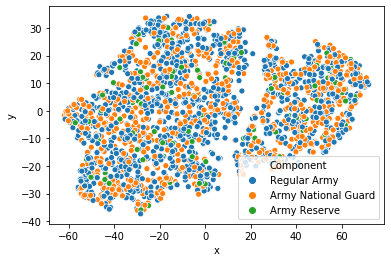

In [0]:
# Color the points according to Army Component
sns.scatterplot(x="x", y="y", hue='Component', data=df)

# Show the plot
plt.show()

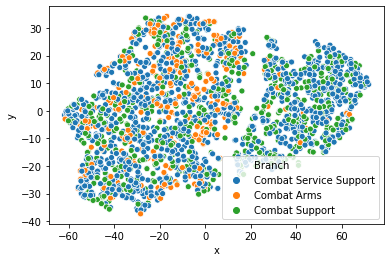

In [0]:
# Color the points by Army Branch
sns.scatterplot(x="x", y="y", hue='Branch', data=df)

# Show the plot
plt.show()

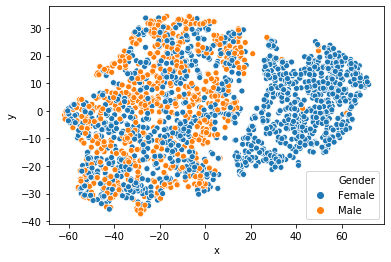

In [0]:
# Color the points by Gender
sns.scatterplot(x="x", y="y", hue='Gender', data=df)

# Show the plot
plt.show()

#2.Feature selection I, selecting for feature information

In this first out of two chapters on feature selection, you'll learn about the curse of dimensionality and how dimensionality reduction can help you overcome it. You'll be introduced to a number of techniques to detect and remove features that bring little added value to the dataset. Either because they have little variance, too many missing values, or because they are strongly correlated to other features.

In [0]:
# match dataset
# 500 male + 500 female
ansur_df = pd.concat([ansur_m[:500], ansur_f[:500]], axis=0)
ansur_df.shape

(1000, 99)

In [0]:
columns = ['Gender', 'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth', 'buttockcircumference',
       'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight',
       'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal',
       'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength', 'handbreadth', 'handcircumference', 'handlength',
       'headbreadth', 'headcircumference', 'headlength', 'heelanklecircumference', 'heelbreadth', 'hipbreadth', 'hipbreadthsitting', 'iliocristaleheight', 'interpupillarybreadth', 'interscyei',
       'interscyeii', 'kneeheightmidpatella', 'kneeheightsitting', 'lateralfemoralepicondyleheight', 'lateralmalleolusheight', 'lowerthighcircumference', 'mentonsellionlength', 'neckcircumference',
       'neckcircumferencebase', 'overheadfingertipreachsitting', 'palmlength', 'poplitealheight', 'radialestylionlength', 'shouldercircumference', 'shoulderelbowlength', 'shoulderlength',
       'sittingheight', 'sleevelengthspinewrist', 'sleeveoutseam', 'span', 'suprasternaleheight', 'tenthribheight', 'thighcircumference', 'thighclearance', 'thumbtipreach', 'tibialheight',
       'tragiontopofhead', 'trochanterionheight', 'verticaltrunkcircumferenceusa', 'waistbacklength', 'waistbreadth', 'waistcircumference', 'waistdepth', 'waistfrontlengthsitting',
       'waistheightomphalion', 'wristcircumference', 'wristheight']
ansur_df = ansur_df[columns]
ansur_df.shape

(1000, 92)

###The curse of dimensionality


In [0]:
# Import train_test_split()
from sklearn.model_selection import train_test_split

# Select the Gender column as the feature to be predicted (y)
y = ansur_df['Gender']

# Remove the Gender column to create the training data
X = ansur_df.drop('Gender', axis=1)

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

300 rows in test set vs. 700 in training set. 91 Features.


In [0]:
# Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the Support Vector Classification class
svc = SVC()

# Fit the model to the training data
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

48.7% accuracy on test set vs. 100.0% on training set


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
# Assign just the 'neckcircumferencebase' column from ansur_df to X
X = ansur_df[['neckcircumferencebase']]

# Split the data, instantiate a classifier and fit the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svc = SVC()
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

94.7% accuracy on test set vs. 94.9% on training set


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


###Features with missing values or little variance


In [0]:
ansur.shape

(6068, 99)

In [0]:
head = ['headbreadth', 'headcircumference', 'headlength', 'tragiontopofhead']
head_df = ansur[head]
head_df.tail()

,headbreadth,headcircumference,headlength,tragiontopofhead
4077,151,554,187,140
4078,149,558,196,135
4079,148,555,194,127
4080,150,560,197,118
4081,153,615,220,135


In [0]:
#@title
head_df['n_hairs'] = np.array([100016.24345364,  99993.88243586,  99994.71828248,  99989.27031378,
       100008.65407629,  99976.98461303, 100017.44811764,  99992.38793099,
       100003.19039096,  99997.50629625, 100014.62107937,  99979.39859291,
        99996.77582796,  99996.15945645, 100011.33769442,  99989.00108733,
        99998.27571792,  99991.22141582, 100000.42213747, 100005.82815214,
        99988.99380823, 100011.4472371 , 100009.01590721, 100005.02494339,
       100009.00855949,  99993.16272141,  99998.77109774,  99990.64230566,
        99997.3211192 , 100005.30355467,  99993.08339248,  99996.03246473,
        99993.128273  ,  99991.54794358,  99993.28753869,  99999.87335401,
        99988.82689651, 100002.34415698, 100016.59802177, 100007.42044161,
        99998.08164448,  99991.12371036,  99992.52841706, 100016.92454601,
       100000.50807755,  99993.63004353, 100001.90915485, 100021.00255136,
       100001.20158952, 100006.1720311 , 100003.0017032 ,  99996.47750154,
        99988.57481802,  99996.50657278,  99997.91105767, 100005.86623191,
       100008.38983414, 100009.31102081, 100002.85587325, 100008.85141164,
        99992.45602059, 100012.52868155, 100005.1292982 ,  99997.01907165,
       100004.88518147,  99999.24428287, 100011.31629387, 100015.19816816,
       100021.85575407,  99986.03503665,  99985.55886195,  99994.95534137,
       100001.60037069, 100008.76168921, 100003.15634947,  99979.77798784,
        99996.93795987, 100008.27974643, 100002.30094735, 100007.6201118 ,
        99997.77671857,  99997.99241931, 100001.86561391, 100004.10051647,
       100001.9829972 , 100001.19008646,  99993.29337714, 100003.77563786,
       100001.21821271, 100011.29483908, 100011.9891788 , 100001.85156417,
        99996.2471505 ,  99993.61269593, 100004.23494354, 100000.77340068,
        99996.56146324, 100000.43596857,  99993.79999156, 100006.98032034,
        99995.52871435, 100012.24507705, 100004.03491642, 100005.93578523,
        99989.05088154, 100001.69382433, 100007.40556451,  99990.46299398,
        99997.33781494, 100000.32614547,  99986.2688268 , 100003.15159392,
       100008.46160648,  99991.40484059, 100003.50545979,  99986.87716589,
        99999.61304491,  99983.84227645, 100011.21417708, 100004.08900538,
        99999.75383044,  99992.24838381, 100012.7375593 , 100019.67101749,
        99981.42018136, 100012.3616403 , 100016.27650753, 100003.38011697,
        99988.00731968, 100008.63345318,  99998.19079698,  99993.96079372,
        99987.69941864, 100005.50537496, 100007.92806866,  99993.7646927 ,
       100005.20576337,  99988.5565861 , 100008.01861032, 100000.46567298,
        99998.13430228,  99998.98254127, 100008.68886157, 100007.5041164 ,
       100005.29465324, 100001.3770121 , 100000.77821128, 100006.18380262,
       100002.32494559, 100006.82551407,  99996.89883226,  99975.65162236,
       100010.38824602, 100021.86979647, 100004.41364444,  99998.99844767,
        99998.63555256,  99998.80945812, 100000.17409408,  99988.77981271,
        99994.82905542,  99990.02973172, 100002.48799161,  99997.03358848,
       100004.95211324,  99998.2529684 , 100009.86335188, 100002.13533901,
       100021.90699729,  99981.03639077,  99993.53083312, 100009.01486892,
       100025.28325707,  99997.51365222, 100000.43668993,  99997.73685757,
       100013.31457113,  99997.12692137, 100006.8006984 ,  99996.80198401,
        99987.27441245, 100003.1354772 , 100005.03184813, 100012.93225883,
        99998.89552974,  99993.82637936, 100005.62761097, 100002.40737092,
       100002.80665077,  99999.26887296, 100011.6033857 , 100003.69492716,
       100019.04658708, 100011.11056699, 100006.59049796,  99983.72561659,
       100006.0231928 , 100004.20282204, 100008.10951673, 100010.44442095,
        99995.99121808, 100008.24005618,  99994.37694569, 100019.54878075,
        99986.68048333,  99982.3931144 ,  99983.49278734,  99991.09444416,
        99988.80884601, 100019.56078904,  99996.73500502,  99986.57324211,
       100011.14382977,  99994.13476061,  99987.63146623, 100008.75838928,
       100006.23362177,  99995.65043317, 100014.0754    , 100001.2910158 ,
       100016.16949599, 100005.02740882, 100015.58805541, 100001.09402696,
        99987.80255603, 100024.49368649,  99994.54225832,  99998.01162137,
        99992.99601495,  99997.96605551, 100002.42669441, 100002.01830179,
       100006.61020288, 100017.92158209,  99998.79535428,  99987.66879265,
        99988.17681873,  99993.34245482,  99983.25804192, 100008.25029824,
        99995.01786436,  99996.89015022,  99999.98108517,  99986.03379575,
        99991.38683639, 100006.74711526, 100006.18539131,  99995.56828069,
       100018.10534914,  99986.94273077,  99996.5501279 ,  99997.69160257,
        99972.06915   , 100019.37528814, 100003.66332015,  99989.55410618,
       100020.51173443, 100005.85662   , 100004.2952614 ,  99993.93001602,
       100001.06222724,  99984.74319684, 100007.95026094,  99996.25561681,
       100001.34048197, 100012.02054862, 100002.84748111, 100002.62467445,
       100002.76499305,  99992.66728396, 100008.36004719, 100015.43359111,
       100007.5880566 , 100008.84908814,  99991.22718481,  99991.32212777,
        99985.59123976, 100012.32253071,  99997.45820132, 100013.99843942,
        99992.18088317,  99995.62491017, 100000.95425087, 100009.21450069,
       100000.60750196, 100002.11124755, 100000.16527567, 100001.7718772 ,
        99988.83529982, 100000.80927101,  99998.13421006,  99999.43175519,
       100004.92336556,  99993.19321859,  99999.15491973,  99997.02638117,
       100004.17302005, 100007.84770651,  99990.44574738, 100005.85910431,
       100020.6578332 ,  99985.28843074,  99991.69828105,  99991.194224  ,
        99997.20902278, 100016.22849086, 100000.13352676,  99993.05306405,
       100006.21803504,  99994.00195469, 100011.23412162, 100003.0526704 ,
       100013.88779396,  99993.38655757, 100030.30857112, 100008.24584625,
       100006.54580153,  99999.48811552,  99992.74402881,  99991.32231322,
        99998.64022674,  99992.02730215, 100002.82675712,  99991.73902568,
       100006.21082701, 100009.56121704,  99992.94159493, 100011.92686068,
        99997.62058064, 100011.55287886, 100004.38166347, 100011.22328322,
        99990.02980204,  99998.93206013, 100014.51429261,  99993.81963152,
        99979.62798774,  99980.57410819,  99974.93559347,  99978.85836078,
        99995.88360837, 100012.78528083,  99995.5777072 , 100003.23527354,
        99998.9000851 , 100000.08548945,  99998.3180116 ,  99998.25819656,
       100004.611641  ,  99988.24017329, 100010.10127177, 100009.20017933,
        99998.04942659, 100008.05393424,  99992.98655574,  99994.62776976,
       100001.5626385 ,  99998.09778975,  99995.51261967,  99993.27551961,
        99994.42505278, 100009.39168744,  99980.56676594, 100003.52494364,
        99997.63563048, 100007.278135  , 100005.15073614,  99972.17465532,
       100005.8464661 , 100003.24274243, 100000.21862837,  99995.31326184,
       100008.53281222,  99995.8697069 , 100018.34717627, 100005.64382855,
       100021.37828067,  99992.14466003,  99982.4407436 , 100007.14789597,
       100008.52704062, 100000.35360097,  99984.61206754,  99995.52104815,
       100006.17985534,  99998.15823674,  99998.84014815,  99998.24541031,
        99990.66085344,  99994.66979674,  99985.73444579, 100017.67959948,
        99995.24627125, 100004.77610182,  99989.78114055, 100007.9452824 ,
        99981.26839022, 100009.20615118,  99999.64632075, 100021.10605054,
        99986.93465927, 100000.7638048 , 100003.67231814, 100012.32899192,
        99995.77143039, 100000.86464407,  99978.57533271,  99991.69831136,
       100004.51615951, 100011.04174326,  99997.18263731, 100020.56355523,
       100017.60249226,  99999.39347508,  99975.86496999,  99982.22433624,
        99992.22141173, 100011.15841108, 100003.10272288,  99979.05752184,
        99997.71234171, 100016.13361375,  99996.25195313,  99992.50030383,
       100020.54624103, 100000.53409537,  99995.20842901, 100003.50167159,
       100000.17164726,  99995.70857722, 100012.08456329, 100011.15701803,
       100008.40861558,  99998.97112782, 100011.46900376,  99999.50297421,
       100004.66643267, 100010.33686868, 100008.0884436 , 100017.89754683,
       100004.51284016,  99983.15940014,  99988.39829895, 100013.50106819,
        99996.6871683 , 100003.86539145,  99991.48544343, 100010.00881424,
        99996.15167751, 100014.58108239,  99994.67765979, 100011.18133397,
       100006.74396105,  99992.77608095, 100010.98996333,  99990.9836551 ,
        99991.77532811, 100007.21711292,  99993.74657999,  99994.06156933,
        99996.56099291,  99989.9983081 , 100010.4499441 , 100006.08514698,
        99999.30671303,  99998.91607933, 100004.50155513, 100017.65335101,
       100008.70969803,  99994.91542866, 100007.77419205,  99998.81228828,
        99998.01001816, 100018.66471375,  99995.81062102,  99995.20815085,
        99980.47894713,  99985.97670855, 100004.51122939,  99993.05079099,
       100005.15413802,  99988.85128948,  99992.32690174, 100006.74570707,
       100014.6089238 , 100005.92472801, 100011.97830842, 100017.04594171,
       100010.40089153,  99990.81559962,  99998.94655287, 100006.30195671,
        99995.85153099, 100004.51946037,  99984.20843715,  99991.71372021,
       100005.28879746,  99977.62913489,  99988.92287498,  99999.82281682,
        99982.80605525, 100000.57120996,  99992.00452509,  99997.08405405,
        99997.41017147, 100001.89293198,  99994.36211265, 100000.89686407,
        99993.98843199, 100005.5607351 , 100016.93809113, 100001.96869779,
       100001.69869255,  99988.35992029, 100006.93366226,  99992.41932671,
        99991.91152804, 100005.57439453, 100001.81038744, 100011.07175451,
       100014.42876928,  99994.60318438, 100001.2837699 , 100017.60415184,
       100009.6653925 , 100007.1304905 , 100013.06206065,  99993.95397031,
       100006.36583409, 100014.09253389, 100016.20912286,  99991.93815183,
        99997.48325792, 100003.82715174,  99997.11002657,  99996.0818376 ,
       100006.84001328,  99996.46590017,  99982.12087109, 100003.61847316,
        99995.75507209,  99992.68469018,  99984.34261849, 100010.13822467,
        99977.72887368,  99983.00666395,  99997.24153937, 100012.28955586,
       100013.09705906,  99988.45017365,  99998.22367804,  99984.89543625,
       100010.11207064,  99985.23437339,  99998.56804255, 100010.32983779,
        99997.77585971, 100014.70160344,  99991.29991777, 100003.6919047 ,
       100008.53282186,  99998.6028827 , 100013.86314264, 100005.48129585,
        99983.62550407, 100039.58602704, 100006.48643644, 100001.07343294,
        99986.01187181, 100000.81767819,  99995.40057169, 100006.44353666,
       100003.71670291, 100018.53009485, 100001.42251373, 100005.1350548 ,
       100003.72456852,  99998.51510197,  99998.16599803, 100011.01000203,
       100007.80027135,  99993.70558396,  99988.86563897,  99999.32589975,
       100011.61439982,  99999.72470614, 100017.46435089,  99992.24929713,
       100001.41640538,  99974.83696139,  99994.04332119,  99996.90878681,
       100005.10937774, 100017.10661839, 100000.34943589, 100014.53917582,
       100006.61681076, 100009.8635218 ,  99995.33845143, 100013.84991344,
        99989.27035721, 100004.95158611,  99990.47937899,  99994.81854448,
        99985.38596395,  99994.83652091, 100003.51116897,  99999.31229537,
        99986.52235059, 100014.70739857, 100003.37220938, 100010.08065433,
       100007.8522692 ,  99993.35132233,  99980.54953041,  99990.84575632,
       100012.25155849,  99989.46453926, 100008.16043684,  99993.87593027,
       100003.93109245,  99981.76080147, 100011.67075166,  99999.603313  ,
       100008.85825799, 100001.89861649, 100007.98063795,  99998.98067961,
       100007.43356544,  99984.90427316,  99989.19289308, 100007.25474004,
        99999.60821744,  99997.71245829,  99998.20387705, 100005.01725109,
        99994.06656246, 100005.10307597,  99990.84208151,  99995.92747957,
       100009.84951672, 100010.71252428,  99989.0284564 , 100008.38634747,
        99989.60817678, 100007.33023232,  99981.01187941,  99988.82889308,
        99994.91027722,  99998.33514045, 100014.23614429, 100009.03999174,
       100015.75467909, 100012.06607898,  99997.17136448,  99997.33673116,
       100010.68971622, 100000.40371431,  99998.43006328,  99986.64797277,
        99998.93539878,  99972.09003593,  99995.43882445,  99990.20109748,
       100006.92574348,  99995.21327644,  99996.70948451, 100013.47105465,
        99989.50932255, 100003.16658895,  99981.04733053, 100000.89729117,
       100004.10265745, 100008.59870972,  99991.01316807, 100003.19656942,
       100003.181542  ,  99999.80768366, 100001.50016279, 100004.63534322,
       100003.97880425,  99990.03989111,  99988.0413849 , 100025.05980285,
       100019.19792286,  99986.08306124, 100004.50217742, 100006.27437083,
       100007.51337235, 100001.40395436,  99990.73128061,  99998.17579594,
        99995.08874862, 100001.34373116,  99997.31628696,  99998.68324374,
       100010.18552475, 100012.305582  ,  99988.18896827,  99995.40069896,
        99992.09200046, 100012.23722212,  99999.40632097, 100014.48989404,
        99995.22419145, 100000.25999994,  99986.51303553, 100013.02535536,
        99996.37387912,  99985.14843549,  99994.07538715,  99976.95092062,
        99999.68182827, 100001.12487742, 100002.88078167, 100014.98108184,
        99996.99023846, 100008.07455917, 100003.12238689,  99998.0667836 ,
        99979.23197978, 100009.47501167,  99994.96026051, 100000.17955892,
        99987.29539224, 100002.82995534, 100001.08030817, 100000.29417619,
        99998.65206871, 100010.49218291, 100009.66220863, 100007.25916853,
       100033.21078756,  99993.9977467 ,  99996.20482484,  99989.85196309,
       100004.35986196,  99993.12512607,  99973.01638258,  99987.86661874,
       100000.72251899, 100010.09787335,  99984.43058442,  99993.87557872,
        99998.60648195,  99992.71462511, 100005.31163793, 100000.04000842,
       100003.21265914,  99992.74785074, 100015.36536328,  99999.99624991,
       100012.93549621,  99995.61002336, 100005.90039464,  99993.20616217,
        99990.49090749,  99992.95649668,  99999.54133314,  99997.81266541,
       100015.3920701 ,  99988.5129577 ,  99989.09661668, 100017.00188147,
       100006.08783659,  99981.18589133, 100004.97269099, 100002.37332699,
        99978.55555953,  99996.30437575,  99999.82545048, 100007.31402517,
       100009.54495667, 100000.95746771, 100010.33450803,  99998.53726725,
        99991.42503175,  99990.65818157, 100005.42645295,  99980.41830914,
       100006.77807571,  99988.93426933,  99996.40775904, 100005.05381903,
       100012.17940901,  99980.59319036,  99991.93821788, 100000.49061692,
        99994.03913665, 100008.61623101,  99979.13609435, 100003.61801641,
       100004.25920177, 100000.49080397, 100011.02236733,  99987.70425746,
       100011.08616758,  99992.97079597, 100007.25550518,  99996.75795781,
       100008.14343129, 100007.8046993 ,  99985.35946426,  99998.45508806,
        99999.07567681,  99997.62124735,  99992.44337235, 100018.51437895,
       100002.09096677, 100015.55015994,  99994.30851346,  99989.38203239,
       100001.32247779,  99994.36763396, 100023.90145962, 100002.45422849,
       100011.52599135,  99997.75764228,  99996.73938694,  99999.69088582,
       100003.55717262, 100008.49586845,  99998.77845985,  99993.19148426,
        99989.32123424,  99999.23320637, 100005.72962726, 100004.57947076,
        99999.82182451,  99993.99861201, 100001.46765263, 100005.71804879,
        99999.63182343, 100001.12368489,  99998.49495674, 100009.15499268,
        99995.61799733, 100001.85535621, 100003.9442803 , 100007.25522558,
       100014.95884766, 100006.75453809, 100005.99213235,  99985.29762911,
       100006.06403944, 100022.93717612,  99991.69989014,  99989.80480151,
        99997.85346158, 100010.21248126, 100005.24750492,  99995.22875794,
        99999.64009818, 100010.37038982, 100006.72619748, 100024.2887697 ,
       100010.0568668 , 100003.53567216, 100006.14726276,  99996.51015809,
        99990.22226998, 100001.71957132, 100004.90561044,  99986.04716975,
        99994.77643535,  99996.30744098, 100002.65642403,  99997.39533941,
       100004.4509671 , 100000.98112246, 100010.60327509,  99982.8883234 ,
       100016.57124638, 100014.17674013, 100000.50317086, 100006.50323214,
       100006.065484  ,  99992.62710372, 100001.64665066, 100007.78174179,
       100003.09816759, 100010.51320768, 100000.9499611 , 100000.80750989,
        99992.32196254,  99996.3546195 ,  99995.40282319, 100017.05483518,
       100002.40505552,  99990.00573499, 100003.98598388,  99998.07996303,
        99969.4623562 , 100004.79852371,  99984.47301217, 100005.7846442 ,
        99990.38736401,  99985.4167554 , 100004.94341651,  99985.05806235,
        99995.53300797, 100002.04377395, 100006.12232523, 100007.44884536,
        99999.63718711,  99991.67604652, 100019.23815426,  99993.94018679,
       100018.03588981,  99995.47475027, 100011.61285693, 100010.69965539,
        99989.54465753, 100003.55284507, 100007.55392029, 100007.00982122,
        99998.0106255 , 100003.01960045,  99996.05310319,  99988.28186621,
       100009.84012237,  99994.40318578, 100013.79758192, 100006.02450901,
        99991.07353326,  99998.3880168 ,  99997.13615085,  99991.2911235 ,
       100005.0142959 ,  99995.21385926, 100016.31691514, 100008.60891241,
        99991.19810935,  99999.80999478,  99997.73239808,  99984.35492146,
       100009.31255679, 100009.49808815, 100009.25501215,  99995.43012142,
       100010.68985972,  99997.90247065, 100009.3514778 , 100018.12527815,
       100001.40109881,  99985.80851223,  99996.83098803, 100006.40985866,
       100012.19874379,  99988.66207965,  99998.09451702, 100002.33339126,
       100004.34998324, 100009.10423603,  99990.51560344,  99995.76521703,
       100010.07966478, 100003.92334911, 100004.48380651, 100011.25323499,
       100001.0405339 , 100005.28003422,  99996.85436138,  99986.5498998 ,
        99987.04742115, 100000.74320554,  99998.00439282,  99993.45396831,
       100003.18014296,  99991.09728448, 100001.11337266,  99999.80477442,
        99991.60011085,  99977.01794119, 100014.56527386, 100003.16637236,
        99973.35874061,  99995.73571382, 100003.93787731,  99997.71859309,
       100005.80330113,  99990.26732415, 100001.75167729,  99999.46516307,
        99998.16938013,  99997.78971098, 100001.99759555, 100009.32721414,
        99994.698802  ,  99995.92759976, 100001.60564992,  99998.79850024,
       100003.85602292, 100007.18290736, 100012.91188903,  99998.83555852,
        99977.22702003,  99999.30375461, 100003.53870427,  99998.13044983,
        99998.46763838,  99975.67491487, 100005.07984337,  99996.75967671,
        99984.88923392,  99991.28577934,  99991.35170059, 100006.08749082,
       100005.61638097, 100015.14750382, 100006.47924812,  99986.48350615,
        99985.90790724, 100011.30725355, 100015.66686201,  99997.62251902,
       100005.58802988,  99984.95108716,  99980.56078242,  99988.25976323,
        99996.42812474,  99994.78623615,  99997.69885937,  99995.08985567,
       100006.79301145, 100014.27546951, 100000.36197463, 100020.29997487,
        99993.6559529 ,  99994.74896606, 100003.87734663,  99996.45201238,
       100011.77052256,  99993.58892185, 100013.22693985, 100001.94175016,
       100025.65452781,  99995.35885094,  99997.97306092, 100001.45651817,
        99978.18972033, 100006.02265128, 100004.80846113, 100001.09318364,
        99984.55604219,  99984.5343896 , 100005.86618519, 100011.75178688,
       100015.94464632,  99991.04558476,  99989.69201972,  99997.280612  ,
        99980.24269858,  99994.11068824, 100008.51789638, 100016.34602501,
       100002.79155454, 100016.40553649, 100004.10872938, 100001.91363915,
        99998.28558813, 100001.86937046,  99997.45147053,  99998.59089248,
        99993.38108165, 100002.59031902, 100000.14448415,  99985.20419965,
        99997.59299498,  99991.44328608,  99979.51799541, 100004.83883649,
       100015.58688255, 100023.69730189, 100015.62419529,  99991.29198447,
       100011.75244993, 100011.19899004,  99980.12170469, 100008.61288515,
       100006.27177035, 100001.6280825 , 100002.88616716, 100000.58307383,
       100016.31935849,  99995.98211166,  99998.00060607, 100000.07388984,
       100002.75664075,  99982.36750199, 100013.8797381 , 100002.26199757,
       100005.69124596, 100001.97315992,  99998.13558729,  99996.44758487,
       100000.96114142, 100001.52052341, 100011.55261755, 100003.46057746,
        99998.66511331, 100019.86565111,  99987.20573844,  99986.59790824,
       100003.54602052,  99997.87626715,  99982.25404012,  99996.87770339,
        99992.89344229, 100011.311286  ,  99993.7874823 , 100010.50614649,
       100004.597817  ,  99997.93669088, 100000.21171829, 100004.2865874 ,
        99976.91961486, 100003.27068408,  99996.20880389, 100017.97919366,
        99993.08731043, 100011.4256392 ,  99974.85075376, 100008.14625015,
       100002.76102754,  99997.52983509,  99998.7911069 ,  99997.39439409,
       100004.2300321 ,  99998.65751435,  99982.12262292,  99998.14189143,
       100022.34721738, 100000.46846205, 100002.90787946,  99995.61945493,
       100001.74054466, 100001.77945558,  99997.38798081, 100008.63263399,
        99990.76922043,  99998.69804792, 100005.05053752,  99997.32995821,
        99987.76120349, 100005.58264219,  99990.17839042,  99995.52691838,
        99991.71852411,  99998.89271586,  99995.70614027,  99995.25410133,
       100006.80978927, 100017.62608901,  99996.42485786, 100005.22655174,
        99996.4458651 , 100000.98942246, 100011.27751345, 100000.50293239,
        99991.84452649,  99992.70073388,  99993.83253575,  99999.86695779,
       100008.58011452,  99986.41203159,  99989.62710831,  99990.75458788,
        99982.50594578, 100013.25922683,  99999.63621356, 100019.0077932 ,
        99985.75666325, 100012.94182313,  99992.98351468,  99995.92630315,
        99990.11035543,  99990.50136141,  99986.76254589, 100002.16332958,
        99986.85798967,  99997.58198135,  99999.90798456, 100006.66610685,
       100001.00391722, 100003.21325833, 100005.14411561,  99999.82749135,
       100003.63347919,  99990.20279809,  99992.24529565, 100018.97510807,
        99999.88265786,  99992.89499325, 100013.79879901,  99998.43157389,
        99993.53508973,  99985.51008451, 100007.79491866,  99989.13699093,
        99994.6096742 , 100006.44099988, 100001.83633574,  99999.13573126,
        99997.86012218, 100011.45927354, 100022.30274148,  99994.51239171,
       100005.68904091, 100019.28800305, 100010.79057055,  99993.13168374,
        99995.69319373,  99994.02031457,  99990.8655659 ,  99993.76094847,
       100002.61875479,  99994.12970995, 100008.76199863, 100001.23255464,
        99996.02874317, 100008.8608992 , 100003.18971826, 100002.64867626,
       100010.40038455, 100005.73265449,  99998.91101533, 100009.37554843,
       100003.09317802, 100029.17308763, 100010.98688501, 100011.53212621,
       100012.90993372, 100000.79839611, 100013.12895412, 100000.23357028,
        99991.68826597,  99994.36013542, 100005.27950554,  99984.38880109,
       100002.08352921,  99992.71649915, 100007.18216383,  99992.53826289,
       100018.72303262, 100007.67818129,  99987.31141041, 100017.5875935 ,
        99997.72747491,  99992.7252389 ,  99989.76200684, 100005.6776474 ,
       100015.04521867,  99994.21573027,  99990.02379158,  99988.60299912,
       100014.96405311, 100016.70729222,  99996.5152886 , 100005.37705087,
        99999.9709455 ,  99999.39369698, 100009.64022632, 100004.40956001,
       100003.29489967,  99997.07421065, 100008.1560036 ,  99997.17994098,
       100000.49922488, 100002.19477494,  99987.98844345,  99997.00905033,
        99996.87396986, 100001.01203086,  99988.88181909,  99988.13448299,
       100016.23462103, 100011.56443606, 100008.89039357, 100018.24818787,
       100004.19595238,  99999.08921265, 100004.82175748,  99981.20713009,
        99989.01916855, 100007.58637063, 100000.32615483,  99987.22363665,
       100006.58536872, 100009.98901649, 100006.67879561,  99999.69703221,
        99991.6395052 , 100001.07594938, 100004.26924329,  99996.41411202,
       100006.0303591 , 100003.14431934, 100003.3311455 ,  99979.67460211,
       100010.81092993, 100017.2439172 ,  99995.97532375,  99985.23101019,
       100006.38929319,  99995.34340268,  99990.32987629, 100012.17716256,
        99986.16620648, 100007.17428622,  99987.52265879, 100014.62267983,
       100005.16552466,  99997.42605003, 100001.49369958, 100005.82087387,
       100008.29894377, 100008.27791428, 100005.46730266,  99995.22618338,
       100006.64079548,  99986.88675618, 100010.04093105, 100008.73005837,
       100013.94081043,  99994.11220393, 100001.86211698, 100008.58286001,
       100003.17857879,  99995.73332716, 100003.07331067, 100000.68032035,
       100009.95703941,  99993.71537447, 100003.39487806, 100002.92931126,
       100007.57328124,  99999.27107755, 100001.27314636,  99999.29050325,
       100000.34065863, 100000.08359163,  99996.73255449, 100028.27299794,
        99991.56088512,  99988.26590094,  99992.04373387,  99992.89947451,
       100000.11436571, 100014.30932798, 100016.88383783, 100002.37324364,
        99975.01787286, 100003.84359353,  99986.89345434,  99994.99298425,
        99988.50277212, 100004.2562258 ,  99993.73392555, 100007.72119677,
       100004.77302396,  99997.59930433, 100000.80560371, 100009.17419766,
        99996.27868084, 100009.15618885,  99999.80683993, 100002.69397453,
       100007.99240871, 100013.31532524, 100005.20812199, 100000.58371884,
       100007.20685935,  99984.54552363, 100016.38961603,  99986.74508734,
       100009.03709433,  99994.35836069, 100005.07251585,  99998.83432576,
       100003.03589759,  99991.9921296 ,  99978.39371996, 100004.06655649,
        99993.99495661,  99993.51364232,  99992.74676863, 100019.84411249,
        99994.17807562, 100003.26812979,  99988.39556806, 100015.23096714,
        99994.43732031,  99973.99358191, 100027.11949874,  99989.01851367,
       100013.08932334, 100007.33072561, 100006.52179636,  99997.6851517 ,
       100001.89198752, 100012.23936009,  99996.99069284, 100002.51309632,
       100009.28290215, 100000.83388837,  99995.75016805, 100014.51678908,
       100003.41688599,  99998.74827335,  99992.24105176,  99989.94402778,
       100008.93784105, 100009.49268086,  99978.29288941,  99993.84508361,
       100009.64888137, 100024.24306619, 100021.50353808, 100009.41866175,
       100013.73332455,  99994.72580543, 100007.74534524,  99987.62835299,
        99994.38123654, 100003.20971083, 100021.6793707 , 100007.47963329,
       100002.73827091,  99998.29916437,  99986.77557029, 100006.02863002,
        99996.50906303, 100002.39044706,  99991.10669086, 100001.21254954,
        99984.62971133, 100005.03906219, 100013.19725912, 100009.13950815,
       100021.13823759, 100003.24553516, 100005.05363442, 100005.14864838,
        99991.20270198, 100021.53233469, 100009.88578084,  99997.57173579,
        99990.97168257, 100005.81509283, 100008.57547554, 100001.37884868,
       100001.86074517,  99998.11883167,  99999.97252604, 100013.35141328,
       100014.00617886,  99984.99823117, 100001.38878875,  99987.9589865 ,
        99986.64304548, 100005.85952787,  99991.58430662,  99968.4664255 ,
       100006.45152653, 100012.8214183 , 100020.3877714 ,  99996.03706708,
       100014.45445308,  99973.78988364,  99989.56600393, 100005.18969371,
       100004.71534268, 100013.20417913, 100009.5668949 ,  99999.1842998 ,
       100015.29247863, 100006.8648264 , 100017.17088733,  99991.95723007,
       100003.00253676,  99995.70404326, 100008.05913307,  99997.80447833,
        99997.48147803,  99986.73510352, 100003.08204134, 100011.15489374,
       100010.08195611,  99969.83968015,  99983.80354306, 100020.05140526,
        99998.12373651,  99998.51058771, 100011.65335441, 100001.96645295,
        99993.67409858,  99997.90153051, 100018.97160687,  99986.18608847,
       100013.01224838,  99996.87607885,  99997.28771285, 100018.6291309 ,
        99993.57126405, 100008.35058365,  99996.36946549,  99985.67932974,
        99998.3398013 , 100011.68926374,  99998.14107822, 100005.49421827,
       100001.88553315, 100000.46831358,  99995.82502177, 100001.31782301,
        99979.67106548,  99995.51678344,  99981.96056375, 100002.69698847,
       100003.54660486,  99992.03934751, 100008.01307608, 100003.95830551,
       100002.93572087,  99996.38596139, 100004.72793004, 100010.54207036,
        99993.39556809,  99991.83155574, 100011.89010757,  99976.81571522,
        99973.82709906,  99981.85272912, 100001.8174103 , 100001.52374207,
       100004.96505038, 100000.7597729 , 100015.37379808, 100015.75783446,
       100011.59010639,  99988.44199729, 100003.63577886,  99991.33797319,
        99994.99289634,  99989.76637799, 100000.10712427, 100005.44124084,
       100000.7869205 ,  99988.0663131 ,  99984.73964812,  99992.37915195,
        99992.22361643, 100007.84273167,  99996.80719141,  99998.11333661,
        99998.43064933, 100010.96848148, 100016.36115122, 100004.27058537,
        99997.51694167, 100014.02501526, 100004.38241393,  99995.78903115,
       100010.10573711, 100002.07229946,  99985.65969271, 100006.26906306,
       100002.99825202,  99981.43358578,  99978.48956845, 100001.36301005,
       100006.83356255, 100006.0858005 ,  99986.39020226,  99996.52990051,
       100006.66589919,  99984.64247791, 100000.85282982, 100002.13329269,
       100009.23755969,  99975.4610807 , 100001.44987327, 100020.18121852,
        99993.78792661,  99996.83760672, 100009.5399223 ,  99992.36857399,
       100011.56954885, 100005.40533161,  99984.25926575, 100001.00593418,
        99985.41018041, 100009.52547818,  99983.19325527,  99981.88246285,
        99988.62695589,  99991.96927334, 100013.14940788,  99999.81742465,
       100002.91004542, 100010.74899749,  99993.021901  ,  99994.21674283,
        99991.52547462, 100007.84904647, 100016.3327621 , 100002.58742494,
        99993.76720006,  99994.79638973,  99988.8768571 , 100007.3114537 ,
        99989.37071238,  99997.45366935,  99988.31038655,  99981.005369  ,
        99974.60044597,  99991.1003849 , 100002.18078498,  99996.82184434,
        99997.76425113,  99989.2862012 ,  99990.68318438,  99989.32297657,
       100002.11233661, 100020.47654837,  99998.6362749 ,  99986.30719595,
       100012.72623331,  99990.01433585, 100005.57532641,  99995.5734459 ,
       100000.81083206, 100034.32663432,  99992.52473731,  99994.1331956 ,
       100003.75235451,  99999.78053236,  99995.93929099,  99993.11592457,
       100005.90493866, 100010.77376568,  99990.47915928,  99988.63566899,
       100018.29906238,  99985.74843828, 100007.15333449, 100004.39127373,
        99988.97030451, 100007.59493593,  99988.96783654,  99989.10448902,
        99986.10449762, 100008.34283205,  99995.50654152, 100010.8525132 ,
        99991.89859969, 100006.14662586, 100014.07410595,  99999.13986487,
        99988.74547254,  99996.57429058, 100012.56737471, 100007.39093836,
        99996.14011906,  99982.55627625, 100007.15536785, 100016.30906254,
       100016.48594077, 100004.327902  ,  99998.08970829,  99992.1387873 ,
        99994.27398183,  99983.50249696, 100021.34551559,  99999.73035611,
       100023.84405138,  99999.25502585,  99983.81682068, 100018.61565102,
        99991.40172976,  99995.62091789, 100016.4855109 , 100014.58773211,
        99979.73793584, 100000.0105477 ,  99989.10464995, 100005.39138222,
       100018.12177092,  99994.82510178, 100014.93222801,  99990.71355725,
       100021.72270516,  99991.74346109,  99995.36662032, 100002.96957368,
        99985.99405553, 100015.49608853,  99989.29983096, 100006.13951564,
        99987.10869961, 100001.09782946,  99999.89473825,  99996.11759093,
       100004.89219194,  99988.83167743, 100015.21865767, 100002.02447357,
        99972.08555962, 100020.05561576, 100004.52713622, 100015.53565222,
        99998.23063443,  99977.37384674,  99995.8028213 ,  99987.73930039,
        99999.61517538,  99995.17273138, 100002.0901228 ,  99982.35591919,
       100000.53782404,  99995.40418167, 100006.33508871,  99983.07697451,
        99995.74929024, 100016.5839934 ,  99988.18937102, 100007.38053685,
       100013.30506115,  99999.89910232, 100009.88510642, 100010.41439634,
       100015.6975551 ,  99996.32167799,  99998.87700917, 100008.04122851,
        99992.5435595 , 100000.48050707,  99993.01429338,  99976.70958878,
       100003.34915144, 100017.02430047,  99996.27935319, 100000.84297391,
        99995.46895049,  99992.59036657, 100001.36104464, 100010.72931098,
       100022.15843336, 100008.26476557,  99990.38636197,  99985.72984371,
       100013.06830586, 100003.16714992,  99993.89536757,  99989.43827864,
        99991.92277633, 100012.33424909,  99999.77640628,  99985.99530023,
       100008.7257899 , 100003.10102596,  99997.08867829, 100006.07715248,
        99991.72316043, 100009.63904597,  99985.75139098,  99990.96557274,
        99986.23116959,  99995.8344094 ,  99992.42548967,  99996.37354081,
       100000.04767832, 100005.5425254 , 100001.46532073, 100002.51859703,
       100016.04323943,  99997.33509439,  99985.41664061, 100009.51381812,
       100018.35869546, 100001.87288694, 100008.39534223,  99993.44383313,
       100001.85675354, 100006.37025319, 100003.78575577,  99994.60302347,
       100016.30629792, 100001.72816084, 100009.30198206, 100004.05778987,
       100008.73674223, 100009.33253297,  99997.83844851, 100008.33678813,
       100021.60455727, 100019.98992014, 100007.6404142 , 100016.87255223,
        99986.92028656, 100014.72396307, 100000.74876098,  99982.13064596,
       100001.65210587, 100009.76296298,  99993.03972329, 100019.37131581,
       100013.49227678,  99987.24886135, 100010.09090263, 100001.11972687,
        99994.48319756,  99996.83368357,  99995.55004997,  99987.83728977,
        99995.51676893, 100006.92688912, 100014.25942027, 100014.58338337,
        99994.26639271,  99998.82752323,  99991.40628683, 100010.30002489,
        99983.51847081,  99986.36723443,  99993.64153301, 100002.51473444,
        99996.7885202 , 100000.33063906, 100000.47534622, 100002.33279727,
        99989.65537019,  99996.60640229, 100005.77612336, 100002.80229156,
       100010.93306633,  99992.53775725, 100009.06261413, 100014.6662474 ,
        99998.57409708, 100002.65930144, 100002.25189434, 100005.35670589,
       100003.87921115, 100014.69487708, 100005.13364936, 100008.64501704,
       100003.31526731,  99989.58229718, 100004.33360352,  99997.70043977,
        99993.64912581,  99991.05629356,  99999.29602919,  99993.92535898,
       100020.39672266, 100015.96771898,  99997.33069704, 100007.09157172,
       100011.56962497,  99998.27160628, 100018.48233368, 100009.22110368,
        99998.98290886,  99982.0070087 ,  99990.34044792, 100003.18692543,
        99995.61736051,  99999.79246738,  99992.12686458, 100002.46922731,
        99995.41697962,  99984.47294125,  99996.58356749,  99994.27974113,
        99984.48342361, 100014.23177186,  99999.23949034,  99996.73133921,
       100007.50374811,  99999.17404761, 100007.67293626,  99985.19345381,
        99989.63344132, 100005.45227591, 100014.91897361, 100000.30011526,
       100002.16434264,  99991.76556096,  99999.70064123,  99992.91063286,
        99998.39761884, 100007.22280124,  99980.01236056, 100002.13025726,
        99991.95458415,  99993.53417785, 100011.38172769, 100002.95439665,
       100009.33629628,  99982.36225284,  99995.89783181,  99995.46332875,
        99994.10570329, 100004.40234504, 100008.95921481,  99988.9322113 ,
        99990.37337436,  99987.48042568, 100011.47606675,  99994.85265078,
        99998.98619219,  99996.67789321,  99990.36343415, 100003.73260974,
       100003.8302687 , 100009.41325585,  99997.74579918,  99997.02912579,
        99994.14478253, 100014.88141567, 100010.07566985,  99999.59614792,
       100006.48973606,  99994.14156253, 100020.54474762,  99994.0843375 ,
        99996.20311045,  99996.28968482, 100017.01234965, 100001.47602436,
       100010.84418563,  99998.89903042,  99987.87025029, 100007.75480174,
        99993.73543454,  99986.81477489,  99995.83924456, 100006.31657101,
       100017.64285059,  99986.12522066,  99978.00942009, 100009.30156997,
       100003.00051259,  99994.36527089, 100004.18361917, 100007.29443074,
       100019.12068747,  99998.69658068, 100012.79800172,  99995.48244058,
        99994.90331259, 100004.2377343 ,  99988.85032496,  99986.98040974,
       100009.63193097,  99980.36924932, 100001.13348255,  99996.75257736,
        99996.26979808,  99986.67694706,  99979.64097565,  99993.39091524,
        99988.34781998,  99995.74580975, 100000.88036096,  99992.58239768,
        99989.27474698, 100002.90041364,  99992.38165309,  99990.40468177,
        99997.00846729, 100002.85491436, 100021.0874843 , 100016.13561551,
        99987.36619059,  99986.75750783, 100000.64717372, 100005.5699894 ,
        99998.68294437, 100021.72332796, 100011.7707022 , 100016.40057368,
        99995.82129382,  99991.03120414,  99989.29711708,  99998.86218436,
        99987.41650083,  99993.66207946,  99995.69230261, 100009.44284729,
        99995.27124441,  99985.9293589 ,  99995.52526727, 100001.88582912,
       100005.60918058,  99990.78340945, 100006.47375116, 100013.86825594,
       100004.89516618, 100002.38795858,  99995.51888194,  99993.89204997,
        99979.70054931, 100006.07946586,  99996.45891116, 100001.5258149 ,
       100005.01274849,  99992.13597229, 100010.16995686, 100001.13110582,
       100014.96995248, 100001.68937668, 100003.18624695,  99997.26622862,
       100014.76413993,  99978.96507218,  99994.67168039,  99996.94946006,
        99984.69579265,  99992.05297348,  99978.2787729 , 100001.90387237,
        99985.94772456, 100003.69860474,  99997.38218304,  99991.67286487,
        99984.4621739 ,  99993.17152156, 100003.1062382 ,  99998.74552806,
       100006.66243799,  99992.11669731, 100016.05993522,  99997.62046584,
        99991.54804571, 100013.10159231, 100013.57566478,  99999.09830683,
        99995.15697883, 100009.10074639,  99991.05863032, 100009.35191542,
        99986.1281948 ,  99999.16606727, 100000.11755507, 100012.08099461,
        99981.70780366, 100002.34436722,  99998.79289533, 100000.02908287,
        99991.15894454,  99986.9810517 ,  99995.36862938,  99997.58336215,
       100014.75183478, 100001.11381644,  99999.95723745, 100006.98346293,
        99983.88145359, 100007.22566447, 100009.15376141, 100009.07143868,
        99996.67005938,  99987.64750004,  99990.15071494, 100002.47453869,
       100005.36764845, 100012.76549776, 100015.21434045, 100008.71248281,
       100000.33928798, 100002.64919957,  99997.6468763 , 100010.54868452,
       100005.94271549, 100002.15859672,  99987.44399462, 100010.46661385,
        99984.73113634, 100012.31782187, 100009.84629504,  99984.1293118 ,
        99999.51535664,  99987.5860574 ,  99998.5538068 , 100005.55169974,
        99998.633619  ,  99986.36131975, 100002.60827277, 100002.59487707,
        99999.72765189,  99989.54861025,  99996.50218338, 100002.68527168,
        99998.44950179, 100021.12622119, 100002.56079437,  99997.93238666,
       100004.82597952,  99988.94567647, 100004.207552  , 100016.16794228,
        99991.16228681, 100002.98835019, 100007.67113096,  99983.06651292,
       100016.38888931,  99989.55001811,  99996.64945942, 100003.80672178,
        99997.67397116, 100008.02936667, 100001.50925417, 100005.69751291,
       100000.74973424, 100014.72001615,  99979.84501991, 100003.64094247,
        99996.99384872,  99990.40967383,  99991.88389989,  99994.28020022,
       100005.78410537,  99991.03869564,  99998.36816424, 100002.7524887 ,
        99988.44208349, 100011.12348653, 100024.21589304,  99993.25982693,
       100009.19447184,  99996.9032052 , 100005.33367456,  99998.18294805,
       100022.0866163 ,  99996.75668184, 100007.93930409, 100006.07366153,
        99989.16039863,  99978.39730587, 100005.79087216, 100008.4451844 ,
        99994.63294582,  99993.66625332, 100009.76803256, 100008.52833425,
       100009.55876647, 100002.61402036,  99992.11723539,  99987.8202662 ,
        99980.06863454,  99999.42318242, 100019.19168759, 100004.77894556,
        99999.20259756,  99984.79253783,  99993.32069933, 100000.04938776,
        99997.77780524, 100009.0833969 ,  99998.4139323 , 100006.95305995,
        99998.8578174 ,  99998.10232834, 100012.5913353 ,  99992.48022566,
        99997.16947132,  99987.07262597, 100000.96739355, 100010.69501001,
       100006.8140191 , 100007.3401181 , 100010.53042376, 100006.25218187,
       100007.58259432, 100004.03724077,  99990.24611455, 100005.260951  ,
       100009.45886375,  99991.08090345, 100002.35989981, 100010.82813072,
        99996.26523545,  99986.78893426, 100000.61533972, 100015.9368556 ,
        99990.87054581,  99998.9460993 ,  99992.48969053,  99996.41032706,
       100002.34771281, 100014.76813609,  99992.83355974,  99992.91345006,
        99991.2749756 ,  99989.06209555,  99984.6529994 ,  99991.48737801,
        99998.94186731, 100000.40865387, 100011.72449188,  99991.78399515,
        99992.20061876,  99992.43162759, 100001.95745919,  99998.41527583,
       100007.77208795,  99992.10859193, 100009.13258853, 100009.42513143,
        99997.37532298,  99993.77462546, 100001.81169089,  99992.08466235,
       100019.92204736, 100001.40887303, 100007.92440769,  99987.32892699,
        99982.49242415, 100006.87266205, 100005.15886719,  99992.39395243,
        99994.3322435 ,  99993.20056199, 100002.27826915, 100009.23852128,
        99984.5513979 , 100004.78745131,  99991.25832279,  99994.69068036,
        99998.39564792,  99986.3854596 , 100028.4393857 , 100024.24977475,
       100007.52269859, 100006.56015181,  99989.56389807, 100023.77348876,
       100000.18317265,  99998.7660449 , 100012.03993579, 100002.60800066,
        99992.23396389,  99997.8107857 ,  99996.23914221, 100000.64655693,
       100005.54457539, 100005.32758904, 100013.01201892,  99999.95896936,
       100009.58068518, 100017.06661841,  99987.73977392, 100007.12570563,
        99989.2766789 ,  99984.92924409, 100015.8466204 , 100011.35483969,
       100005.23372944,  99995.23068602, 100015.03561224,  99986.32832275,
       100000.6739292 , 100004.85177554, 100012.87126933,  99984.73572301,
        99969.35858644, 100001.15370313, 100003.17427155, 100001.73680273,
        99991.22753139,  99999.558392  ,  99984.59920929, 100004.20593392,
       100008.92588396,  99992.67968115,  99979.96058232,  99998.7021829 ,
        99998.01499681,  99999.19393006, 100013.03575451, 100001.38595479,
       100020.84122848, 100003.80743453,  99989.12766329, 100011.33613458,
        99999.09655632,  99995.11229143, 100002.79401351, 100001.14783811,
        99984.41405807,  99991.50481224, 100011.5200657 , 100001.75927892,
       100006.38985954, 100010.20152645, 100017.92613072,  99993.609035  ,
        99992.96604941,  99990.75490405,  99993.99549458,  99990.87413233,
        99999.84999268,  99998.91767231, 100005.81238272,  99988.09348766,
        99993.46175477, 100003.59461066, 100006.98647978,  99976.8338269 ,
        99993.97929378,  99997.4637961 ,  99979.58845821, 100004.48700357,
       100012.04127526,  99980.56900588,  99984.35071232, 100009.52182127,
       100011.35339228,  99987.27224363,  99990.12379287, 100006.59418807,
        99997.56976268,  99994.78683569, 100015.9413738 , 100002.97799038,
        99981.80551158, 100002.53313906,  99985.9474234 , 100007.4205658 ,
       100009.81993658, 100004.38561998, 100009.27819853, 100019.64279457,
       100007.26679966,  99996.28040059,  99989.06696091, 100002.24450735,
        99989.6496183 ,  99985.61254727,  99995.38150495,  99982.21681875,
        99986.99526217, 100005.01156391,  99995.24744727,  99996.93365619,
        99999.74083901,  99980.45808184, 100001.86223746,  99999.96170057,
        99999.5479353 , 100003.42846311,  99978.35072431, 100019.11829512,
        99996.96648885,  99985.65786283, 100001.11529879,  99987.28832277,
       100000.663927  , 100005.40602232,  99986.81103173, 100008.45426429,
       100001.310922  , 100003.49083684, 100004.04068105, 100005.12434147,
       100011.203618  , 100008.60454448, 100004.86910353,  99992.35660374,
       100002.86331102,  99994.42166046,  99985.51247726,  99999.58623125,
        99990.87189903, 100011.35141386,  99999.62290806, 100000.45262569,
       100007.75206119,  99995.81876078,  99997.43405142, 100011.64671162,
        99986.16321398,  99991.33044782,  99998.66306128, 100007.84789191,
       100002.49792474,  99988.42483162,  99990.80226029, 100016.9446002 ,
       100003.16269281,  99993.81558778,  99995.15722479, 100037.40248904,
       100013.4027191 ,  99983.63525989,  99995.41225024, 100007.22822683,
        99997.24518917, 100011.39053296, 100017.64249579, 100000.07560395,
       100002.94739515,  99998.31337713, 100008.82799066, 100014.99925164,
       100009.34395374,  99989.17022394, 100007.5436307 ,  99994.21246067,
       100017.48361966, 100004.76283816, 100010.58128734,  99999.78940614,
        99999.67662088, 100004.30777633,  99999.69198688, 100015.78913905,
        99988.57803699, 100006.85416448,  99994.13340204, 100008.61046242,
        99982.02883908, 100012.86126248,  99996.90631222,  99987.66326848,
       100007.1668431 ,  99998.08223157, 100002.77138832, 100012.27908698,
        99989.08809443,  99992.63622865, 100000.8040713 , 100005.67515399,
        99992.96385024,  99992.06854685, 100007.71335292, 100009.83638642,
       100013.97273259,  99997.04864674,  99974.17765202, 100005.23390285,
       100007.59932103,  99985.3317685 , 100000.90380246, 100002.7530828 ,
       100003.40354962,  99995.35305531, 100000.83433195, 100006.00394496,
        99982.23826558, 100009.11082434,  99996.34163346, 100007.64502119,
        99992.97379723,  99982.88235135, 100011.81138728, 100016.41136186,
        99981.39469263,  99987.07723379, 100000.94173158,  99989.50639678,
       100007.60251747,  99992.02936101,  99994.82419474, 100002.11434969,
        99978.21774903,  99996.80077413, 100020.14648874, 100005.86884745,
        99990.00890487, 100010.46015121, 100020.63185439, 100012.74668477,
        99994.15389163,  99993.4240386 ,  99996.29523146,  99989.50946634,
       100000.29215791,  99989.94310679,  99991.24760613, 100003.20818772,
        99994.36377942,  99997.95615186, 100021.48178243, 100003.68219489,
       100011.90323233, 100004.37918132, 100006.02979018,  99986.50824793,
        99994.53028087,  99997.37746126,  99995.5337335 ,  99997.97091495,
       100001.59901743,  99997.77387591, 100006.89592817,  99997.52202494,
       100010.83951978,  99999.86904589,  99994.05323742,  99987.48609243,
        99992.30616376,  99997.45689284, 100012.02059351,  99987.28126422,
       100010.40152739,  99999.08235807,  99991.6855492 ,  99986.8090877 ,
       100005.48995125,  99980.93767154,  99995.38487029,  99995.59638069,
        99998.36874994, 100005.81184944,  99993.85359075, 100001.20342428,
        99987.82153949, 100000.57692093, 100006.08355377,  99996.48308124,
       100003.68665693, 100001.04632323,  99996.55710851,  99999.39182525,
        99998.04979123,  99980.25752237,  99985.00837138, 100004.32852227,
        99979.11652958, 100011.58381795,  99985.90028862, 100000.30525288,
       100004.72135916,  99993.63264976, 100011.62588547,  99986.29146451,
       100009.06766377, 100001.48556549,  99998.48814178, 100010.11695946,
       100005.39253823,  99987.95522563, 100014.11810606, 100010.03996403,
       100001.03807681, 100001.49687529, 100013.36236718, 100016.58172254,
       100006.12658487,  99988.37378566, 100001.20250147, 100008.20019906,
        99991.65501665,  99987.94133088, 100000.05778392, 100001.12363846,
       100003.77829791, 100012.30299345,  99978.175746  , 100000.99861448,
        99997.94322276, 100000.15749246, 100001.67433255, 100010.25749548,
       100005.58932736,  99999.54300077, 100000.8911753 , 100001.05357392,
        99998.67034218, 100013.22013784,  99980.87761714,  99985.98503812,
       100015.97636963, 100005.73653344, 100006.30641673, 100011.58186853,
        99979.81644948, 100014.39135403,  99988.33535851,  99990.1726103 ,
       100010.36242776,  99988.44284046, 100005.30921213, 100014.27329387,
        99993.50406452,  99994.10919849, 100006.72028568, 100008.96321647,
       100003.41725221,  99984.18631995, 100016.10204023, 100006.22494931,
        99976.43135092,  99991.00212507,  99989.39965739,  99992.22302381,
       100002.56052386,  99992.84767859, 100012.24947014, 100011.08737926,
       100000.74250682,  99989.46773026,  99999.99386995, 100004.06759726,
       100011.62457387,  99995.35705898, 100000.79721962,  99990.03260229,
        99995.39017627, 100011.68338166, 100015.96203479,  99996.5502588 ,
        99997.35861057,  99992.39337835,  99984.70402021, 100003.72760482,
       100004.72690317, 100006.04447081, 100000.2613198 , 100005.29211304,
       100001.653819  , 100012.44459062, 100003.74576112, 100014.51335116,
       100010.72361871, 100003.59016544,  99987.57699488, 100005.17272311,
       100003.20761981, 100019.18619526, 100007.42341574,  99988.68728792,
        99992.07136265, 100009.63936924,  99998.06887738,  99987.97109988,
       100004.90761381, 100004.93649237,  99998.8145825 , 100008.61596237,
        99998.95766075, 100018.64815343,  99989.02490197, 100009.07922087,
       100009.90986171, 100012.66866564,  99998.74745761,  99995.87005662,
       100017.40675064, 100005.46569103,  99994.1486472 , 100008.32351815,
       100015.87082522, 100006.66381056,  99992.74019945, 100009.79424986,
        99984.62465159, 100007.76819284, 100009.78327543,  99997.780311  ,
       100002.77126501, 100001.50280307,  99994.64204338,  99991.4239968 ,
        99997.21318652,  99993.77987846, 100015.13840749,  99986.44728536,
       100017.99211811,  99997.64589042,  99992.28961487,  99994.55754089,
        99989.59037153,  99979.67832676, 100008.15989154,  99998.46352675,
        99991.61549709,  99986.94167047,  99994.37170956,  99987.48500596,
       100012.98571622,  99981.0372207 ,  99990.41787184,  99991.1697827 ,
       100004.75177393, 100002.53774808,  99998.55206886,  99998.27775011,
       100003.98071788,  99992.04561065, 100004.83664733,  99986.7723758 ,
       100005.40305516,  99994.92742797, 100011.28378542,  99987.76649428,
        99995.46496881,  99991.79094629, 100009.40218905,  99985.88706533,
       100008.84147795, 100004.63217223, 100005.65973205,  99993.11840693,
       100004.75340517, 100017.50721805,  99993.08691462, 100002.53189548,
        99997.36918747,  99988.99653604,  99991.75172406, 100005.24850945,
        99999.54617443,  99975.47080137, 100005.3228818 ,  99996.82410672,
       100009.17747112,  99993.56365833, 100023.06927274,  99990.51250748,
       100007.66226191,  99989.24540183, 100001.94955615,  99988.52489942,
       100012.54848754,  99999.78896181, 100014.94769183,  99999.02714155,
        99983.75641037,  99991.5688267 ,  99996.07831025, 100013.81499416,
       100027.29462135,  99998.85842932, 100003.18016861, 100012.50112226,
        99988.58691678,  99996.84396791, 100006.69592696, 100003.53133254,
        99999.15677467,  99990.2259929 , 100001.04189976, 100007.12877299,
        99992.81579043, 100000.74477095, 100020.89740917, 100004.7733666 ,
       100005.93123566,  99989.63811434,  99994.4912435 ,  99996.82533829,
        99991.61322592,  99987.90899541,  99984.34225155,  99997.92120162,
       100008.32818744, 100006.16780564, 100006.76281511, 100009.12086858,
        99991.41176849,  99993.16729282,  99997.64414348,  99991.08742361,
       100002.49671015,  99993.36844169, 100011.13952742,  99991.22148457,
       100005.62541784, 100016.78760399,  99987.84774582,  99994.48676856,
        99992.31841524,  99989.39726181, 100002.60688481, 100005.00319519,
        99992.67192563,  99994.87517374, 100002.42410752, 100003.13961743,
        99988.88627068, 100023.01634503,  99997.66558951, 100000.88119704,
        99993.71930987,  99997.41304564,  99990.95711361, 100016.28238708,
        99981.52812489,  99998.15050636, 100006.61114463,  99984.02785756,
       100004.61015964, 100013.16506403, 100002.96369672, 100000.00007512,
        99999.657892  ,  99997.18500679, 100005.80177645,  99991.36473403,
       100003.26813062,  99996.61474275,  99994.1837715 ,  99988.43624408,
       100006.74528219,  99994.09354621, 100010.77519982,  99999.71954581,
        99999.96907762,  99989.02127291,  99989.9988428 , 100005.4699823 ,
        99999.03812307, 100000.58742431, 100006.51014506, 100005.21844836,
        99996.44167696, 100028.94386192, 100031.3504734 , 100004.40313109,
        99985.60805641,  99991.06389859, 100005.81739289,  99994.23393113,
        99999.18297732,  99980.03254461, 100004.36181516, 100012.08442604,
        99987.85626637,  99996.56499974,  99996.40979393,  99975.15104591,
        99995.24349923,  99994.30835444,  99986.06443033,  99991.25459479,
       100002.46853271, 100003.41389047, 100003.24868552,  99994.24047804,
        99991.75095481, 100001.45387975,  99996.06857841, 100010.36417011,
       100011.64308647,  99995.27386874,  99983.66513041, 100001.83359763,
        99993.311045  , 100008.2229707 , 100007.00099518,  99989.49390641,
       100010.48230559, 100013.9227734 , 100003.86223883, 100006.10146037,
        99994.79071955,  99991.40839602, 100012.54886871, 100002.41109117,
        99999.083248  ,  99999.31074981, 100007.52761465,  99997.84348734,
        99995.01572099,  99996.95256394,  99998.37502799,  99995.13528648,
       100000.88282311,  99995.08401373,  99995.45072157, 100019.86539198,
       100000.07260484, 100017.07986181,  99989.95235392, 100007.54816734,
       100000.11318007, 100016.91010018,  99995.34813653, 100017.92322989,
        99994.11353902, 100000.07627448,  99988.43914067,  99999.65448848,
        99997.93176896,  99988.90614177,  99981.54003448, 100008.96406942,
       100004.95137578,  99993.03661483,  99998.93206364,  99992.74796154,
        99998.61925344, 100002.50042689, 100003.53115657,  99994.99023126,
        99997.90195623, 100005.16116884,  99993.40673549,  99994.44442885,
       100000.81850209, 100004.94762249,  99995.76050249, 100007.96530799,
        99999.29935884,  99993.2725747 , 100000.94415407,  99985.43309706,
        99981.64100959, 100003.3902513 ,  99982.2367666 ,  99991.98052917,
       100009.98670589, 100003.31694064,  99991.50033132,  99999.85009571,
        99985.66104272,  99988.60809686,  99998.32181903, 100005.87449551,
        99999.66270479,  99999.15705733,  99993.4965567 , 100000.74518243,
       100007.96017815, 100011.03748023, 100003.42773411, 100001.21978189,
       100003.55172678, 100005.25360208,  99995.18223626,  99996.30888084,
        99993.36555026,  99993.71200574, 100018.83029536, 100007.84937722,
        99993.15260294, 100000.42316779, 100003.07489203,  99999.10041567,
        99990.36245606, 100014.46528642,  99988.11575395, 100008.68340381,
       100000.54036956,  99991.86528195,  99998.38495885,  99981.49500867,
       100002.74972569, 100007.28464607,  99994.69939046, 100002.97857928,
        99975.01105725,  99994.68604459,  99986.6259841 , 100009.25292603,
       100001.94313187,  99999.52762421,  99998.10771302,  99997.57111614,
       100007.85062478,  99989.58247195, 100009.32253127, 100006.99588895,
       100010.30754331,  99996.52063332, 100010.81485921, 100010.00785926,
       100004.49597692, 100011.22869746,  99995.58698356,  99999.26852108,
       100013.4759958 , 100020.1739038 ,  99983.53365218, 100009.37043437,
        99987.4188408 , 100002.10291501,  99994.12101897, 100002.05689041,
        99997.01761351, 100003.94073452, 100006.49744691,  99996.51844184,
       100006.68563396,  99997.12424373, 100006.84819457, 100011.77454394,
       100001.65085084, 100002.33112636,  99981.9727795 ,  99992.28109522,
        99993.77343422,  99998.49340386,  99985.99977113,  99986.98933921,
        99999.22893043, 100002.07825267, 100009.86195928, 100014.32756427,
       100005.282585  ,  99996.32268025, 100006.91720859,  99992.01653252,
       100002.13817727, 100017.8997593 , 100014.73573932,  99996.97614598,
       100009.70363704,  99996.12082979,  99993.8489399 ,  99983.90662632,
       100005.36890163, 100003.05940784, 100009.84494017, 100008.05922147,
        99997.00479666, 100008.6310161 , 100018.80730755, 100023.01283762,
       100007.72455805, 100002.88475888, 100003.88664087, 100000.83389669,
        99994.24431117, 100015.77291402, 100007.6250647 , 100001.464967  ,
       100014.87620968, 100008.39731475,  99987.43721788, 100012.36638767,
        99995.90568738,  99986.82417962, 100002.89859401,  99996.898031  ,
        99992.55527195, 100015.83547292, 100000.59722175,  99999.47776012,
        99997.48634854,  99996.07017667, 100001.88779204,  99996.78856257,
       100032.38343197,  99989.45624964, 100001.17243182,  99995.29726722,
        99992.97459459,  99993.32061484, 100000.27655054, 100009.31194711,
       100011.94506413, 100006.96641525,  99995.7631823 , 100019.21738168,
       100017.77733596, 100017.63158284,  99995.2854684 , 100006.21434643,
       100007.10254282, 100005.84932733, 100005.68754796, 100005.49022708,
        99996.97568539, 100012.0731703 , 100013.77666616, 100006.3628393 ,
       100000.55297353, 100004.05817117, 100012.48457283,  99998.72518389,
       100006.99435667,  99992.6474954 , 100003.79216099,  99987.25338179,
        99988.63086178, 100020.88481805, 100001.31646817, 100011.03714818,
        99973.23158624,  99997.62301536,  99998.2421674 ,  99994.41761459,
       100001.39655568,  99991.33654748, 100012.55861143, 100006.58932888,
        99988.5564426 , 100004.84654718, 100003.14519903, 100016.10881477,
       100010.55868602,  99988.81680163,  99992.22824678, 100009.94435002,
        99986.78486622, 100005.99902042,  99993.21651933, 100005.08945073,
       100005.38264819, 100003.74533657,  99992.53182759, 100000.33537867,
       100012.20222478,  99998.15400167, 100004.46674362, 100016.48747795,
       100019.09528692, 100015.54689475, 100001.42777673, 100001.02803357,
        99998.23399876,  99994.87932418,  99998.36049787,  99985.89034028,
       100005.78024944,  99997.15364847, 100011.31264871, 100010.50003438,
       100013.93015754,  99992.23190608,  99997.73324641,  99992.69787177,
        99984.40904838,  99993.29797031,  99992.07259384, 100011.30605177,
        99972.60858261, 100005.10314978,  99997.46380679,  99995.42337332,
        99996.93963503, 100004.65757556,  99999.02024349, 100023.78239621,
       100001.96845765,  99995.2915669 ,  99994.70324631,  99997.83824319,
       100015.9055673 , 100005.43113721, 100013.77037457,  99987.35789026,
        99995.12857753, 100000.69628536,  99997.99491834, 100007.02972941,
       100010.51500717,  99996.3387674 ,  99971.2794975 ,  99990.77180813,
        99987.99491696, 100005.82520557, 100020.4346998 , 100003.43074819,
       100018.19773086, 100003.38016912, 100011.22974756, 100003.24113062,
       100007.55374334,  99990.73007526,  99996.89905222, 100015.08111572,
       100009.29709205,  99986.44809573, 100010.75115692, 100012.31669345,
        99997.24397736, 100003.34043569,  99994.25939639, 100003.08397262,
       100001.57116328,  99996.14697085,  99999.59472597,  99994.57462633,
       100006.88969785,  99993.5577368 , 100003.54042504, 100002.80810295,
        99992.11851581,  99996.01188124, 100003.12513592, 100013.74424685,
        99993.59497544,  99998.76145149,  99998.13747556,  99982.46593087,
        99998.52113031, 100007.51920881, 100007.81318843,  99995.19965264,
       100005.35709764,  99997.51148178, 100003.57531763, 100009.35974908,
        99993.36247995, 100004.79736919,  99983.60161239, 100009.75338613,
        99984.54199153,  99999.36268945,  99998.10356341, 100008.6167039 ,
       100017.89185425,  99998.11984755, 100000.0858861 ,  99989.41353017,
       100005.65174709, 100009.97977238, 100011.76571003,  99990.03915273,
        99991.26510891, 100009.04619524, 100009.39172672,  99979.50006771,
        99991.83438535,  99978.05107353,  99998.08816411, 100001.41689043,
       100003.49133952, 100004.5206922 , 100006.57262312,  99998.99272391,
        99984.88118195, 100002.13768804, 100007.51167079,  99985.87541155,
        99990.32216148, 100012.01208743, 100016.30151933,  99995.34941407,
        99986.95692487,  99994.01642542,  99991.71044683,  99995.4277232 ,
       100008.22761039,  99980.77912775,  99979.56450874, 100019.42953894,
        99991.95563835, 100011.83657783,  99981.54749067, 100008.58603935,
        99985.86059858,  99990.1264912 ,  99986.03339806, 100005.4472583 ,
        99989.58806439,  99990.01577345, 100006.7365336 , 100015.67895298,
       100004.29321185, 100002.61041336, 100007.79849404, 100016.67778233,
        99997.51681006,  99990.22153015, 100018.43094505, 100014.14901154,
        99987.85870787, 100008.13261461, 100004.07516007,  99999.28989136,
        99988.4762513 ,  99985.8916807 ,  99994.52436422,  99999.27960383,
       100016.41049199,  99986.01075013, 100010.18223159, 100002.12908787,
       100008.15925508, 100020.22575774,  99995.56428119, 100001.37907689,
        99983.18300824,  99993.30164649, 100015.61720071, 100020.24665903,
       100001.67179115,  99999.4780013 , 100004.60828984, 100002.97026599,
       100022.52553061,  99989.89590051,  99983.15045885,  99992.550135  ,
        99986.22244903, 100001.13555005, 100000.56343728,  99985.06725689,
        99999.67058112,  99997.06223054, 100002.39871499,  99993.59062545,
        99995.99492636,  99997.12121873, 100013.2891232 ,  99988.64941798,
        99994.17506434, 100000.64841248,  99999.2737991 , 100011.56329143,
        99996.9666628 , 100003.46481989, 100000.32758304,  99991.46118926,
        99996.92606596,  99999.71255894,  99992.00964134, 100025.96253592,
       100002.23446461, 100010.45567379, 100016.65770094, 100020.04376604,
        99981.96895601,  99993.58985629,  99985.98726085,  99995.09355982,
        99996.43439396,  99985.28213302, 100011.10337877, 100012.74758381,
        99992.92782242, 100006.80508055, 100008.54050841, 100006.61555776,
        99986.41898539, 100024.45378043, 100020.87213742,  99995.10764611,
        99995.36815865,  99986.69230785, 100006.14835772,  99999.96807429,
       100004.8200619 ,  99995.78898771,  99987.37653116,  99990.39079632,
        99993.82725129, 100001.49227382,  99997.72439706, 100007.78925829,
       100006.78163232, 100009.34021942, 100002.96614116, 100018.55970927,
       100021.43985913,  99995.08608994,  99989.4239073 , 100007.66948467,
       100005.87343046, 100008.02526681,  99995.02236351,  99989.75699588,
        99998.43351516, 100017.36556624,  99997.9781236 , 100006.96082369,
        99994.3709594 ,  99991.20253796,  99991.9947616 ,  99977.48419561,
        99993.44518366, 100008.83442179, 100000.43320447,  99991.53992445,
        99999.46411333, 100002.59813548, 100008.32332345,  99992.68666786,
        99999.92412915, 100003.32887256, 100010.53475953,  99987.49321937,
        99996.94185705,  99982.0116154 ,  99991.60350305, 100003.37134242,
       100017.09207697,  99997.6181498 ,  99995.98405555,  99990.00537715,
        99986.33210299,  99991.38284083, 100006.20717508,  99979.04133296,
        99997.93941606,  99993.16841956,  99989.5449092 , 100002.37883678,
        99992.07733694,  99989.12397215,  99994.16423854,  99984.55512869,
        99983.5538119 ,  99992.03337584,  99988.54829889, 100008.91121191,
        99999.18087186,  99988.35943435,  99998.93971126, 100007.01132927,
       100005.76401891, 100017.14655093,  99991.97348281, 100012.82932455,
        99996.30896694, 100000.76340638,  99991.41551119,  99989.6182969 ,
       100018.16777919, 100018.91287342, 100002.95873653, 100008.34356342,
       100002.14781982, 100015.81979815,  99982.19212081, 100016.30152135,
        99983.19878986, 100015.99050762, 100021.39918438,  99987.46880753,
        99992.91172503,  99999.87692304, 100008.34645905,  99978.30821563,
        99998.42964523, 100006.66211145, 100007.85648912, 100006.5019471 ,
        99995.47475191,  99995.89043153,  99994.36064726, 100025.29127892,
        99989.69275988, 100002.42574183,  99996.82988547,  99998.36264539,
       100003.21072872,  99994.18324388, 100000.37592126,  99995.50985811,
       100007.3329445 ,  99995.99347642, 100000.57598794, 100000.05213942,
       100018.84965332, 100018.53945106,  99988.006042  ,  99992.01484683,
        99985.38880512,  99996.11026418,  99998.72246978,  99992.68541841,
       100003.11874897,  99994.49855771,  99999.09035264,  99980.97283198,
       100006.00032239,  99989.89861355,  99995.10915624, 100005.78704673,
        99985.3168134 , 100009.90631257, 100002.32233481, 100002.21348583,
        99985.59734884,  99986.28248644, 100000.34474483,  99996.64519417,
        99993.8395754 ,  99998.40881967,  99990.69331348,  99998.16545524,
       100005.02018973,  99990.72362643,  99991.21620927,  99998.41474899,
        99994.98543854,  99998.81047531, 100000.23769136,  99982.32777899,
       100015.41429505,  99997.56015488, 100000.36712329,  99987.58120061,
        99996.99346563,  99996.53040633,  99989.14646555,  99997.23858999,
        99984.02689504, 100022.23820815, 100001.67005809, 100004.34323076,
       100002.30640503,  99991.45419088, 100000.21499684,  99972.8960626 ,
        99989.33199113, 100005.28867521,  99996.8943634 ,  99977.76604018,
        99985.03173256, 100008.01193453,  99981.95353115, 100000.22601129,
        99981.3013946 , 100008.58274176, 100004.87140023, 100008.8869014 ,
        99996.23410972, 100003.44320792, 100001.8060517 ,  99986.65196707,
       100000.61679136,  99992.89184713,  99987.48789421,  99988.31060407,
       100010.94731757, 100008.10167603,  99996.12949333,  99979.27151908,
       100005.68697429, 100011.46830729, 100006.20391415,  99997.3593684 ,
        99985.67794909,  99998.99891163,  99990.88036209,  99991.95307674,
        99999.079789  ,  99993.49444712, 100000.58193769, 100009.14073014,
        99984.82758266, 100002.52631353, 100003.97866017,  99996.96454728,
        99979.4435671 ,  99991.09081831, 100022.66333321, 100007.09205201,
        99987.87885019,  99996.012467  ,  99995.49229159, 100000.8236314 ,
       100002.88171762, 100007.86182474, 100001.12891153,  99991.09053462,
       100008.83382434,  99992.1223491 , 100005.34903053, 100018.01616715,
       100001.22837125,  99983.1732887 , 100006.06601644, 100003.81722533,
        99989.27334895, 100006.13456309, 100000.44225337,  99989.09048871,
       100001.6034679 ,  99998.17995406,  99981.48614931, 100002.09875833,
        99983.9326412 , 100004.57304767,  99985.51518301, 100004.56751733,
       100000.99618047,  99984.87660089, 100004.43989232, 100010.28667566,
        99984.1337728 ,  99990.35379661,  99988.36371488,  99995.98560481,
       100013.56019771,  99999.0384177 , 100012.95251014,  99997.03384465,
       100011.68288088,  99992.83937462,  99994.98617981,  99982.46586532,
       100007.00128912,  99997.29964215,  99994.20809899,  99988.59511999,
       100005.01016283, 100002.25767203,  99989.10912854, 100012.80058097,
        99999.01181164,  99997.29851032, 100017.45068442,  99998.19442023,
        99997.97622225,  99996.07443507, 100021.46402181, 100021.36405485,
       100009.74229632,  99998.10210033,  99993.37152155, 100004.13966535,
       100000.31924826,  99984.06340679, 100011.43814459,  99994.90463213,
       100006.48794693,  99998.81370993,  99999.27179077,  99986.56570528,
        99991.19954528,  99993.46337559,  99999.77987196, 100003.38299815,
        99997.11244936,  99992.37912887, 100010.53166158,  99999.90814948,
       100004.7576038 , 100003.73943373,  99991.20736442,  99993.61152263,
       100008.55586819, 100019.55753599, 100004.73291573,  99993.24917336,
       100012.28505264,  99983.57979672,  99991.59667941, 100012.71048234,
        99995.7369243 , 100015.13822407,  99982.83305429,  99993.4291664 ,
       100003.34034407, 100001.93058967, 100002.78079787,  99999.67509458,
        99993.73365029, 100009.94197744,  99993.36142607,  99987.43974182,
        99998.89354429,  99974.28408528, 100008.30995273, 100004.91127287,
        99999.26646576,  99993.10785915,  99981.91694785,  99982.75566333,
       100006.79675727, 100000.98407443, 100003.78364454,  99998.57004677,
       100003.03802505,  99984.05103713, 100006.43661703, 100003.60877867,
       100008.91323814, 100001.12437356,  99989.85095669, 100004.74303965,
        99988.20175112, 100009.89957069, 100003.176219  ,  99993.39503822,
       100003.72110545, 100015.92668333,  99990.15051093, 100016.96393854,
       100000.97829831, 100011.05335285, 100002.92173653, 100004.81255792,
       100017.98162549, 100001.87479911,  99998.51163592, 100001.88425577,
       100010.95687519,  99997.85970467,  99990.77222363,  99997.7467868 ,
       100005.74357646,  99999.86356408, 100004.14233866,  99992.47285031,
       100013.60376795, 100003.86374907, 100003.88515481, 100000.30521966,
       100006.13718507,  99999.17747105,  99998.55780373, 100007.92377686,
        99996.97728164,  99999.43658906,  99986.13940245,  99997.62499618,
        99987.55860189,  99990.61396443,  99993.30359395, 100019.05035588,
       100011.1040423 , 100003.24049386, 100003.05028784, 100011.86397763,
        99979.24336071,  99987.60651963,  99999.41147255,  99992.26183998,
        99987.01816774,  99995.78287658, 100006.22981126, 100009.51773214,
        99999.30157352, 100002.90029258, 100006.14553695,  99974.13090034,
       100006.40464393,  99979.23308718, 100003.2053559 , 100005.41948176,
       100005.97945641,  99994.15331612, 100005.9299291 , 100005.85492746,
       100009.63700697,  99984.36962965,  99991.68851811, 100003.33293069,
        99997.83187305, 100006.88390784, 100004.71355967, 100002.07295206,
       100004.45453047, 100001.77654163,  99991.23749158, 100005.30069685,
        99993.61399326, 100015.50481976, 100010.6614256 ,  99993.10781032,
       100001.57076283,  99985.72677016, 100000.93412678, 100015.54828527,
       100001.8681813 , 100009.42816425, 100012.2444264 , 100001.37031264,
       100011.17245919,  99997.88911358, 100002.24259261,  99984.81206344,
        99992.63876211,  99996.42259173, 100005.481579  ,  99988.8471639 ,
       100001.56172589,  99984.00360906,  99996.01181971,  99993.00057108,
       100015.90844344,  99992.34319106,  99998.41292078, 100008.91212824,
        99992.79052548, 100004.27122805,  99998.80190963,  99990.77773405,
        99992.26779492, 100007.50522479,  99993.96444833, 100007.53572465,
       100000.26708925,  99991.44946393,  99999.2505148 , 100021.145368  ,
       100000.63345233,  99992.12453455, 100003.27779886,  99996.11755439,
        99986.04871124, 100003.70054786,  99990.02564448, 100012.36734612,
       100011.16299143, 100006.75240403, 100000.22451964,  99991.2896253 ,
       100002.87433568,  99992.37815172, 100010.70725592,  99986.23348431,
       100014.51719773,  99998.91990131,  99993.07825095,  99988.53424745,
       100005.67930597, 100004.23871352, 100007.39115435,  99998.92007366,
        99994.15717994, 100001.03164654,  99987.83175067,  99998.31096858,
        99991.60884102, 100012.79856597, 100004.64322117,  99995.95231405,
        99994.81546857, 100010.53783306,  99993.64856813,  99998.60688892,
       100005.64171902,  99992.32090931, 100012.63359054, 100002.5846788 ,
       100015.80017596, 100000.06783987, 100027.87361448, 100004.06132597,
       100001.87248064,  99986.6997043 , 100002.60543474,  99986.14460885,
        99997.11579384,  99996.70640034, 100008.93680487,  99996.90927127,
        99997.19904514,  99992.13164087,  99996.33062308,  99994.41227262,
       100018.13974595,  99991.42785271,  99988.49579904,  99993.76421741,
       100010.88110528,  99980.6023619 , 100013.92366519,  99990.69686402,
        99990.06018879,  99986.70292178, 100004.47175271,  99993.03872154,
       100001.58319024, 100000.12704772,  99975.84112258,  99999.08899011,
       100003.79855283,  99987.12451723,  99986.56941314,  99999.06638918,
       100015.59345599, 100014.30589699, 100017.10529752,  99991.27676832,
       100005.54015174,  99994.60801108, 100006.91636015,  99999.07662727,
        99981.45939738, 100005.68733548,  99979.22139954, 100023.47615912,
       100027.06124922,  99993.48638466,  99999.50290577, 100000.79789509,
       100003.67922689, 100005.91734185,  99983.46330111,  99989.69554019,
       100008.40861059, 100004.50025859,  99993.40160627,  99986.76077392,
       100003.63846937,  99995.80914896, 100009.84351723, 100010.65590621,
       100007.01654432, 100003.20101183, 100002.88878406, 100008.82597763,
        99992.70034795,  99984.08783618, 100005.95189264, 100002.73333792,
       100002.98112282,  99998.6736343 ,  99977.48923451, 100028.93592552,
       100027.42155212,  99994.89782037, 100008.33351155, 100000.88922127,
       100002.53388613, 100003.43292406, 100010.7350284 ,  99993.30950522,
       100007.15353657, 100007.07661668,  99974.5128328 , 100014.68340472,
       100006.57419414,  99994.17782736, 100000.47880107, 100005.12467821,
        99997.15680792, 100005.25410237,  99979.49123874, 100002.11908577,
       100011.1050788 , 100007.51354335, 100002.17867149,  99992.19482965,
       100000.70357908,  99988.13697154, 100001.20607091,  99998.25585389,
       100004.99441864, 100013.888425  , 100008.50541999,  99991.68464116,
        99990.32501987,  99991.34271502,  99991.29550453,  99989.61465818,
       100019.9151525 , 100012.99629183,  99994.07927392, 100000.4965937 ,
       100024.78005443,  99982.21305272, 100003.95753126, 100020.03271757,
       100001.48823233,  99994.48658332, 100012.69867928, 100022.60747652,
        99998.17084222, 100011.93455528,  99990.40668322, 100002.63966565,
       100006.39033565,  99995.48348751,  99994.7026941 , 100006.32917484,
       100008.74996057,  99989.50630868,  99993.92648194, 100004.18137791,
        99984.58220295,  99989.74805656, 100003.25974888, 100008.05144274,
       100002.73738927,  99999.24059939, 100016.82478116, 100002.02187171,
        99994.72038077,  99979.28735651, 100005.26165268,  99995.49716875,
        99996.51246456,  99998.94381284,  99991.38265228, 100004.73135669,
        99998.61118635, 100026.52139679,  99993.43752997, 100002.7956196 ,
        99993.92284897, 100007.29813612,  99991.1281245 , 100000.77327247,
       100000.73416326, 100004.16026163,  99981.20799965, 100005.75458846,
       100001.02062414, 100011.84303717,  99992.05156953,  99998.74096949,
        99990.396536  ,  99991.56086734, 100006.28341716, 100005.37214488,
        99998.59629005, 100001.41641673, 100003.11968613, 100007.69085181,
       100005.84285768, 100017.88592652,  99999.75368957, 100014.90289799,
        99996.78922852, 100005.60806026, 100002.70785683, 100007.66668711,
       100000.33348412, 100017.6057232 ,  99979.66414287, 100008.6023614 ,
       100006.98168434, 100007.68213245, 100017.51795884, 100013.26070089,
        99985.95099981, 100011.2513637 ,  99995.58930741, 100002.20224177,
       100004.48111102,  99991.54909444,  99986.2957011 , 100001.55500372,
       100001.44509897,  99994.24039039,  99990.87199699, 100000.05986878,
        99996.99660355,  99999.42988108, 100018.48032255, 100005.83376533,
       100013.38185434,  99993.78362508, 100016.04658731,  99999.7852889 ,
       100001.32880114, 100000.61526905, 100003.6731677 ,  99984.52366773,
       100000.01386301, 100006.81042873, 100014.28401712, 100004.52340501,
        99993.34559043,  99986.21552327, 100003.31793637,  99981.92470337,
        99998.63525284, 100005.34656449, 100001.04580391,  99997.3929754 ,
        99981.04566199,  99999.53711989, 100010.5877219 ,  99997.54338553,
        99995.85353044, 100004.04397806, 100007.03427772, 100008.88822337,
        99991.29130182,  99995.14144862, 100003.02742392, 100009.99542731,
       100014.06715271,  99993.95081692, 100008.94173492, 100013.26865628,
       100002.86593065,  99997.82385897,  99990.26866485, 100010.79812791,
        99999.92971955, 100014.58100822, 100017.89076684,  99986.67435693,
        99995.32123311,  99998.97019646,  99989.53591666,  99991.83269706,
       100015.17986829,  99993.82204301, 100002.62858128,  99980.99572784,
        99993.33967925,  99992.06265888,  99991.90729256,  99998.72134802,
        99998.64545675,  99985.21166059,  99995.07095427, 100007.94947253,
        99989.07786486, 100020.86514642, 100013.16652995,  99995.33586124,
        99978.62687821,  99978.45083828,  99992.49628992,  99992.71963509,
        99990.51061176, 100017.53800921, 100009.75203071, 100009.13799721,
        99992.93695299, 100008.45393917,  99999.98567961, 100001.13288535,
       100004.68100725, 100028.47782118,  99985.59791308,  99998.30248431,
        99981.94681156, 100006.08022032, 100002.18203552, 100021.75470426,
       100005.77049493,  99985.26819441,  99987.53242562, 100017.86062883,
        99976.93417487, 100009.92134261,  99990.84367144,  99997.56102722,
       100000.34812067,  99987.93290986,  99992.17721391,  99999.17441491,
       100017.29338011, 100006.58276152,  99992.06896532,  99999.82449731,
        99991.99439363, 100001.61038533,  99989.63970732,  99996.59558676,
       100017.75565981,  99987.4546334 , 100007.86215852,  99997.21119925,
       100006.93456049,  99998.68043212,  99999.59711395, 100000.33678116,
       100014.06867862, 100010.5533584 , 100002.1109565 , 100014.46393802,
       100011.9229395 , 100011.19551569, 100012.31123081,  99986.76828183,
       100017.15187299,  99988.26426846,  99998.86477292, 100007.04551646,
        99979.1300473 , 100000.76646456, 100010.63673807, 100002.30402574,
       100008.00850913,  99994.81849206,  99984.55691237, 100001.09807269,
        99988.04809312,  99997.1088774 ,  99991.35491331, 100002.27022467,
        99991.75998653,  99995.69554038, 100022.81412929,  99999.91794281,
        99998.08630426, 100012.60515678, 100004.98894509, 100014.10003857,
       100004.15301055, 100003.91957736,  99997.77603496, 100014.35403706,
       100003.34722119, 100000.18763656, 100021.00733046,  99979.25210233,
        99993.73539986, 100008.55082322,  99991.8566069 ,  99993.07102869,
       100006.15313586, 100000.6980096 , 100007.14195477,  99993.78953358,
       100000.06630725,  99994.99402531,  99990.07222713,  99990.1317919 ,
       100007.59064298,  99976.87398033,  99996.76826474,  99989.26088222,
       100003.09866328,  99996.89565208, 100006.3588305 , 100004.27389756,
        99981.87079311, 100005.20387172,  99996.08554106, 100000.12355636,
        99997.13672435, 100004.89334162, 100022.75657785,  99998.89458034,
       100022.54777081,  99993.88035672,  99996.69008751, 100012.41963579,
       100001.62109864, 100007.10566436, 100003.67004222, 100016.66730091,
        99986.36734987,  99990.17867287, 100004.08619769, 100027.77052993,
        99993.85432219, 100005.54050439, 100018.6902158 , 100009.90264018,
       100023.01561115,  99984.06852484,  99988.93715881,  99980.04615235,
        99994.79538113, 100002.7264084 ,  99991.58554901, 100003.00688728,
       100002.96138111,  99992.92561059, 100005.00652338,  99993.703982  ,
        99991.79344212, 100010.9399281 , 100019.10474745, 100009.32785078,
        99994.68492384, 100005.54529766, 100009.7254597 , 100005.30842807,
        99998.05069443,  99973.52319369, 100007.17493611, 100000.23271533,
       100000.97893384,  99993.86601093,  99978.49154923,  99998.58972997,
       100011.35901043, 100007.16332288,  99994.25494847, 100000.50210174,
        99996.26444503,  99979.86021714, 100001.68239443, 100014.83463408,
       100019.0611926 ,  99997.82632773, 100005.84377686,  99981.62153232,
        99988.01695262, 100004.02655191, 100004.84106124,  99984.66156479,
        99991.25828848,  99992.03676173, 100007.43140158,  99997.40957924,
       100000.41788411, 100010.99241632, 100005.34623055,  99989.89911442,
       100000.67229882,  99989.2382312 , 100001.26054492, 100011.75138892,
       100008.67448889, 100006.9906049 , 100004.74507419, 100009.59074975,
       100002.82233724, 100007.5955393 , 100001.54724904, 100005.32075316,
       100002.54969952, 100009.92710788, 100010.69916742,  99994.6872021 ,
        99989.66690361,  99998.12905279, 100018.96015714, 100006.80776424,
        99976.84252712, 100007.33671536,  99990.53719171, 100000.98171917,
        99984.74939399,  99976.5486896 , 100017.00549852, 100010.04269989,
       100015.65576786, 100006.15284978,  99985.35432466, 100020.82492618,
        99971.98437783,  99998.71302815,  99993.46163702,  99993.06130992,
        99977.12604701,  99985.33138885,  99995.97912427, 100014.18931323,
        99990.53580699, 100004.91311802, 100005.36785136, 100009.38207598,
        99994.18713457, 100011.95756017,  99988.67026036, 100006.50963512,
        99992.88279642,  99992.28999875,  99994.00787478,  99984.59824869,
        99990.55739359, 100003.42426154, 100006.8143892 ,  99998.7500825 ,
       100010.15729721,  99984.71856083,  99999.33897494, 100007.31564937,
       100008.42538624, 100000.00803018, 100022.42874656, 100002.18727343,
        99988.5767671 , 100002.97722651,  99984.99011021, 100010.24549508,
        99996.7797347 ,  99995.82757127, 100002.83283486,  99998.83072876,
        99979.79693389,  99977.58977335,  99996.71297342, 100002.16680065,
       100005.48388081,  99997.30781897,  99991.60975682, 100001.06349723,
        99991.49198251, 100000.20955833,  99984.64676454,  99996.68969131,
        99980.99598374, 100018.59564213,  99995.32541248, 100009.65317711,
        99995.30325006,  99999.66518193, 100001.06215723,  99991.96166136,
        99995.2780447 ,  99996.11750203, 100006.22519514,  99992.25585898,
       100003.63965545, 100006.52260476,  99992.70409563, 100000.95783201,
       100005.94511992, 100005.4779512 , 100003.15049178, 100015.88562173,
        99990.37847397, 100019.99205562,  99990.01091477,  99993.43309405,
       100006.36490718, 100022.58377551,  99990.97309315,  99984.84432613,
       100000.21373782,  99994.97205639, 100019.82763643, 100003.94150983,
        99993.01872344, 100008.33506626, 100007.11611678,  99984.82848737,
       100028.19087095, 100005.60013428,  99999.8154127 ,  99998.72147655,
       100019.17985588, 100003.39359549, 100002.32295391,  99981.96169111,
        99993.63097265,  99983.2725583 , 100002.08856788, 100005.3329199 ,
        99967.46965765,  99998.69202534,  99982.3968409 , 100004.97777802,
       100004.10435319,  99988.75029759, 100000.10014745, 100003.01589102,
       100002.34380099, 100020.52005147, 100003.50756701,  99986.63002403,
       100000.63344183, 100001.50729552,  99999.29720613,  99997.57318959,
       100009.83634844, 100019.63444098, 100014.99447117,  99993.0567602 ,
        99993.491568  , 100006.47849799, 100003.00088222, 100020.88476984,
       100005.63321655,  99991.70383516,  99985.32847276, 100002.08221912,
       100017.5099507 ,  99992.06283698, 100000.17208197, 100001.75415486,
        99993.77966716, 100010.79129226, 100012.63855007, 100000.43613094,
        99981.37740458,  99995.19617514,  99999.40516883, 100000.87578141,
        99999.75553978, 100001.21229949,  99992.83680915,  99999.62593222,
       100007.8067821 ,  99993.43402878, 100006.07064761, 100005.57284119,
       100009.97611508,  99997.03448297,  99981.20083759, 100004.64719972,
       100016.94618336, 100015.75886346, 100009.55906846, 100017.32050857,
        99996.75451188, 100009.47864656,  99993.96353977,  99995.23161216,
       100004.61682436,  99996.82681275,  99990.97950148, 100008.14128389,
       100002.15341434, 100014.30315202,  99986.76399886,  99995.79280185,
        99994.8274555 ,  99997.67322716, 100007.213457  ,  99988.40736546,
       100010.70833175,  99995.01024447, 100011.58251394, 100015.01055354,
       100018.42961791,  99989.86740813,  99996.23572335, 100007.47621534,
       100009.43633769,  99995.74438293, 100008.05777945, 100000.56853184,
        99994.48641708,  99993.95811582, 100012.34968686,  99998.96889475,
        99996.31145534, 100018.9256941 , 100001.87349238,  99987.65645849,
       100001.05134282,  99997.78160539,  99996.60110408, 100003.09657106,
        99977.34688771, 100002.34963762,  99990.02789719, 100005.30446938,
       100005.70398842,  99973.14875137, 100004.89547102, 100006.41860138,
       100002.33037563,  99992.39368245, 100012.43651751, 100008.50271095,
        99990.45864098, 100001.33311252, 100013.95899555, 100011.48832607,
       100010.89597119,  99998.59309551, 100011.83918821, 100015.55201585,
       100020.48984742, 100006.8593475 , 100004.40692643, 100005.4805929 ,
        99999.14703263, 100000.3145234 , 100000.18998935,  99995.00351254,
        99999.93803747,  99998.40364851, 100004.50391026,  99998.79500949,
       100003.85565248, 100004.56092972, 100002.83732344, 100023.65601467,
       100009.82683848,  99984.17705902,  99987.31410217, 100009.43203325,
       100010.96016472,  99997.0365311 , 100002.28370262,  99999.54807449,
        99998.30032033, 100007.69551013,  99990.11482033,  99992.84154033,
       100006.88356472,  99992.76997498, 100000.32248319, 100003.3636816 ,
        99979.90653214, 100007.131071  ,  99999.97803687, 100018.9476506 ,
       100024.98943429,  99984.68349252, 100000.29235268,  99995.55943694,
        99998.77588058,  99989.06049916,  99988.78686305,  99980.42609411,
        99993.20684862, 100004.77698004, 100004.00153673, 100027.17386243,
       100014.48543479,  99989.59459697,  99998.42169871, 100014.38281492,
       100007.32107779, 100002.26002169,  99988.97922272,  99998.70074127,
        99977.14225393, 100014.12296173, 100006.98800372, 100006.29873269,
        99997.63902608,  99987.51611626,  99998.95423808, 100006.95895745,
       100015.76039318,  99995.58864307,  99984.9460283 , 100005.99686691,
       100009.93568188,  99999.57135789, 100006.42214276, 100018.47030602,
        99996.29001025, 100006.24767834, 100004.93603235, 100006.92093041,
       100002.45000452, 100010.50352355,  99999.02960692,  99984.24185146,
       100003.21017082, 100003.90620799,  99999.13938432,  99996.2354094 ,
       100002.75369214,  99985.30123693, 100013.2687554 ,  99997.10583842,
        99997.0921641 ,  99996.6002003 ,  99985.97789964, 100003.26382558,
       100002.03411481, 100009.86495257, 100001.58883455, 100002.47486881,
       100019.29553713,  99997.48718952, 100001.66416808,  99994.41892942,
        99996.39943918,  99999.63779973,  99985.1634553 ,  99997.63714911,
       100005.32064007, 100011.22364863, 100005.91211691, 100019.7029256 ,
       100007.31092352,  99994.22071861,  99998.3629772 , 100010.08812854,
       100017.95775711, 100012.47212034, 100006.26374141, 100015.6832076 ,
       100004.90524833, 100004.64052012, 100010.00892787, 100001.47800733,
        99996.13054494,  99986.69362338,  99991.96529148, 100002.63040488,
        99998.32141511, 100018.06457551,  99991.42308161,  99978.44674939,
        99986.9327534 ,  99993.35686337,  99990.20302446,  99995.08417052,
       100002.20540233,  99997.13715078,  99995.53554609, 100002.1233876 ,
        99996.0258874 , 100007.06335218, 100000.65416595,  99997.72668651,
       100004.89051046,  99991.32496821,  99995.34959389,  99989.77257226,
        99996.29922923,  99993.43126114,  99998.93499931,  99989.21141062,
        99988.43170405, 100016.38451188, 100022.38762966, 100015.63937724,
       100001.40801603,  99979.82450386, 100009.19058572,  99999.55865658,
        99995.83188684, 100005.22126382, 100005.61341287, 100015.62431794,
       100020.88828278, 100003.30395606,  99993.69651115, 100001.94241838,
        99986.76169296,  99996.33901616,  99989.38870148, 100009.3892712 ,
       100012.74643564,  99997.48022089, 100004.8877002 , 100003.90650111,
       100007.93533354,  99999.6102772 , 100010.85840532,  99994.74575232,
       100010.50736704, 100012.22600284,  99999.66623517, 100004.5301789 ,
       100000.92786334, 100005.98284997, 100006.76389686, 100002.60471721,
        99997.75980625, 100008.25004581, 100004.62313671, 100023.8276612 ,
        99989.2299142 , 100019.46349044, 100004.19160613, 100008.05294991,
        99993.85092328,  99995.98241192, 100003.63118206, 100000.31151557,
        99986.20431046, 100000.80526382, 100000.88641631,  99995.4235519 ,
       100010.31117936, 100012.22996445,  99991.85795518,  99996.98537397,
        99994.44071981, 100001.79861197, 100010.30307955, 100004.43613142,
        99998.35005383,  99994.9305336 , 100015.24929436, 100013.06188424,
       100004.94036849,  99987.90321484, 100009.86077968, 100001.47101224,
        99990.258631  , 100014.13983662, 100005.41875154,  99986.58114778,
        99997.48447941,  99998.55044879,  99994.69387265, 100006.29411112,
       100010.51340694,  99996.34529198, 100020.32605227, 100002.67639248,
       100018.1801178 , 100004.80225917, 100010.39288253, 100014.57875821,
        99994.23851558, 100011.17409531,  99991.78630097,  99999.64744492,
       100001.23906332, 100008.5798353 ,  99982.69060023, 100001.8558209 ,
        99999.80280115,  99983.78507994,  99982.70795652,  99997.2511077 ,
        99984.98888544, 100003.03394554,  99989.21750173,  99995.61221934,
        99993.92113635, 100002.38707213, 100004.14893158,  99979.04342153,
        99978.94383607, 100007.88022576,  99989.6888748 , 100004.41733512,
       100003.50266819, 100001.84747603, 100000.51394552, 100004.26512389,
        99988.40507456, 100001.30235822, 100004.25972643, 100007.94729857,
       100006.80194615,  99998.18129324, 100001.99017487, 100002.08783322,
        99992.86800924, 100001.39409668, 100002.29994233,  99996.17437575,
       100001.34935036, 100011.70488748,  99994.30115099, 100023.60612588,
       100001.63634355, 100006.31239363, 100010.04046984, 100003.37558639,
        99993.80247567,  99998.34697162, 100006.86348481, 100004.7887797 ,
        99972.80061909, 100017.00912135,  99997.05637976,  99993.67309393,
       100005.90650917,  99992.53730671, 100004.84516291,  99991.08718668,
        99999.2494104 ,  99999.91017281, 100009.59093985, 100006.62567652,
        99997.05831993,  99979.03666601,  99992.13615611, 100004.30062514,
       100007.48611211,  99989.64602688, 100001.41397014,  99997.33871826,
       100014.73575999, 100012.3511413 , 100004.22511598,  99980.37813891,
        99997.85942474,  99995.81570614, 100000.55024732,  99985.59251244,
       100011.83870138, 100015.65740231,  99997.81050832,  99997.49206813,
        99995.95493676,  99999.97687939, 100006.0063444 , 100015.34579699,
       100000.5044703 , 100000.04431519, 100014.06048238,  99988.30652433,
       100009.9919486 , 100010.06265629, 100006.56830863,  99993.82382748,
       100006.20002161, 100005.89806321, 100017.40310014,  99998.30560424,
       100006.6827795 ,  99988.91581575, 100002.54954747,  99999.70795402,
        99994.06888791,  99996.76177719, 100019.19382279, 100004.96883706,
       100001.18606098,  99988.96026004,  99995.02968714, 100003.12940757,
       100002.26165065, 100014.6310899 , 100000.25263858,  99998.6120841 ,
        99999.83003663, 100000.97042452,  99999.38156961, 100001.67654172,
       100006.53907337, 100013.02428411,  99995.89830621,  99986.68915862,
       100006.17350168, 100015.6918728 ,  99999.17912969, 100006.81880681,
        99992.74225672, 100002.04399726,  99995.56793342,  99996.83919187,
        99993.88631314,  99995.9305366 ,  99996.30851863, 100001.80657118,
       100001.35074553, 100009.68621992,  99999.05683138,  99990.52371948,
        99997.65707642,  99989.08609908, 100009.97176241, 100010.86480785,
        99987.00973654,  99986.95733773, 100011.82555798,  99995.70478919,
       100000.82418705,  99978.6048724 , 100012.46867874, 100018.0531186 ,
       100003.16882289,  99990.28436142, 100016.46764046, 100001.46397276,
        99997.57572502, 100020.23995858,  99990.84337781, 100006.46477351,
        99988.00078663, 100007.83796881,  99994.62092356,  99987.82918958,
       100020.12856658, 100000.98533473,  99990.57428612,  99984.74715021,
        99992.48826038, 100011.53165373,  99999.07185102,  99988.88463237,
       100015.53357131,  99989.72435406,  99999.28286767, 100004.45525283,
        99998.781409  , 100001.90848983,  99977.27840874,  99970.85501083,
       100003.90935186,  99988.34261507, 100008.11856471,  99990.37151221,
        99984.32039702,  99998.48052606,  99995.6761909 ,  99999.64237439,
       100015.1281994 ,  99992.24005483,  99997.282312  , 100010.19646021,
        99995.64756365,  99989.84543466, 100001.8591003 , 100005.63153053,
        99975.81026575,  99992.83180024, 100005.75042442, 100004.80736151,
       100003.70112842,  99998.3755209 ,  99986.97492144,  99998.07884587,
       100016.60738754, 100008.687124  ,  99979.8483182 ,  99990.03095061,
        99989.65749208, 100008.79521054, 100007.12504829, 100017.72187176,
       100012.46123044,  99988.36374433, 100000.61574231,  99994.23539978,
        99984.07063501, 100007.15685594, 100009.24851599,  99996.33853088,
       100015.21628691, 100012.97954676,  99997.46485904,  99996.17537282,
       100009.73071062, 100010.6971394 ,  99994.55585259,  99999.36928959,
       100008.93818858, 100018.3791599 , 100005.84678526, 100016.04546236,
       100005.66613075,  99992.24012211, 100010.84888688, 100022.41989461,
        99990.75244716, 100011.28889895,  99988.71208731,  99992.75262378,
       100006.23571209, 100014.37966464, 100002.74141843,  99994.95530985,
       100011.06670996, 100006.93304105, 100003.67372333,  99984.59255242,
       100001.17619608,  99991.94217822,  99984.30716782,  99997.00211884,
       100019.26271798, 100008.1781268 , 100000.40503509, 100000.58993418,
        99999.52119643, 100003.98569028,  99997.33140835,  99989.35967684,
        99993.77556426, 100006.29624728, 100004.82573399,  99989.27051158,
        99998.7947439 , 100005.93799353,  99992.03453517, 100016.33058171,
        99991.08889822,  99996.35370683, 100016.81920664,  99995.91866316,
        99985.21746718,  99991.89411508,  99992.94296048, 100009.05433789,
       100002.8875545 ,  99998.54505841,  99999.25924417, 100001.74253171,
       100013.32829537,  99996.14133584,  99992.17929255,  99997.153584  ,
        99996.05921126, 100003.07382521,  99996.19341437,  99996.80971413,
        99992.92217628,  99992.55612826,  99995.21305979, 100002.67761878,
       100006.37665655, 100002.61073001,  99985.37569854, 100011.65510957,
       100028.54424081,  99997.05867724,  99989.57102609, 100002.29067721,
       100011.65685581,  99995.25145652, 100007.14228398, 100000.31853178,
       100013.09733973, 100005.42812731, 100003.71795294,  99984.20411293,
        99996.04094382, 100003.54125468, 100022.6233508 , 100008.23682234,
       100004.94774767,  99988.68903795,  99997.98195294,  99979.6004809 ,
        99984.56594268,  99989.5017942 ,  99991.50850506,  99995.05287217,
        99988.72569768, 100000.9131194 ,  99987.78457758, 100006.8518267 ,
        99991.75956693,  99998.03189677,  99997.09320457,  99991.12735887,
       100005.17634098,  99992.08925706, 100003.71309309,  99994.18319625,
        99999.91876672,  99994.22294045, 100016.34844151, 100008.9524421 ,
       100027.30845311,  99986.25353425, 100017.67878138, 100004.10253309,
       100006.22930633, 100000.11056784, 100000.7186046 ,  99996.97498241,
       100009.43365685,  99999.85577009, 100008.0305006 , 100003.26911351,
       100019.10957559, 100003.65076094, 100012.08716026,  99996.76778382,
        99993.16478307, 100003.22612075,  99998.85889511,  99998.79823338,
        99996.90425799,  99995.64473592, 100018.08706677,  99991.88254026,
       100002.53080465,  99979.06898927, 100008.41545883, 100005.1448649 ,
       100010.0738323 ,  99993.38185805,  99984.43353566,  99996.74562323,
       100024.02776773,  99998.77595553, 100003.63628056,  99997.17439855,
       100008.66375171,  99990.09923356, 100001.04197941, 100002.63517418,
       100012.75931142, 100017.08760254,  99977.58456025,  99997.61037066,
        99984.77990235,  99992.66626592, 100006.67023864, 100011.55079341,
       100012.37278686,  99981.19074876,  99986.55969929,  99987.13014887,
        99992.16996334,  99999.7092924 , 100004.71154427,  99999.45372391,
        99995.96614657, 100012.45345119,  99990.231782  ,  99997.20765068,
        99988.07857584,  99994.54307056, 100006.24117122,  99981.57882994,
        99993.34673279,  99993.85337845,  99995.73191624,  99999.91013486,
        99995.13198378,  99993.49100589,  99999.02017117,  99998.32174135,
        99983.95657651,  99982.20800278,  99994.27438959, 100006.99946042,
        99998.03293742,  99992.53548063, 100009.37748133,  99973.74598763,
       100007.46164834, 100006.74110015, 100010.142675  ,  99999.19285767,
        99997.78352265,  99993.53640889, 100013.74084657,  99990.87089472,
       100004.79711177, 100007.42366754, 100002.31547893,  99990.93036261,
       100024.81945243, 100002.26619461,  99998.62083764,  99994.58450758,
        99991.95408001, 100009.30627385, 100015.4306521 , 100013.817869  ,
        99998.33331242,  99983.41417126,  99994.45650842, 100005.06683472,
       100001.52475812,  99996.27618863,  99988.82953963,  99995.7218527 ,
       100009.39183809,  99990.79290088,  99995.57362658, 100006.8065369 ,
        99989.63826194,  99982.48886788, 100005.34143075, 100006.99832699,
       100002.1283107 ,  99985.56879261,  99998.74369318, 100015.76356301,
        99985.6346164 , 100002.77326052,  99994.35387995, 100002.10231621,
        99987.87187897,  99983.16299074, 100005.48939015, 100001.33089616,
       100002.33366109,  99985.15592922, 100004.31884449, 100012.67851687,
        99994.59613006, 100003.36490657,  99994.99521034, 100008.90586317,
        99991.73502202,  99998.74787558, 100008.56918745, 100004.61829429,
        99990.5065285 ,  99999.61155859, 100023.7239654 ,  99999.01063047,
       100022.67859065,  99995.96052849,  99994.06305048, 100003.26675851,
       100011.80114292,  99990.72672937,  99997.27287334, 100018.32772693,
        99997.52792246, 100012.10290075, 100020.70525532,  99980.10665113,
       100000.9152688 ,  99976.23600441,  99981.8178023 ,  99997.67973457,
       100012.56811474,  99993.77686555, 100014.89887416,  99999.24609653,
       100002.87330629,  99999.89789489, 100011.51811065,  99999.19597874,
       100012.67674654,  99991.33779746,  99991.39669295,  99998.26153776,
        99988.59167923,  99988.72830119, 100005.84292915, 100002.11545495,
        99989.69814751, 100011.85758467,  99994.34130078, 100002.49152307,
        99988.212163  ,  99995.26500169, 100010.64339982, 100012.67505308,
        99989.21699151,  99995.03965271,  99995.36831736,  99993.9537044 ,
       100008.2068838 ,  99996.19093489, 100013.16157042,  99983.65999702,
       100004.77677428, 100009.79415084,  99991.8608414 ,  99996.86555744,
        99988.58319038,  99992.17547087,  99989.84997182, 100010.71549261,
        99991.48134058, 100017.28581787, 100011.71279217,  99993.85058838,
        99998.16768924,  99986.64944236,  99982.52789968, 100008.16064773,
       100004.76230339, 100002.35078255, 100014.28692754, 100000.4341207 ,
        99998.73105549, 100000.3459811 , 100011.84819866,  99986.90475665,
        99998.13197999, 100019.69326343, 100001.50065355,  99994.75935122,
       100017.84666003, 100000.31907821, 100011.21287943,  99996.34262033,
       100007.79844171,  99995.87345511, 100005.21170379, 100009.43156623,
        99987.81226845,  99993.33822983, 100004.72427176, 100006.61290974,
        99996.37977386, 100008.76808066, 100016.94051311,  99996.23640107,
        99990.80025348, 100003.97111702,  99999.27958938, 100002.05317017,
       100011.32064944,  99996.99918681, 100009.45866842, 100009.68573667,
        99994.22220198,  99983.67156814,  99982.56924172, 100014.07982666,
       100031.32029728, 100004.63812767, 100005.54494661, 100007.99216144,
        99997.46407417, 100000.87690634,  99993.39048339, 100005.49570458,
       100007.71933334, 100006.919214  ,  99988.89991123, 100013.3205138 ,
       100006.4878964 ,  99999.99395606, 100001.28801695,  99988.21835153,
        99999.2589583 ,  99999.53714222, 100012.56917077, 100000.56067089,
        99998.74268343, 100000.49379713, 100000.50467208,  99993.97430364,
       100004.34325522,  99992.48468665,  99996.25493489,  99984.24653014,
       100003.04612958, 100000.77510358,  99989.93944236,  99995.55932267,
       100011.61141997,  99997.30909771,  99983.36948723, 100016.3612991 ,
       100013.20057348,  99999.10964772,  99994.99530976,  99990.64375064,
        99998.80528123,  99999.12190193,  99985.21976836, 100001.25240212,
       100001.95832337, 100008.86755052, 100000.13923504,  99979.05619331,
        99996.14478523,  99985.9102723 , 100000.76441465,  99995.87503354,
       100004.82789983, 100006.66029714, 100001.04909849,  99984.36494883,
       100009.58642852,  99984.58027704,  99996.81982721,  99985.77230156,
        99998.30459163, 100014.61577556, 100007.49986189, 100003.38231456,
        99996.848291  , 100004.71437626,  99982.54718335,  99987.21713359,
       100007.56302879,  99995.70843976, 100012.82185243,  99986.72014899,
       100013.85031784, 100002.95383342, 100006.89091204, 100003.307673  ,
       100030.12754568,  99989.01417037,  99992.27837244,  99992.8624119 ,
       100017.14236727, 100004.84829641, 100000.40777815,  99983.23735199,
       100008.88368501, 100009.56175736, 100018.48191835,  99997.15971065,
        99992.05618638, 100001.1129643 ,  99997.15372341,  99988.29298042,
       100011.24318752, 100019.7383776 , 100007.83604352,  99997.56760008,
        99992.71935811, 100003.3301074 ,  99988.91347729, 100006.66598272,
        99997.64655717,  99993.04549174, 100003.41771508,  99999.66803473,
        99996.00039998, 100006.81223491,  99993.82292809,  99990.18888985,
        99983.2870618 , 100028.2178888 ,  99989.21316648, 100004.20403378,
       100012.02803454,  99981.67030656,  99995.11185421, 100011.54766068,
        99997.14981712, 100011.62750451,  99998.64805852, 100002.93766471,
       100014.45456691,  99987.56437994,  99981.86982294, 100010.37060358,
       100020.95925061,  99997.99814307, 100001.41157306,  99994.11423938,
       100007.87687723, 100006.61249296, 100005.92645624,  99987.97884617,
        99995.40884562, 100002.62058693, 100013.90957188,  99990.51813455,
        99980.68295552, 100007.16088292, 100007.04143539,  99997.31954075,
        99989.31540002,  99971.55062406,  99999.41660732, 100003.16529961,
        99993.1628667 ,  99997.87492378,  99988.31857884,  99995.92986871,
        99996.66143879,  99990.69884613,  99995.14599723,  99991.39385256,
       100008.84322907, 100004.91177283,  99989.82100892,  99986.47597611,
       100008.77927609, 100007.28806976,  99996.35208965,  99988.00774686,
        99985.3354708 ,  99993.10253911,  99999.02538038,  99995.46248488,
       100006.44544779,  99994.89396966,  99996.42235432, 100021.92959009,
        99994.35127704, 100002.94419069,  99991.945923  , 100010.27627335,
        99990.86414695, 100000.06244142, 100000.45252957, 100013.59974268,
        99989.1464159 ,  99998.27496842,  99985.86368641, 100012.90975901,
       100010.97354694, 100007.63920788,  99988.45324582, 100012.534042  ,
       100003.62888173, 100015.93020357, 100002.16767808, 100011.00209239,
        99997.41826118, 100003.68898373,  99998.22073934,  99992.77454609,
       100007.17868666, 100008.23981849,  99970.15163864,  99975.99818038,
       100017.97603526, 100015.08954773, 100001.87667739, 100000.03641128,
       100012.48087751,  99999.31389231, 100016.44592419, 100010.37086104,
       100007.71459763,  99994.69570129, 100007.79503019,  99988.51023919,
       100007.14515644,  99999.54990244,  99988.08140464,  99988.31072008,
       100001.4328024 ,  99996.33825351, 100005.0218567 , 100002.75823846,
        99990.43937625,  99998.46114182, 100006.56278975, 100002.4048846 ,
        99999.19015457, 100010.35722009, 100011.79682049, 100008.199734  ,
        99988.56705677,  99997.43025079, 100003.95559582,  99982.38175822,
       100004.79414016,  99997.01063955, 100016.38949103, 100006.0522043 ,
       100001.21477379, 100004.35964951,  99993.67397894, 100007.72557901,
       100018.56915315, 100020.02132017, 100001.37058264,  99995.53823656,
       100014.09411941, 100000.0048018 , 100001.07944819,  99992.61653405,
       100012.32276662,  99978.26266698,  99979.78992659,  99993.48824182,
        99998.59300249,  99990.66724467,  99991.76978663, 100004.28549781,
       100017.09700856,  99984.44474213, 100005.91373624, 100003.61202782,
       100013.4798559 ,  99990.22936154,  99989.30031009,  99993.01476263,
        99991.62690609,  99996.9850626 , 100006.82363979,  99995.01458116,
        99995.39385404, 100012.07136947,  99987.17060081,  99997.19816524,
        99992.14534341,  99982.59271466,  99998.05361362,  99994.79485191,
        99997.67670228,  99999.97961215,  99985.49483518,  99996.80698675,
        99993.1278876 ,  99992.14569141, 100002.50748237,  99987.72728735,
        99994.6382026 ,  99992.63302769, 100000.37664679, 100020.38827884,
        99996.80581657, 100004.72606605, 100000.13532502,  99987.58240724,
        99989.20061411, 100009.279398  ,  99997.86232898,  99992.04096608,
       100001.52905061,  99989.62687336, 100003.26716534,  99996.67248745,
       100000.74113212,  99983.00485875, 100002.01656431, 100014.8566298 ,
       100011.61767943, 100000.94369622,  99994.73707849,  99996.40247667,
        99989.48337157, 100001.70488993,  99987.79282066,  99988.12462905,
        99998.56006382, 100005.19927319, 100006.58449588,  99999.54533348,
       100005.07610841, 100009.69125034,  99993.66291329,  99995.97919988,
        99990.51842752,  99995.37217001, 100010.8402675 ,  99987.28521594,
       100020.25311829,  99985.93664102, 100002.8105214 , 100011.12263724,
       100012.62825204,  99999.8862817 , 100017.2662911 ,  99999.62322913,
       100014.97081264, 100006.32307612, 100007.46544596,  99997.74389273,
       100003.88814026, 100007.07293908, 100000.07700722,  99982.80608134,
        99997.40805248,  99998.15917289,  99993.15858618, 100026.14007661,
        99996.6393875 ,  99984.08629471, 100000.71430626,  99988.67232152,
        99999.68799977, 100003.78724658,  99983.3885748 ,  99983.66482852,
       100003.08829258, 100012.27735976,  99998.52822932,  99989.86320221,
       100004.22375654,  99991.00694518,  99992.78986413, 100016.52279194,
       100000.10118142, 100001.47425673, 100004.46398318, 100003.37877843,
        99993.97379398, 100006.29671434,  99993.8344189 , 100006.41794523,
        99988.41583961, 100002.90399483,  99993.17633753, 100016.81414661,
        99981.01601191,  99996.76535482,  99999.09576487, 100010.91604391,
       100005.35137361, 100005.3401775 ,  99979.08666432, 100010.47323095,
       100011.23540518, 100011.61817286, 100005.57108241,  99993.29200841,
        99995.08570828,  99990.64531588, 100002.01906229, 100010.42973413,
       100002.60692072,  99998.50320812, 100006.685211  , 100019.69333151,
        99994.29554915, 100002.41659435, 100000.36544281,  99977.15465462,
       100015.35389095, 100012.914602  , 100004.51323652, 100002.47659746,
       100003.44429333, 100000.48965548,  99999.11127928,  99989.98402125,
       100002.74637003,  99995.48791713, 100001.04875684, 100013.8958819 ,
        99992.82395841,  99998.88186336,  99984.06297385, 100004.20005233,
       100002.04213298,  99996.35045012,  99992.77329687, 100013.64637828,
       100000.55338503,  99986.45349612, 100001.36536046,  99998.00648296,
       100005.64675313,  99999.7054425 , 100003.28040418,  99993.52104661,
       100006.3031063 , 100008.43368646, 100022.33486373,  99981.32918745,
        99994.10562426, 100001.53997215,  99991.1872412 , 100003.38310148,
        99999.65769474,  99987.2186096 , 100000.37180228,  99981.45448787,
        99998.18454845,  99991.05111096, 100005.62870685,  99984.09721196,
       100018.3605977 , 100004.01951361,  99998.03464327, 100005.49532182,
       100014.8779702 , 100000.81591176, 100000.31140093,  99999.47047873,
        99997.34443385,  99990.8378353 ,  99996.52463097, 100001.55550805,
       100000.2350619 , 100000.08217844,  99991.64216763,  99991.30498478,
       100009.11293052,  99994.91382513,  99975.89797867, 100002.61754303,
        99991.84007707, 100012.32582629, 100001.54271114, 100007.54700763,
        99998.64187256,  99982.70052001,  99982.23039364,  99994.09650334,
       100011.29452628, 100006.05951365,  99991.6615209 ,  99980.30527284,
       100007.37137072, 100004.60289195,  99991.74852517, 100007.04003902,
       100020.14861149,  99988.01520477, 100005.58093893, 100001.13075466,
       100004.87329559,  99978.29599195, 100016.27996513,  99985.57986551,
       100005.9912619 ,  99999.53760188,  99999.89668661, 100018.70496522,
        99983.43245569,  99999.53284943,  99994.72967214,  99987.08452079,
        99990.78371687,  99989.46368341,  99996.55004283,  99985.80745811,
        99995.93113987,  99984.93778894,  99992.12751664, 100006.05594148,
       100002.66175347,  99993.30356678,  99998.84117349,  99989.49329782,
       100008.50996836, 100001.13359534,  99999.14978109, 100012.31558056,
       100001.49788871, 100001.81830827, 100005.85730846,  99989.62826496,
       100009.0464875 , 100012.998638  ,  99994.8055004 ,  99998.92621752,
        99996.32100473,  99999.04638709, 100006.33440872,  99995.27305657,
        99986.01056828,  99998.83817836,  99989.98759872, 100008.49131244,
        99997.92220907,  99989.83243999, 100005.33559824,  99981.67619473,
        99989.36482722,  99993.5840902 ,  99992.64488151, 100006.84862336,
        99994.34388852,  99998.28756163, 100004.05313   , 100003.38823197,
        99981.10620396,  99998.80243776, 100010.92335888, 100009.44292921,
        99996.95763402, 100003.81598474, 100013.22815416,  99995.37238229,
        99999.01708232,  99984.7031211 , 100004.99257937, 100013.40288253,
        99999.63755726,  99985.75945995,  99995.1112076 ,  99985.12213585,
       100004.14211661, 100003.39545622,  99995.78472762, 100014.64924536,
       100005.89224855,  99984.64629338,  99981.0343744 , 100006.03606561,
       100006.75015466,  99986.66404547,  99992.07055465,  99979.4400383 ,
       100018.78778204,  99986.34329797,  99999.39139334,  99992.51894123,
        99997.93134758, 100002.61895229,  99983.21664468,  99968.09383653,
       100005.17554287,  99985.78894181,  99995.0732242 , 100006.45579254,
        99967.39384904, 100005.90705914,  99999.33103145, 100014.03373455,
        99999.16232716,  99998.11711214, 100003.22958395, 100017.55987126,
       100006.00762315, 100003.27770056, 100002.33069747,  99985.79022376,
        99989.1276358 , 100012.92928925, 100001.40559745,  99986.31434347,
        99998.43186249,  99992.06953606,  99996.96662764, 100010.60705307,
        99992.14897523,  99995.37562119, 100000.05720907,  99998.47105435,
        99989.9847252 , 100001.32530897, 100003.8120138 ,  99996.84324306,
       100025.40020178,  99984.63857913,  99994.97901103,  99995.66930885,
       100021.18532434,  99992.02202721,  99996.64554836, 100017.2739974 ,
        99993.92844898,  99998.28455285,  99977.26448798, 100017.80129356,
        99992.85827818,  99998.36368902, 100004.38489282,  99987.61814661,
       100002.24651309, 100007.09015002,  99981.65463018, 100009.04067098,
       100000.2584989 ,  99988.76481738, 100002.73193228, 100000.85469664,
        99993.18392435, 100005.63243122,  99992.81018309, 100006.04067407,
       100008.53359053, 100005.16792508,  99997.94261565,  99999.7326177 ,
        99994.75835302, 100002.04798302,  99996.67936125,  99997.83938219,
       100000.64929006, 100000.72010166, 100007.69702252,  99991.98660224,
        99973.01081017, 100002.86288558,  99993.19630474,  99993.12450768,
        99997.89366374,  99996.56860144, 100009.57570449, 100002.24604589,
        99995.22855781,  99993.08788183,  99992.1126877 , 100002.64184635,
        99971.48930457, 100008.23123422,  99997.25256377,  99993.11898594,
       100011.20080836, 100002.52092841, 100007.82472174,  99993.96919022,
       100012.48752274,  99997.58590147,  99998.83999622, 100007.91396524,
        99997.26725525,  99983.13645797, 100002.71887342,  99993.06165394,
        99999.44268455, 100023.04876446,  99989.1930411 ,  99999.13180867,
        99987.78947839,  99991.2611467 ,  99975.91589914, 100010.75473   ,
       100005.07726541, 100008.47942001, 100025.3823281 ,  99998.95391285,
        99986.61100568,  99995.10581253, 100002.80131293, 100001.60559432,
       100007.54327158,  99986.38856482, 100010.13528705, 100008.95956437,
        99994.95225209,  99997.083227  ,  99995.51446547, 100017.25783035,
        99996.06852818, 100001.62668472,  99987.00386907, 100009.47479102,
       100004.74280915,  99999.44974538,  99998.123868  ,  99992.19904894,
        99995.51790069,  99997.6957894 , 100005.18608457, 100017.42294378,
        99999.26886594,  99990.39494677,  99991.36213309, 100006.55404433,
       100013.60074277, 100017.79155159, 100018.28849726,  99996.46508176,
       100001.7275436 ,  99995.38550177,  99996.95993755,  99997.41142291,
       100003.14707529, 100006.58981224,  99994.3282388 , 100001.74703399])
print("'n_hairs' is loaded...")

'n_hairs' is loaded...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [0]:
head_df['measurement_error'] = 0.1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
head_df.shape

(6068, 6)

####Finding a good variance threshold

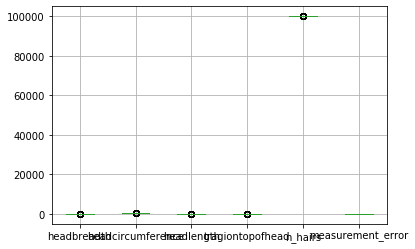

In [0]:
# Create the boxplot
head_df.boxplot()

plt.show()

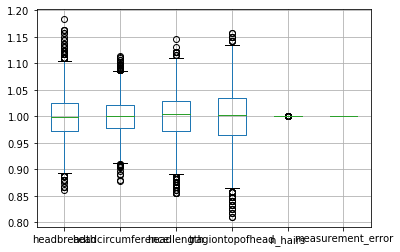

In [0]:
# Normalize the data
normalized_df = head_df / head_df.mean()

normalized_df.boxplot()
plt.show()

In [0]:
# Normalize the data
normalized_df = head_df / head_df.mean()

# Print the variances of the normalized data
print(normalized_df.var())

headbreadth          1.678952e-03
headcircumference    1.029623e-03
headlength           1.867872e-03
tragiontopofhead     2.639840e-03
n_hairs              1.002552e-08
measurement_error    3.231707e-27
dtype: float64


####Features with low variance


In [0]:
from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=0.001)

# Fit the selector to normalized head_df
sel.fit(head_df / head_df.mean())

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced dataframe
reduced_df = head_df.loc[:, mask]

print("Dimensionality reduced from {} to {}.".format(head_df.shape[1], reduced_df.shape[1]))

Dimensionality reduced from 6 to 4.


####Removing features with many missing values

In [0]:
school_df = Public_Schools2
school_df.shape

(131, 21)

In [0]:
# school_df.isna().sum()/school_df.shape[0]

In [0]:
# Create a boolean mask on whether each feature less than 50% missing values.
mask = school_df.isna().sum() / len(school_df) < 0.5

# Create a reduced dataset by applying the mask
reduced_df = school_df.loc[:, mask]

print(school_df.shape)
print(reduced_df.shape)

(131, 21)
(131, 19)


###Pairwise correlation


In [0]:
ansur_df_full = df.copy()
ansur_df_full.shape

(6068, 94)

In [0]:
ansur_df = ansur_df_full.copy()

In [0]:
ansur_df['Elbow rest height'] = ansur_df_full['elbowrestheight']
ansur_df['Wrist circumference'] = ansur_df_full['wristcircumference']
ansur_df['Ankle circumference'] = ansur_df_full['anklecircumference']
ansur_df['Buttock height'] = ansur_df_full['buttockheight']
ansur_df['Crotch height'] = ansur_df_full['crotchheight']
ansur_df.shape

(6068, 99)

In [0]:
# match dataset
ansur_df = ansur_df.iloc[:, 94:]
ansur_df.shape

(6068, 5)

In [0]:
# ansur_df.corr()

In [0]:
from matplotlib.colors import LinearSegmentedColormap as cmap

In [0]:
cmap = 'PuBu_r'

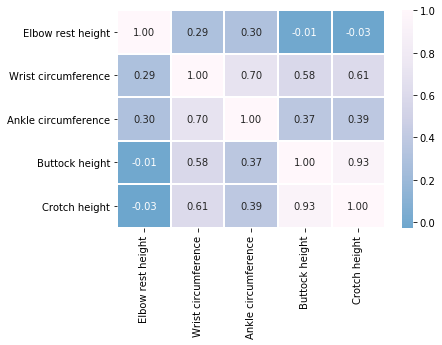

In [0]:
# Create the correlation matrix
corr = ansur_df.corr()

# Draw the heatmap
sns.heatmap(corr,  cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

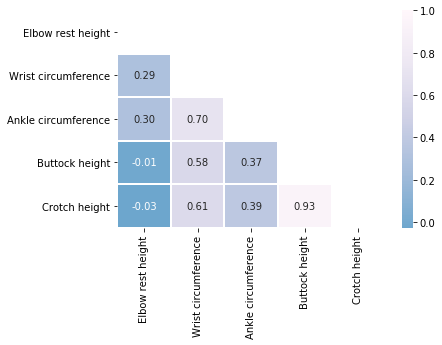

In [0]:
# Create the correlation matrix
corr = ansur_df.corr()

# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))

# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

###Removing highly correlated features


In [0]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = ansur_df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]

# Drop the features in the to_drop list
reduced_df = ansur_df.drop(to_drop, axis=1)

print("The reduced_df dataframe has {} columns".format(reduced_df.shape[1]))

The reduced_df dataframe has 5 columns


####Nuclear energy and pool drownings

In [0]:
from io import StringIO

d = '''    pool_drownings  nuclear_energy
0              421           728.3
1              465           753.9
2              494           768.8
3              538           780.1
4              430           763.7
5              530           788.5
6              511           782.0
7              600           787.2
8              582           806.4
9              605           806.2
10             603           798.9'''

weird_df = pd.read_csv(StringIO(d), sep='\s+')

In [0]:
# Print the first five lines of weird_df
print(weird_df.head())

   pool_drownings  nuclear_energy
0             421           728.3
1             465           753.9
2             494           768.8
3             538           780.1
4             430           763.7


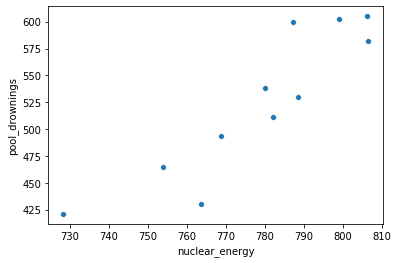

In [0]:
# Put nuclear energy production on the x-axis and the number of pool drownings on the y-axis
sns.scatterplot(x="nuclear_energy", y="pool_drownings", data=weird_df)
plt.show()

In [0]:
# Print out the correlation matrix of weird_df
print(weird_df.corr())

                pool_drownings  nuclear_energy
pool_drownings        1.000000        0.901179
nuclear_energy        0.901179        1.000000


#3.Feature selection II, selecting for model accuracy

In this second chapter on feature selection, you'll learn how to let models help you find the most important features in a dataset for predicting a particular target feature. In the final lesson of this chapter, you'll combine the advice of multiple, different, models to decide on which features are worth keeping.

###Selecting features for model performance


####Building a diabetes classifier


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()

In [0]:
# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)

# Fit the logistic regression model on the scaled training data
lr.fit(X_train_std, y_train)

# Scale the test features
X_test_std = scaler.transform(X_test)

# Predict diabetes presence on the scaled test set
y_pred = lr.predict(X_test_std)

# Prints accuracy metrics and feature coefficients
print("{0:.1%} accuracy on test set.".format(accuracy_score(y_test, y_pred))) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

95.0% accuracy on test set.
{'neckcircumferencebase': 4.73}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


####Manual Recursive Feature Elimination

In [0]:
diabetes_df = PimaIndians
diabetes_df.tail()

,pregnant,glucose,diastolic,triceps,insulin,bmi,family,age,test
387,0,181,88,44,510,43.3,0.222,26,positive
388,1,128,88,39,110,36.5,1.057,37,positive
389,2,88,58,26,16,28.4,0.766,22,negative
390,10,101,76,48,180,32.9,0.171,63,negative
391,5,121,72,23,112,26.2,0.245,30,negative


In [0]:
y = diabetes_df['test']
# X = diabetes_df.drop('test', axis=1)

In [0]:
# Remove the feature with the lowest model coefficient
X = diabetes_df[['pregnant', 'glucose', 'triceps', 'insulin', 'bmi', 'family', 'age']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print("{0:.1%} accuracy on test set.".format(acc)) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

80.6% accuracy on test set.
{'pregnant': 0.05, 'glucose': 1.23, 'triceps': 0.24, 'insulin': 0.2, 'bmi': 0.39, 'family': 0.34, 'age': 0.35}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
# Remove the 2 features with the lowest model coefficients
X = diabetes_df[['glucose', 'triceps', 'bmi', 'family', 'age']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print("{0:.1%} accuracy on test set.".format(acc)) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

79.6% accuracy on test set.
{'glucose': 1.13, 'triceps': 0.25, 'bmi': 0.34, 'family': 0.34, 'age': 0.37}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
# Only keep the feature with the highest coefficient
X = diabetes_df[['glucose']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model to the data
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print("{0:.1%} accuracy on test set.".format(acc)) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

76.5% accuracy on test set.
{'glucose': 1.27}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


####Automatic Recursive Feature Elimination

In [0]:
from sklearn.feature_selection.rfe import RFE

In [0]:
# match dataset
X = diabetes_df.drop('test', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [0]:
X_train.shape

(294, 8)

In [0]:
# Create the RFE with a LogisticRegression estimator and 3 features to select
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=3, verbose=1)

# Fit the eliminator to the data
rfe.fit(X_train, y_train)

# Print the features and their ranking (high = dropped early on)
print(dict(zip(X.columns, rfe.ranking_)))

# Print the features that are not eliminated
print(X.columns[rfe.support_])

# Calculates the test set accuracy
acc = accuracy_score(y_test, rfe.predict(X_test))
print("{0:.1%} accuracy on test set.".format(acc)) 

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
{'pregnant': 1, 'glucose': 1, 'diastolic': 3, 'triceps': 2, 'insulin': 6, 'bmi': 5, 'family': 1, 'age': 4}
Index(['pregnant', 'glucose', 'family'], dtype='object')
80.6% accuracy on test set.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

###Tree-based feature selection


####Building a random forest model

In [0]:
X.shape

(392, 8)

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
# Perform a 75% training and 25% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Fit the random forest model to the training data
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# Calculate the test set accuracy
acc = accuracy_score(y_test, rf.predict(X_test))

# Print the importances per feature
print(dict(zip(X.columns, rf.feature_importances_.round(2))))

# Print accuracy
print("{0:.1%} accuracy on test set.".format(acc)) 

{'pregnant': 0.09, 'glucose': 0.21, 'diastolic': 0.08, 'triceps': 0.11, 'insulin': 0.13, 'bmi': 0.09, 'family': 0.12, 'age': 0.16}
77.6% accuracy on test set.


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


####Random forest for feature selection

In [0]:
# Create a mask for features importances above the threshold
mask = rf.feature_importances_ > 0.15

# Prints out the mask
print(mask)

[False  True False False False False False  True]


In [0]:
# Create a mask for features importances above the threshold
mask = rf.feature_importances_ > 0.15

# Apply the mask to the feature dataset X
reduced_X = X.loc[:, mask]

# prints out the selected column names
print(reduced_X.columns)

Index(['glucose', 'age'], dtype='object')


####Recursive Feature Elimination with random forests
You'll wrap a Recursive Feature Eliminator around a random forest model to remove features step by step. This method is more conservative compared to selecting features after applying a single importance threshold. Since dropping one feature can influence the relative importances of the others.

In [0]:
# Wrap the feature eliminator around the random forest model
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=2, verbose=1)

In [0]:
# Wrap the feature eliminator around the random forest model
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=2, verbose=1)

# Fit the model to the training data
rfe.fit(X_train, y_train)

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                     criterion='gini', max_depth=None,
                                     max_features='auto', max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators='warn', n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False),
    n_features_to_select=2, step=1, verbose=1)

In [0]:
# Create a mask using an attribute of rfe
mask = rfe.support_

# Apply the mask to the feature dataset X and print the result
reduced_X = X.loc[:, mask]
print(reduced_X.columns)

Index(['glucose', 'bmi'], dtype='object')


###Regularized linear regression


In [0]:
ansur_m.shape

(4082, 99)

In [0]:
y = ansur_m["BMI"]

In [0]:
X_col = ['abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth', 'buttockcircumference',
       'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight',
       'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal',
       'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength', 'handbreadth', 'handcircumference', 'handlength',
       'headbreadth', 'headcircumference', 'headlength', 'heelanklecircumference', 'heelbreadth', 'hipbreadth', 'hipbreadthsitting', 'iliocristaleheight', 'interpupillarybreadth', 'interscyei',
       'interscyeii', 'kneeheightmidpatella', 'kneeheightsitting', 'lateralfemoralepicondyleheight', 'lateralmalleolusheight', 'lowerthighcircumference', 'mentonsellionlength', 'neckcircumference',
       'neckcircumferencebase', 'overheadfingertipreachsitting', 'palmlength', 'poplitealheight', 'radialestylionlength', 'shouldercircumference', 'shoulderelbowlength', 'shoulderlength',
       'sittingheight', 'sleevelengthspinewrist', 'sleeveoutseam', 'span', 'suprasternaleheight', 'tenthribheight', 'thighcircumference', 'thighclearance', 'thumbtipreach', 'tibialheight',
       'tragiontopofhead', 'trochanterionheight', 'verticaltrunkcircumferenceusa', 'waistbacklength', 'waistbreadth', 'waistcircumference', 'waistdepth', 'waistfrontlengthsitting',
       'waistheightomphalion', 'wristcircumference', 'wristheight']
X = ansur_m[X_col]

####Creating a LASSO regressor

In [0]:
from sklearn.linear_model import Lasso

In [0]:
# Set the test size to 30% to get a 70-30% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)

# Create the Lasso model 
la = Lasso()

# Fit it to the standardized training data
la.fit(X_train_std, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
# Transform the test set with the pre-fitted scaler
X_test_std = scaler.transform(X_test)

# Calculate the coefficient of determination (R squared) on X_test_std
r_squared = la.score(X_test_std, y_test)
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))

# Create a list that has True values when coefficients equal 0
zero_coef = la.coef_ == 0

# Calculate how many features have a zero coefficient
n_ignored = sum(zero_coef)
print("The model has ignored {} out of {} features.".format(n_ignored, len(la.coef_)))

The model can predict 84.7% of the variance in the test set.
The model has ignored 82 out of 91 features.


####Adjusting the regularization strength
Your current Lasso model has an $R^{2}$ score of 84.7%. When a model applies overly powerful regularization it can suffer from high bias, hurting its predictive power.

In [0]:
# Find the highest alpha value with R-squared above 98%
la = Lasso(alpha=0.1, random_state=0)

# Fits the model and calculates performance stats
la.fit(X_train_std, y_train)
r_squared = la.score(X_test_std, y_test)
n_ignored_features = sum(la.coef_ == 0)

# Print peformance stats 
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))
print("{} out of {} features were ignored.".format(n_ignored_features, len(la.coef_)))

The model can predict 98.3% of the variance in the test set.
64 out of 91 features were ignored.


###Combining feature selectors


####Creating a LassoCV regressor


In [0]:
from sklearn.linear_model import LassoCV

# Create and fit the LassoCV model on the training set
lcv = LassoCV()
lcv.fit(X_train, y_train)
print('Optimal alpha = {0:.3f}'.format(lcv.alpha_))

# Calculate R squared on the test set
r_squared = lcv.score(X_test, y_test)
print('The model explains {0:.1%} of the test set variance'.format(r_squared))

# Create a mask for coefficients not equal to zero
lcv_mask = lcv.coef_ != 0
print('{} features out of {} selected'.format(sum(lcv_mask), len(lcv_mask)))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Optimal alpha = 0.404
The model explains 98.7% of the test set variance
36 features out of 91 selected


####Ensemble models for extra votes

In [0]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

# Select 10 features with RFE on a GradientBoostingRegressor, drop 3 features on each step
rfe_gb = RFE(estimator=GradientBoostingRegressor(), 
             n_features_to_select=10, step=3, verbose=1)
rfe_gb.fit(X_train, y_train)

Fitting estimator with 91 features.
Fitting estimator with 88 features.
Fitting estimator with 85 features.
Fitting estimator with 82 features.
Fitting estimator with 79 features.
Fitting estimator with 76 features.
Fitting estimator with 73 features.
Fitting estimator with 70 features.
Fitting estimator with 67 features.
Fitting estimator with 64 features.
Fitting estimator with 61 features.
Fitting estimator with 58 features.
Fitting estimator with 55 features.
Fitting estimator with 52 features.
Fitting estimator with 49 features.
Fitting estimator with 46 features.
Fitting estimator with 43 features.
Fitting estimator with 40 features.
Fitting estimator with 37 features.
Fitting estimator with 34 features.
Fitting estimator with 31 features.
Fitting estimator with 28 features.
Fitting estimator with 25 features.
Fitting estimator with 22 features.
Fitting estimator with 19 features.
Fitting estimator with 16 features.
Fitting estimator with 13 features.


RFE(estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse',
                                        init=None, learning_rate=0.1, loss='ls',
                                        max_depth=3, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_iter_no_change=None,
                                        presort='auto', random_state=None,
                                        subsample=1.0, tol=0.0001,
                                        validation_fraction=0.1, verbose=0,
                                        warm_start=False),
    n_features_to_select=10, step=3, verbose=1)

In [0]:
# Calculate the R squared on the test set
r_squared = rfe_gb.score(X_test, y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

The model can explain 97.4% of the variance in the test set


In [0]:
# Assign the support array to gb_mask
gb_mask = rfe_gb.support_

In [0]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Select 10 features with RFE on a RandomForestRegressor, drop 3 features on each step
rfe_rf = RFE(estimator=RandomForestRegressor(), 
             n_features_to_select=10, step=3, verbose=1)
rfe_rf.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_rf.score(X_test, y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

# Assign the support array to gb_mask
rf_mask = rfe_rf.support_

Fitting estimator with 91 features.


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 88 features.


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 85 features.


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 82 features.


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 79 features.


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 76 features.


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 73 features.


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 70 features.


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 67 features.


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 64 features.


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 61 features.


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 58 features.


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 55 features.


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 52 features.


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 49 features.


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 46 features.


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 43 features.


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 40 features.


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 37 features.


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 34 features.


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 31 features.


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 28 features.


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 25 features.


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 22 features.


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 19 features.


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 16 features.


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 13 features.


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The model can explain 96.0% of the variance in the test set


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


####Combining 3 feature selectors


In [0]:
# Sum the votes of the three models
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)
print(votes)# Sum the votes of the three models
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)

# Create a mask for features selected by all 3 models
meta_mask = votes >= 3
print(meta_mask)

[2 0 0 1 2 0 0 0 3 0 0 0 0 0 0 1 3 1 0 0 3 1 0 3 1 0 0 1 1 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 2 0 2 0 1 0 1 0 1 0 0 1 1 0 1
 2 0 3 1 1 1 0 0 1 0 0 3 2 0 2 0 0]
[False False False False False False False False  True False False False
 False False False False  True False False False  True False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False  True False False False False False]


In [0]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [0]:
# Sum the votes of the three models
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)

# Create a mask for features selected by all 3 models
meta_mask = votes >= 3

# Apply the dimensionality reduction on X
X_reduced = X.loc[:, meta_mask]
print(X_reduced.columns)# Sum the votes of the three models
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)

# Create a mask for features selected by all 3 models
meta_mask = votes >= 3

# Apply the dimensionality reduction on X
X_reduced = X.loc[:, meta_mask]

# Plug the reduced dataset into a linear regression pipeline
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=0)
lm.fit(scaler.fit_transform(X_train), y_train)
r_squared = lm.score(scaler.transform(X_test), y_test)
print('The model can explain {0:.1%} of the variance in the test set using {1:} features.'.format(r_squared, len(lm.coef_)))

Index(['bicepscircumferenceflexed', 'buttockdepth', 'calfcircumference',
       'chestcircumference', 'thighcircumference', 'waistcircumference'],
      dtype='object')
The model can explain 91.9% of the variance in the test set using 6 features.


#4.Feature extraction

This chapter is a deep-dive on the most frequently used dimensionality reduction algorithm, Principal Component Analysis (PCA). You'll build intuition on how and why this algorithm is so powerful and will apply it both for data exploration and data pre-processing in a modeling pipeline. You'll end with a cool image compression use case.

In [0]:
sales_df = grocery_sales.copy()
sales_df.shape

(78, 4)

###Feature extraction


In [0]:
# Calculate the price from the quantity sold and revenue
sales_df['price'] = sales_df['revenue'] / sales_df['quantity']

# Drop the quantity and revenue features
reduced_df = sales_df.drop(['revenue', 'quantity'], axis=1)

print(reduced_df.head())

  storeID  product     price
0       A   Apples  5.135616
1       A  Bananas  3.365105
2       A  Oranges  5.317020
3       B   Apples  5.143417
4       B  Bananas  3.898517


In [0]:
#@title
# match dataset
height_array = np.array([[ 81.5 ,   1.78,   1.8 ,   1.8 ],
       [ 72.6 ,   1.7 ,   1.7 ,   1.69],
       [ 92.9 ,   1.74,   1.75,   1.73],
       [ 79.4 ,   1.66,   1.68,   1.67],
       [ 94.6 ,   1.91,   1.93,   1.9 ],
       [ 80.2 ,   1.72,   1.71,   1.74],
       [116.2 ,   1.81,   1.82,   1.81],
       [ 95.4 ,   1.85,   1.85,   1.84],
       [ 99.5 ,   1.78,   1.78,   1.8 ],
       [ 70.2 ,   1.81,   1.81,   1.82],
       [ 88.2 ,   1.78,   1.78,   1.8 ],
       [ 70.1 ,   1.73,   1.74,   1.74],
       [103.7 ,   1.81,   1.82,   1.8 ],
       [111.6 ,   1.86,   1.86,   1.88],
       [ 89.6 ,   1.71,   1.71,   1.71],
       [ 92.4 ,   1.74,   1.74,   1.75],
       [ 77.9 ,   1.69,   1.7 ,   1.7 ],
       [ 96.9 ,   1.77,   1.77,   1.77],
       [ 76.  ,   1.75,   1.75,   1.76],
       [ 90.8 ,   1.79,   1.78,   1.8 ],
       [ 71.4 ,   1.78,   1.75,   1.78],
       [ 74.6 ,   1.68,   1.69,   1.67],
       [ 79.2 ,   1.65,   1.66,   1.65],
       [ 91.5 ,   1.96,   1.95,   1.97],
       [ 96.5 ,   1.76,   1.78,   1.75],
       [ 67.5 ,   1.63,   1.62,   1.63],
       [107.3 ,   1.82,   1.82,   1.82],
       [ 79.3 ,   1.8 ,   1.8 ,   1.82],
       [ 78.2 ,   1.74,   1.76,   1.75],
       [ 88.2 ,   1.82,   1.83,   1.82],
       [ 71.5 ,   1.88,   1.88,   1.87],
       [ 94.7 ,   1.76,   1.76,   1.77],
       [ 66.5 ,   1.68,   1.67,   1.67],
       [ 87.9 ,   1.85,   1.83,   1.85],
       [ 67.5 ,   1.78,   1.78,   1.77],
       [ 88.4 ,   1.79,   1.79,   1.8 ],
       [ 69.5 ,   1.68,   1.69,   1.69],
       [121.8 ,   1.85,   1.86,   1.85],
       [ 71.9 ,   1.74,   1.74,   1.74],
       [ 88.1 ,   1.74,   1.74,   1.73],
       [ 57.5 ,   1.74,   1.73,   1.73],
       [ 87.6 ,   1.68,   1.67,   1.68],
       [ 85.  ,   1.84,   1.82,   1.84],
       [ 86.5 ,   1.73,   1.75,   1.74],
       [ 95.8 ,   1.76,   1.75,   1.78],
       [ 66.7 ,   1.67,   1.67,   1.68],
       [ 70.6 ,   1.74,   1.73,   1.73],
       [ 84.7 ,   1.71,   1.72,   1.72],
       [101.3 ,   1.88,   1.86,   1.87],
       [ 85.6 ,   1.67,   1.67,   1.67],
       [109.5 ,   1.78,   1.77,   1.78],
       [ 83.4 ,   1.84,   1.84,   1.86],
       [ 72.7 ,   1.64,   1.63,   1.63],
       [ 98.6 ,   1.75,   1.74,   1.74],
       [ 77.3 ,   1.7 ,   1.7 ,   1.7 ],
       [140.  ,   1.84,   1.84,   1.83],
       [ 67.4 ,   1.78,   1.78,   1.79],
       [ 88.4 ,   1.75,   1.75,   1.74],
       [ 98.8 ,   1.7 ,   1.69,   1.69],
       [ 95.2 ,   1.85,   1.85,   1.85],
       [ 56.6 ,   1.61,   1.6 ,   1.61],
       [ 71.7 ,   1.71,   1.71,   1.73],
       [ 71.7 ,   1.84,   1.83,   1.85],
       [ 80.2 ,   1.68,   1.66,   1.68],
       [ 98.8 ,   1.74,   1.74,   1.73],
       [ 66.2 ,   1.7 ,   1.7 ,   1.71],
       [ 80.7 ,   1.67,   1.65,   1.66],
       [105.3 ,   1.85,   1.85,   1.83],
       [ 68.3 ,   1.75,   1.74,   1.76],
       [ 74.9 ,   1.62,   1.62,   1.62],
       [ 73.8 ,   1.77,   1.78,   1.78],
       [ 60.4 ,   1.7 ,   1.7 ,   1.7 ],
       [ 77.4 ,   1.62,   1.63,   1.63],
       [ 76.8 ,   1.73,   1.72,   1.72],
       [102.2 ,   1.84,   1.84,   1.83],
       [ 96.3 ,   1.74,   1.73,   1.75],
       [ 92.3 ,   1.67,   1.66,   1.66],
       [ 98.8 ,   1.75,   1.74,   1.74],
       [ 88.7 ,   1.82,   1.82,   1.82],
       [ 98.7 ,   1.8 ,   1.8 ,   1.8 ],
       [ 85.2 ,   1.75,   1.74,   1.75],
       [ 74.8 ,   1.72,   1.73,   1.71],
       [ 92.  ,   1.81,   1.81,   1.8 ],
       [ 74.4 ,   1.79,   1.77,   1.77],
       [ 82.3 ,   1.72,   1.73,   1.73],
       [ 62.7 ,   1.58,   1.6 ,   1.56],
       [ 77.8 ,   1.72,   1.73,   1.71],
       [ 88.2 ,   1.8 ,   1.8 ,   1.8 ],
       [ 59.  ,   1.74,   1.73,   1.73],
       [ 73.  ,   1.7 ,   1.71,   1.72],
       [ 86.4 ,   1.74,   1.74,   1.73],
       [ 86.6 ,   1.73,   1.74,   1.73],
       [ 73.7 ,   1.78,   1.78,   1.78],
       [ 65.4 ,   1.82,   1.83,   1.81],
       [ 69.6 ,   1.84,   1.84,   1.85],
       [ 77.5 ,   1.79,   1.8 ,   1.79],
       [ 72.7 ,   1.66,   1.66,   1.67],
       [ 79.7 ,   1.7 ,   1.72,   1.71],
       [ 74.4 ,   1.79,   1.79,   1.81],
       [ 96.8 ,   1.76,   1.76,   1.77]])

In [0]:
height_df = pd.DataFrame(height_array, \
                         columns = ['weight_kg', 'height_1', 'height_2', 'height_3'])
height_df

,weight_kg,height_1,height_2,height_3
0,81.5,1.78,1.80,1.80
1,72.6,1.70,1.70,1.69
2,92.9,1.74,1.75,1.73
3,79.4,1.66,1.68,1.67
4,94.6,1.91,1.93,1.90
...,...,...,...,...
95,77.5,1.79,1.80,1.79
96,72.7,1.66,1.66,1.67
97,79.7,1.70,1.72,1.71
98,74.4,1.79,1.79,1.81


In [0]:
# Calculate the mean height
height_df['height'] = height_df[['height_1', 'height_2', 'height_3']].mean(axis=1)

# Drop the 3 original height features
reduced_df = height_df.drop(['height_1', 'height_2', 'height_3'], axis=1)

print(reduced_df.head())

   weight_kg    height
0       81.5  1.793333
1       72.6  1.696667
2       92.9  1.740000
3       79.4  1.670000
4       94.6  1.913333


###Principal component analysis


In [0]:
ansur_df = ansur_f[:250]

In [0]:
ansur_df['Height m'] = ansur_df['stature_m']
ansur_df['Buttock Height'] = ansur_df['buttockheight']
ansur_df['Waist Circumference'] = ansur_df['waistcircumference']
ansur_df['Shoulder Circumference'] = ansur_df["shouldercircumference"]

In [13]:
ansur_df = ansur_df.iloc[:,99:]
ansur_df.shape

(250, 4)

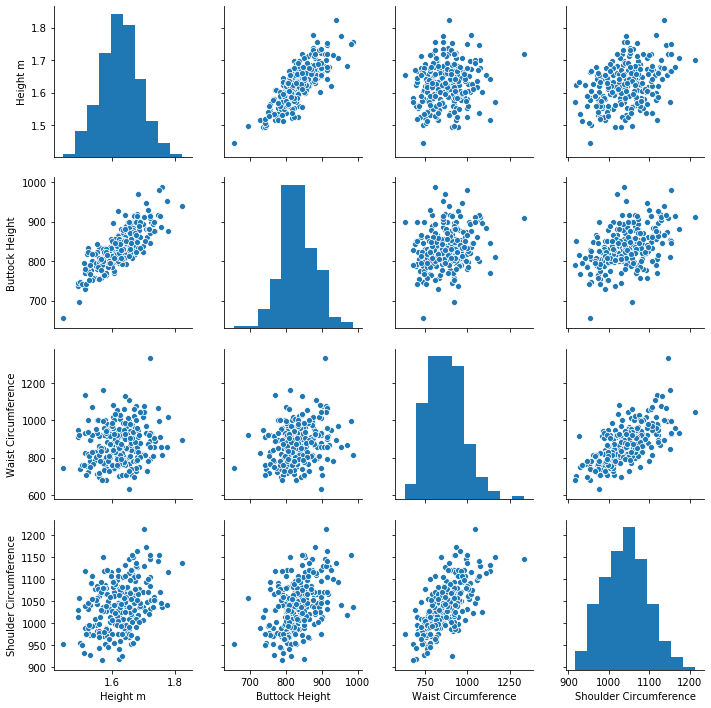

In [14]:
# Create a pairplot to inspect ansur_df
sns.pairplot(ansur_df)

plt.show()

In [0]:
from sklearn.preprocessing import StandardScaler

# Create the scaler and standardize the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df) 

In [0]:
# Create the PCA instance and fit and transform the data with pca
pca = PCA()
pc = pca.fit_transform(ansur_std)

# This changes the numpy array output back to a dataframe
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])

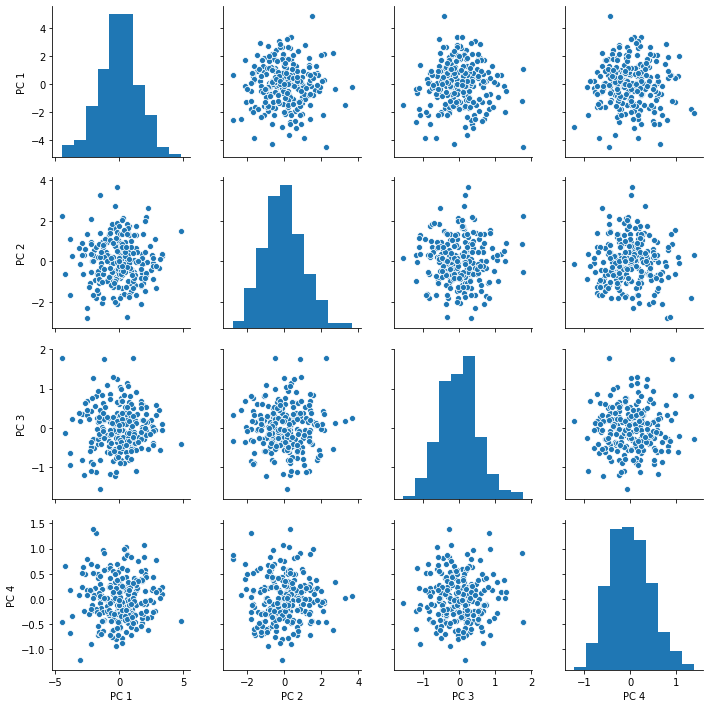

In [17]:
# Create a pairplot of the principal component dataframe
sns.pairplot(pc_df)
plt.show()

####PCA on a larger dataset


In [0]:
ansur_df = ansur_f[:250]

In [0]:
col = ['stature_m', 'buttockheight', 'waistdepth', 'span', 'waistcircumference', 'shouldercircumference', 'footlength', 'handlength', 'functionalleglength', 'chestheight', 'chestcircumference',
       'cervicaleheight', 'sittingheight']

In [20]:
ansur_df = ansur_df[col]
ansur_df.shape

(250, 13)

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

# Apply PCA
pca = PCA()
pca.fit(ansur_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

####PCA explained variance# Inspect the explained variance ratio per component
print(pca.explained_variance_ratio_)

In [22]:
# Print the cumulative sum of the explained variance ratio
print(pca.explained_variance_ratio_.cumsum())

[0.56496832 0.79296952 0.87033513 0.91564868 0.94212698 0.95496615
 0.96687301 0.97787849 0.98575899 0.99254809 0.99607229 0.99923424
 1.        ]


**Observation:**

Using no more than 4 principal components we can explain more than 90% of the variance in the 13 feature dataset.

###PCA applications


####Understanding the components
You'll apply PCA to the numeric features of the Pokemon dataset, poke_df, using a pipeline to combine the feature scaling and PCA in one go. You'll then interpret the meanings of the first two components.

In [0]:
from sklearn.pipeline import Pipeline

In [0]:
# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=2))])

In [27]:
subset = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
poke_df = pokemon[subset]
poke_df.shape

(800, 6)

In [28]:
# Fit it to the dataset and extract the component vectors
pipe.fit(poke_df)
vectors = pipe.steps[1][1].components_.round(2)

# Print feature effects
print('PC 1 effects = ' + str(dict(zip(poke_df.columns, vectors[0]))))
print('PC 2 effects = ' + str(dict(zip(poke_df.columns, vectors[1]))))

PC 1 effects = {'HP': 0.39, 'Attack': 0.44, 'Defense': 0.36, 'Sp. Atk': 0.46, 'Sp. Def': 0.45, 'Speed': 0.34}
PC 2 effects = {'HP': 0.08, 'Attack': -0.01, 'Defense': 0.63, 'Sp. Atk': -0.31, 'Sp. Def': 0.24, 'Speed': -0.67}


- All features have a similar positive effect. PC 1 can be interpreted as a measure of overall quality (high stats).

- Defense has a strong positive effect on the second component and speed a strong negative one. This component quantifies an agility vs. armor & protection trade-off.

####PCA for feature exploration

In [29]:
# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

print(pc)

[[-1.5563747  -0.02148212]
 [-0.36286656 -0.05026854]
 [ 1.28015158 -0.06272022]
 ...
 [ 2.45821626 -0.51588158]
 [ 3.5303971  -0.95106516]
 [ 2.23378629  0.53762985]]


In [32]:
subset = ['Type 1', 'Legendary']
poke_cat_df = pokemon[subset]
poke_cat_df.shape

(800, 2)

In [33]:
# Add the 2 components to poke_cat_df
poke_cat_df['PC 1'] = pc[:, 0]
poke_cat_df['PC 2'] = pc[:, 1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


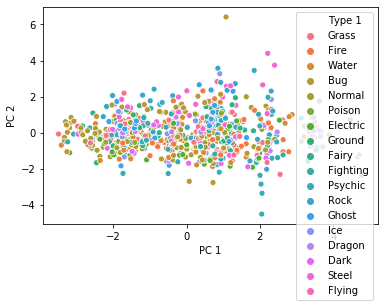

In [34]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

# Add the 2 components to poke_cat_df
poke_cat_df['PC 1'] = pc[:, 0]
poke_cat_df['PC 2'] = pc[:, 1]

# Use the Type feature to color the PC 1 vs PC 2 scatterplot
sns.scatterplot(data=poke_cat_df, 
                x='PC 1', y='PC 2', hue='Type 1')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


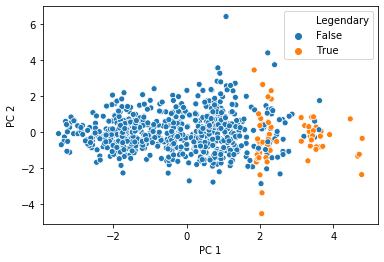

In [35]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

# Add the 2 components to poke_cat_df
poke_cat_df['PC 1'] = pc[:, 0]
poke_cat_df['PC 2'] = pc[:, 1]

# Use the Legendary feature to color the PC 1 vs PC 2 scatterplot
sns.scatterplot(data=poke_cat_df, 
                x='PC 1', y='PC 2', hue='Legendary')
plt.show()

####PCA in a model pipeline


In [0]:
X = poke_df
y = poke_cat_df['Legendary']

In [0]:
# pre-loaded
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=240)

In [0]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=2)),
        ('classifier', RandomForestClassifier(random_state=0))])

In [41]:
# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Prints the explained variance ratio
print(pipe.steps[1][1].explained_variance_ratio_)

[0.44603784 0.18208009]


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [42]:
# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the model accuracy
print('{0:.1%} test set accuracy'.format(accuracy))

94.2% test set accuracy


In [43]:
# Prints the explained variance ratio and accuracy
print(pipe.steps[1][1].explained_variance_ratio_)
print('{0:.1%} test set accuracy'.format(accuracy))

[0.44603784 0.18208009]
94.2% test set accuracy


###Principal Component selection


In [0]:
subset_col = ['abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth', 'buttockcircumference',
       'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight',
       'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal',
       'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength', 'handbreadth', 'handcircumference', 'handlength',
       'headbreadth', 'headcircumference', 'headlength', 'heelanklecircumference', 'heelbreadth', 'hipbreadth', 'hipbreadthsitting', 'iliocristaleheight', 'interpupillarybreadth', 'interscyei',
       'interscyeii', 'kneeheightmidpatella', 'kneeheightsitting', 'lateralfemoralepicondyleheight', 'lateralmalleolusheight', 'lowerthighcircumference', 'mentonsellionlength', 'neckcircumference',
       'neckcircumferencebase', 'overheadfingertipreachsitting', 'palmlength', 'poplitealheight', 'radialestylionlength', 'shouldercircumference', 'shoulderelbowlength', 'shoulderlength',
       'sittingheight', 'sleevelengthspinewrist', 'sleeveoutseam', 'span', 'suprasternaleheight', 'tenthribheight', 'thighcircumference', 'thighclearance', 'thumbtipreach', 'tibialheight',
       'tragiontopofhead', 'trochanterionheight', 'verticaltrunkcircumferenceusa', 'waistbacklength', 'waistbreadth', 'waistcircumference', 'waistdepth', 'waistfrontlengthsitting',
       'waistheightomphalion', 'wristcircumference', 'wristheight', 'weight_kg', 'stature_m', 'BMI']
ansur_df = ansur_f[subset_col]

In [0]:
# Pipe a scaler to PCA selecting 80% of the variance
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=0.8))])

In [48]:
# Fit the pipe to the data
pipe.fit(ansur_df)

print('{} components selected'.format(len(pipe.steps[1][1].components_)))

11 components selected


In [49]:
# Let PCA select 90% of the variance
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=0.9))])

# Fit the pipe to the data
pipe.fit(ansur_df)

print('{} components selected'.format(len(pipe.steps[1][1].components_)))

23 components selected


**Observation:**

We need to more than double the components to go from 80% to 90% explained variance.

####Choosing the number of components

In [0]:
# Pipeline a scaler and pca selecting 10 components
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=10))])

In [51]:
# Fit the pipe to the data
pipe.fit(ansur_df)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('reducer',
                 PCA(copy=True, iterated_power='auto', n_components=10,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

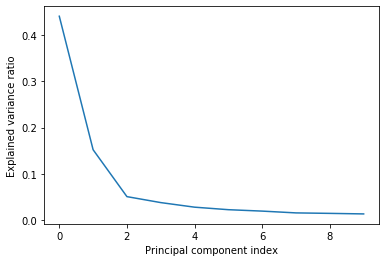

In [52]:
# Plot the explained variance ratio
plt.plot(pipe.steps[1][1].explained_variance_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

####PCA for image compression

In [0]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 4, figsize=(6, 6),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.05, wspace=0.05))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28),
                  cmap='binary',
                  clim=(0, 300))
    plt.show()

In [54]:
#@title
X_test = np.array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., 109., 235., 254., 254., 254., 224.,  99.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0., 156., 253., 253., 253., 253.,
        253., 253., 252., 224.,  39.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        157., 252., 253., 253., 253., 164., 171., 253., 253., 253., 208.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0., 235., 253., 253., 253.,  60.,
          4.,   5.,  49., 224., 253., 250., 137.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., 235., 253., 253., 253., 162.,   0.,   0.,   0.,  45., 223.,
        253., 233.,  38.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  84., 197., 253., 132.,
         22.,   0.,   0.,   0.,   0., 176., 253., 253.,  97.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  15.,  38.,   6.,   0.,   0.,   0.,   0.,  45.,
        242., 253., 225.,  15.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  19., 181., 253., 253., 180.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  19., 115.,
        253., 253., 222.,  19.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 166., 253., 253., 253., 180.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  85., 239.,
        253., 253., 189.,  22.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  84., 239., 253., 253., 188.,  22.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  83., 240., 253.,
        253., 212.,  22.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,  15., 221., 253., 253., 223.,  98.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  13., 179., 253., 253.,
        244.,  51.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  11., 181., 253., 253., 253., 226.,  56.,  21.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   9., 183., 253., 253., 253.,
        253., 253., 253., 229., 150., 150., 130.,  20., 101., 150.,  66.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., 185., 253., 253., 253., 253., 253., 253., 253., 253., 253.,
        253., 253., 253., 253., 235.,  48.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 241., 253., 253., 253.,
        248., 247., 249., 253., 253., 253., 253., 253., 252., 166.,  48.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., 174., 253., 203., 123.,  19.,   0.,  35., 123., 123.,
        123., 123., 123., 108.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        111., 253., 154.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  21., 162., 253., 252., 179.,   3.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 168.,
        252., 253., 252., 252.,  10.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   8.,  76., 151., 250., 252., 250., 201.,  77.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  13., 172., 252., 252.,
        252., 180.,  77.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,  70., 229., 252., 252., 252., 104.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  16., 207., 252., 247.,
        174.,  50.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  18., 153., 252., 237.,  61.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 100., 252., 252., 117.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  58., 233., 252., 109.,  21.,   0.,   0.,   0.,   0.,   0.,
          0.,  92.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,  19., 172., 253., 226.,  39.,
          0.,  36., 143., 225., 253., 255., 253., 253., 253., 253., 128.,
         18.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  34., 252., 252.,  44.,   0., 138., 246., 252., 252., 252.,
        253., 252., 252., 252., 252., 252., 211.,  26.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   6., 146., 252., 193.,
         66., 219., 252., 252., 252., 252., 240., 179., 252., 252., 252.,
        252., 252., 226.,  98.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  76., 252., 251., 249., 252., 251., 230., 148.,
         73.,   9.,   3.,  10.,  10.,  59., 248., 252., 252., 165.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 176., 252.,
        252., 252., 252., 169.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., 127., 252., 252.,  90.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  38., 145., 249., 252., 252., 226., 131.,
         23.,   0.,   0.,   0.,   0.,   0.,   0.,  19., 236., 252., 175.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., 127., 206., 252., 252., 252., 203., 122.,  60.,  12.,   2.,
          0.,   3.,  12., 232., 252., 175.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  22., 200., 252.,
        252., 252., 252., 253., 252., 171., 154., 175., 252., 252., 225.,
         69.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  23.,  66., 114., 123., 252., 253., 252.,
        252., 252., 252., 252., 249.,  97.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,  10.,  81.,  47., 142., 142., 248., 252., 166.,  40.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   7.,  70., 162., 161.,
        195.,  44.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., 143., 232., 253., 241., 206., 211., 236.,  17.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  92.,  62.,  46.,  34.,
          0.,  13., 221.,  93.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 151.,  93.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  93., 185.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 176., 134.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 151., 127.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  85., 234.,
         59.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 208., 195.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  93., 244.,
         64.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 180., 187.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 119., 247.,
        104.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 255., 148.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 102., 241.,
         60.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  28., 215., 101.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  17., 224., 219.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  97., 254.,  69.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  55., 243., 253.,
        236., 231., 230., 230., 230., 231., 230., 214.,  13.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 161., 253., 253., 253., 254., 248., 230., 230.,
        197., 179., 213.,  63.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  95., 253.,
        177.,  94., 103.,  56.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         58., 250., 254., 254., 254., 254., 255., 202.,  75.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0., 124., 253., 253., 247., 190.,
        100., 199., 250., 249.,  81.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., 225., 253., 253., 131.,   0.,   0.,   0., 150., 253., 244.,
         60.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,  67., 246., 253., 202.,  24.,
          0.,   0.,   0.,  29., 161., 253.,  88.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  17., 230., 253., 112.,   0.,   0.,   0.,   0.,   0., 130.,
        253.,  88.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 225., 253., 112.,
          0.,   0.,   0.,   0., 149., 239., 241.,  51.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 167., 253., 112.,   0.,   0.,   0.,   0., 231.,
        253., 224.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 107., 253.,
        177.,   0.,   0.,   0.,  65., 243., 253., 224.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  40., 247., 233.,  16.,   0.,  13., 220.,
        253., 253., 204.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        132., 253., 205., 177., 200., 253., 253., 253., 188.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   2.,  70., 225., 253., 253.,
        253., 253., 253., 224.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  26.,  41.,  77., 194., 253., 253., 224.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  95., 253., 253., 224.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  95., 253., 253., 163.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,  95., 253., 253., 174.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  95., 253., 253.,
        146.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  95., 253., 253., 106.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  95., 253.,
        253., 144.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  58., 244., 253., 224.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        124., 251., 168.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  36.,  96.,  96.,  36., 194., 255., 253., 253., 253., 253.,
        195.,  96.,  48.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 214., 251., 251., 212.,
        251., 253., 251., 251., 251., 251., 253., 251., 220.,  43.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  80., 253., 251., 251., 251., 251., 253., 251., 251., 251.,
        251., 253., 235., 126.,  94.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 119., 189., 228., 188.,
        188., 188., 189., 188., 188.,  50.,  31., 253., 228.,  32.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  59.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., 100., 253., 251., 126.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  48., 134., 253., 219., 138.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  20.,  92., 190.,
        221., 251., 231.,  39.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,  32., 205., 253., 251., 251., 251., 173.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  32., 210., 251., 253.,
        251., 251., 251., 251.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., 127., 251., 251., 253., 251., 251., 251., 251.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 163., 253., 195.,  24.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  64., 251.,
        253.,  62.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 143., 251., 205.,  31.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 112., 248.,
        251., 158.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  20., 205., 251., 251., 158.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  60.,  96., 214., 205.,
        158.,  59.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  24., 190.,  43.,   0.,  12.,  32.,
         32., 171., 228., 253., 207.,  31.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         32., 251., 220., 127., 127., 220., 251., 251., 251., 205.,  31.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,  72., 251., 251., 251., 242.,
        244., 219., 188.,  89.,  19.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., 190., 251., 251., 152.,  95.,  94.,  47.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  21.,  75., 154., 155., 154., 154.,  40.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   4.,  66., 203.,
        253., 253., 253., 253., 253., 128.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   8., 167., 253., 253., 253., 253., 253., 253., 253.,
        193.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,  10.,  89., 214., 253., 253.,
        238., 155.,  39., 253., 253., 253., 250., 188.,  57.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., 149., 253., 253., 253., 167.,  19.,   0.,   2., 121., 249.,
        178., 215., 253., 212.,  74.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2., 159., 250., 253., 226.,  91.,
          2.,   0.,   0.,   0.,   6.,  23.,   0.,  12., 127., 251., 245.,
         60.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        117., 253., 253., 199.,  34.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 128., 253., 181.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   9., 216., 253., 235.,  73.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,
        138., 251.,  67.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         93., 253., 253.,  97.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,  91., 253., 153.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0., 214., 253., 215.,  14.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  37., 248., 173.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., 254., 253., 109.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 243., 253.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 254., 253.,  89.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 168., 253.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., 209., 253., 177.,   3.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   6., 245., 169.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 128., 253., 253.,
         62.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  90., 253., 127.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  28., 232., 253., 193.,  49.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  28., 210., 231.,
         28.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 178.,
        253., 253., 232., 128.,  22.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  40., 112., 219., 253., 177.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  13., 183., 249., 253., 253., 240.,
        234., 158., 134., 134., 134., 134., 162., 244., 253., 254., 206.,
         52.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., 110., 253., 253., 253., 253., 253., 253., 253., 253.,
        253., 253., 254., 190., 150.,  42.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,  39., 121.,
        208., 251., 254., 253., 253., 253., 233., 208., 111.,   3.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  52.,  54.,  54.,  54.,
         54.,  30.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   5.,  17.,  19.,  24.,  24.,  24.,  55.,  44.,  76.,
        139., 138., 170., 253., 253., 255., 232., 107.,   5.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 120., 196., 215.,
        252., 253., 252., 252., 252., 252., 253., 252., 252., 252., 252.,
        253., 252., 240.,  37.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 129., 252., 252., 252., 253., 252., 252., 252.,
        252., 190., 208., 202., 252., 252., 253., 252., 183.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  30., 128.,
        215., 116.,  56., 160., 128.,  98.,  45.,   5.,  17.,  70., 252.,
        252., 253., 214.,  33.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,  19.,  55.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 122., 252., 252., 253., 153.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 185.,
        253., 253., 255.,  92.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 184., 252., 252., 239.,  33.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  13.,
        203., 252., 252., 146.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 140., 252., 252., 252.,  21.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  11.,
        203., 252., 252., 252.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  24., 253., 253., 253., 190.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         97., 252., 252., 235.,  60.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0., 222., 252., 252., 160.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         43., 253., 252., 252., 160.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0., 116., 253., 252., 252.,  56.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., 179., 255., 253., 215.,  21.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,  17., 234., 253., 252., 110.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  93., 252., 253., 252.,  69.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 144., 252., 253., 252.,
         69.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   9., 128., 253., 231.,  37.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,  45., 146., 146., 146., 232.,
        254., 255., 255., 254., 180., 146.,  87.,  12.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          8., 227., 253., 253., 253., 253., 253., 253., 253., 253., 253.,
        253., 253.,  75.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   2.,  99., 223., 248., 248.,
        248., 192., 139., 139., 139., 169., 253., 253., 124.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   5.,
        143., 253., 253., 119.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 143., 253., 253., 243.,  51.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   8., 140.,
        252., 253., 253., 165.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  56., 221., 253., 253., 241., 161.,   2.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,  80.,  87., 172., 250., 253.,
        253., 253., 106.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         80., 252., 253., 253., 253., 253., 253., 253., 239.,  93.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,  69., 249., 253., 253., 253.,
        253., 253., 253., 253., 216.,   3.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., 148., 138.,  93.,  60.,  54., 141., 250., 253., 253.,
          5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   9., 198., 253., 253.,   5.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  15., 180., 253., 253.,
        185.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   9., 134., 253., 253., 253., 110.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,  61., 145., 253., 253., 251.,
        125.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  67.,
        173., 237., 253., 253., 228., 123.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,
        104.,  26.,  49., 170., 211., 250., 253., 253., 253., 185.,  47.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   5., 143., 249., 253., 250., 251., 253., 253.,
        253., 253., 228., 156.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  28., 234.,
        253., 253., 253., 253., 253., 199., 183., 114.,  16.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  92., 253., 253., 172., 145.,  79.,
          9.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,  79., 109., 171., 253., 253., 253., 255., 253., 253.,
        253., 255.,  35.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 105., 242., 252., 253.,
        252., 252., 252., 253., 252., 252., 252., 253.,  35.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  16., 222., 252., 252., 253., 252., 252., 252., 253., 241.,
        215., 132.,  72.,  10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 109., 252., 252., 252.,
        253., 252., 252., 252., 253.,  97.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., 109., 252., 252., 252., 253., 158.,  41.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1., 149., 252., 252.,
        252., 159.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., 105., 252., 252., 252., 252.,  41.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 144., 252., 252.,
        252., 252.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,  99., 253., 253., 253., 253., 253., 255., 253., 253.,
        253., 110., 109.,  31.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 181., 252., 252.,
        252., 252., 252., 253., 252., 252., 252., 253., 252., 227.,  93.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 160., 252., 252., 252., 252., 252., 253., 252.,
        252., 252., 253., 252., 252., 211., 105.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  16., 190.,
        252., 252., 252., 252., 253., 252., 252., 252., 253., 252., 252.,
        252., 207.,  20.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  84., 144., 207., 144., 144.,  84.,
          0.,   0.,   0., 145., 238., 253., 253., 255.,  35.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,  20.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  93.,
        252., 252., 253.,  77.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  37., 181., 252., 252., 253., 158.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        105.,  62.,   0.,   0.,   0.,   0.,   0.,   0.,  21., 144., 253.,
        252., 252., 252., 253.,  35.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  73., 253., 253., 253., 170., 253.,
        170., 171., 253., 253., 253., 255., 253., 253., 253., 208.,  20.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         52., 231., 252., 252., 252., 252., 252., 253., 252., 252., 252.,
        253., 252., 252., 210.,  20.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  52., 175., 231., 252.,
        252., 252., 253., 252., 252., 252., 237., 174.,  71.,  31.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  62.,  47., 232., 252., 252., 170., 128., 108.,
        108.,  62.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 117., 249., 204.,   8.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   5., 146.,
        240., 254., 229.,  28.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  19., 254., 254., 254., 254., 187.,   7.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  15., 194.,
        254., 239., 119., 240., 254., 188.,  14.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 123., 254., 254.,  81.,   0.,  69., 239.,
        254., 116.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1., 145., 248.,
        254., 150.,   6.,   0.,  29., 229., 254., 220.,  25.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 100., 254., 254., 217.,   0.,   0.,   0.,  23.,
        138., 211., 254., 151.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 228., 254.,
        225.,  39.,   0.,   0.,   0.,   0.,   0.,  28., 254., 231.,   4.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  83., 252., 254., 160.,   0.,   0.,   0.,   0.,
          0.,   0.,   3., 180., 254., 112.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  52., 231., 254.,
        200.,  22.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 151., 254.,
        222.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   2., 189., 254., 251.,  62.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  14., 221., 222.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 108., 254., 254.,
        132.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        212., 222.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 186., 254., 235.,  21.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0., 186., 243.,  50.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 223., 254.,
        131.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., 104., 254.,  76.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  74., 253., 254.,  65.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 161., 223.,   3.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  77., 255.,
        254.,  93.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  73., 241., 194.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  13., 228., 254., 206.,  55.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,  67., 241., 212.,  21.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        102., 241., 254., 252., 250., 166.,  89.,  33.,  19.,  33.,  33.,
        122., 248., 246.,  86.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  64., 184., 247., 254.,
        254., 254., 254., 222., 254., 254., 254., 186.,  91.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  34., 105., 146., 146., 169., 215., 192.,
        146., 105.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  68., 118., 249., 211.,  25.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  80., 198., 235., 246., 254., 254., 254.,
         55.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  94., 214., 247.,
        254., 254., 254., 254., 254., 230.,  38.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  34., 127., 220., 254., 254., 254., 218., 199., 226., 232.,
         60.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,  43., 222., 254., 254., 254.,
        226., 119.,  29.,   0., 108.,  56.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   5.,
         44., 222., 254., 254., 241., 117.,  19.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  77., 254., 254., 254., 187.,   3.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         77., 254., 254., 181.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0., 200., 254., 174.,  11.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., 214., 254.,  82.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  61.,  53.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 214., 254.,  82.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   2.,  49., 180., 246., 238.,
         55.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  53., 236., 254.,  82.,   0.,   0.,   0.,   0.,   0.,   0.,
          4., 110., 254., 254., 254., 254., 169.,  11.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 211., 254.,  86.,
          0.,   0.,   0.,   0.,   0.,  28., 157., 254., 254., 252., 202.,
        224., 254.,  96.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  77., 254., 220.,   0.,   0.,   0.,   0.,   0.,
         49., 254., 254., 254.,  84.,   0., 200., 254.,  96.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  77., 254.,
        253., 154.,   0.,   0.,   0.,   0., 180., 254., 254., 187., 236.,
        242., 252., 254.,  96.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  10., 156., 254., 245.,  84.,  47.,   0.,
          0.,  67., 255., 254., 254., 254., 254., 254., 218.,  13.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         42., 235., 254., 254., 231.,  77.,  63., 100., 254., 254., 254.,
        254., 254., 254., 179.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  70., 238., 254., 254.,
        254., 254., 254., 254., 254., 254., 254., 254., 222.,  63.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  65., 234., 234., 252., 254., 254., 254., 254.,
        244., 234., 114.,  21.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., 105., 117., 117., 206., 175.,  60.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   6., 133., 202., 253., 230.,
         38.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         75., 196., 253., 252., 252., 252.,  83.,   0.,   0.,   0.,  12.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  78., 243., 252., 253., 252., 230.,
        216., 164.,   0.,   0., 135., 135.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        217., 252., 229., 251., 134.,  32.,   0.,   0.,   0.,  80., 241.,
         63.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0., 217., 252., 218., 127.,   0.,
          0.,   0.,   0.,  81., 239., 252.,  76.,   6.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        100., 244., 252., 217.,   0.,   0.,   0.,   0.,  81., 238., 252.,
        224.,  17.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  25., 221., 252., 252.,  34.,   0.,
          0.,   0.,  40., 239., 252., 252.,  58.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         11., 211., 252., 210.,   7.,   0.,   0.,  32., 224., 252., 252.,
        220.,  22.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 205., 252., 143.,   0.,
          0.,  63., 187., 252., 252., 186.,  16.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., 147., 252., 195.,   6., 128., 247., 252., 252.,  80.,
          8.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  85., 253., 253.,
        253., 255., 253., 252., 137.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   7., 158., 252., 252., 252., 252., 239., 137.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,  25.,  66., 184., 252., 252.,
        252., 252., 224.,  46.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3., 118.,
        169., 225., 252., 252., 252., 252., 252., 229.,  40.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  13., 252., 252., 252., 252., 235., 241.,
        252., 252., 103.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  13.,
        252., 252., 252., 200.,  71., 113., 252., 252.,  11.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   9., 216., 252., 213.,  14.,  25.,
        198., 252., 252.,  11.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., 145., 252., 245., 217., 227., 252., 252., 158.,   2.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  25., 211., 252., 252.,
        252., 252., 252.,  92.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  25., 131., 218., 252., 252., 103.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 241., 254.,
        254.,  63.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 112., 251., 253., 253., 149.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 118., 212., 253.,
        253., 253., 149.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 179., 253., 253., 253., 253., 149.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  23., 201., 253.,
        253., 253., 209.,  17.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 181., 253., 253., 253., 221.,  31.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  64., 240., 253.,
        253., 253., 208.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 120., 253., 253., 253., 221.,  46.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3., 143., 253.,
        253., 253., 136.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  15., 253., 253., 253., 253.,  14.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 165., 254.,
        254., 254., 254.,  14.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  50., 238., 253., 253., 253., 141.,   3.,   0.,
          0.,   0.,   0.,  40.,  60.,  60.,  53.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  60., 253.,
        253., 253., 225.,  42.,   0.,   0.,   0.,   7.,  51., 222., 253.,
        253., 243., 164.,  18.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  60., 253., 253., 253.,  74.,   0.,   0.,
          0.,   0., 105., 253., 253., 253., 253., 253., 253., 163.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  60.,
        253., 253., 253.,  74.,   0.,   0.,   0.,   0., 149., 253., 253.,
        253., 253., 253., 253.,  31.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  60., 253., 253., 253., 183.,  30.,
         30.,  57., 179., 254., 253., 253., 253., 253., 249., 143.,   4.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         29., 206., 253., 253., 253., 253., 253., 253., 253., 254., 253.,
        253., 253., 253., 143.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  18., 206., 253., 253.,
        253., 253., 253., 253., 255., 253., 253., 210.,  31.,   4.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  28., 191., 240., 253., 253., 253., 253., 254.,
        253., 127.,  31.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         74., 104., 104., 104., 104., 166., 253.,  89.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          3.,  44., 129.,  97.,  44.,  44.,   2.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  74., 148., 189., 193., 253., 253., 253., 253.,
        253., 192.,  61.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   8., 184., 227., 251., 253.,
        253., 253., 251., 243., 248., 253., 253., 253., 236.,  43.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., 181., 253., 253., 251., 205., 167.,  97.,  76.,   0.,  50.,
        123., 244., 253., 253., 129.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  52.,  59.,  59.,  57.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 206., 253., 253.,  43.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  30., 229., 253., 214.,  22.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   5., 147., 253., 248.,  64.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   4.,  93.,  93.,  93.,  93.,
         93., 152., 253., 253., 102.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  22., 148.,
        238., 239., 253., 253., 253., 253., 253., 253., 253., 170.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 123., 243., 243., 194., 194., 231., 253., 253.,
        253., 253., 253., 253., 253., 159.,  60.,  36.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 115., 240., 207.,
         40.,   0.,  93., 235., 253., 253., 191., 233., 253., 253., 253.,
        253., 253., 234., 206., 129.,  98.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 254., 253., 200., 154., 244., 252., 237., 143.,
         19.,   4.,   8.,  66., 143., 226., 229., 253., 253., 238., 226.,
         88.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 254., 253.,
        253., 253., 253., 144.,  31.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   9.,  81.,  81.,  36.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  59., 150., 150., 132.,  43.,   5.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  13., 219., 254., 254., 254., 254., 255.,
        254., 215., 159.,  73.,  61.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  23.,
        229., 253., 253., 253., 253., 254., 253., 253., 253., 253., 251.,
        194.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,  46.,  56.,  56.,  56.,  56.,
         56.,  56., 128., 149., 167., 251., 253.,   9.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  60.,
        237., 168.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   2.,  76., 238., 249.,  61.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  24., 119., 253.,
        253., 150.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., 110., 217., 253., 253., 122.,  14.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 146., 254., 253., 253.,
        145.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., 188., 254., 253., 253., 242., 112.,   6.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  49.,  66.,  79.,
        162., 253., 253., 186.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  91., 249., 254., 100.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 130., 246., 212.,   5.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 207.,
        253.,   9.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 207., 253.,   9.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  32.,
          4.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        207., 237.,   7.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   8., 237., 192.,  35.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  46., 244., 161.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  10.,
        253., 253., 247., 113.,  35.,   0.,   0.,   0.,   0.,   0.,   0.,
        207., 246.,  50.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   4., 130., 249., 253., 253., 248.,
        199., 150.,  57., 106., 154., 244., 252., 123.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., 139., 224., 244., 253., 253., 253., 254., 253., 253.,
        253., 209.,  24.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  46.,
        121., 204., 253., 254., 253., 179.,  97.,   5.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  47.,
        231.,  99.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 182., 253.,  98.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  85.,
        247., 222.,  30.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  11., 217., 253.,  65.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  20.,
        253., 253.,  58.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 103., 254., 229.,  23.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  28.,
        232., 253., 124.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  59., 253., 253.,  19.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         59., 253., 253.,  19.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,  59., 253., 222.,  12.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  59., 254., 175.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  28., 156., 254., 254., 255., 171.,  71.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  59., 253., 211.,   9.,
          0.,   0.,   0.,   0.,   0.,   0.,   5., 165., 253., 253., 245.,
        246., 253., 241.,  24.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,  59., 253., 253.,  19.,   0.,   0.,   0.,   0.,   0.,
          0., 156., 253., 253.,  91.,  48.,  48., 196., 253., 184.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   5., 202., 253.,
        167.,   9.,   0.,   0.,   0.,   0.,  16., 254., 253.,  91.,   2.,
          0.,   0.,  27., 253., 161.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  42., 253., 253.,  58.,   0.,   0.,   0.,
          0., 135., 254., 237.,  18.,   0.,   0.,   0.,  58., 253.,  79.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        117., 254., 254.,  61.,   0.,   0.,  25., 231., 255., 136.,   0.,
          0.,   0.,  37., 239., 235.,  15.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,  12., 222., 253., 230.,  87.,
          6.,  40., 253., 254., 181.,   0.,   0.,  53., 224., 236.,  57.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,  12., 182., 254., 253., 199., 150., 253., 254., 233.,
         25., 130., 235., 254., 106.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   8., 177.,
        247., 253., 253., 253., 254., 251., 240., 253., 237., 131.,   3.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,  57., 155., 170., 253., 254.,
        253., 253., 162.,  58.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.]])
print("X_test loaded....")

X_test loaded....


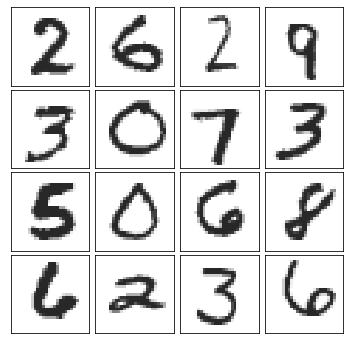

In [55]:
# Plot the MNIST sample data
plot_digits(X_test)

In [0]:
# pre-loaded
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=78))])

In [0]:
# X_train not available, cannot fit model

In [0]:
# Transform the input data to principal components
pc = pipe.transform(X_test)

In [0]:
# Prints the number of features per dataset
print("X_test has {} features".format(X_test.shape[1]))
print("pc has {} features".format(pc.shape[1]))

In [0]:
# Inverse transform the components to original feature space
X_rebuilt = pipe.inverse_transform(pc)

# Prints the number of features
print("X_rebuilt has {} features".format(X_rebuilt.shape[1]))

In [0]:
# Transform the input data to principal components
pc = pipe.transform(X_test)

# Inverse transform the components to original feature space
X_rebuilt = pipe.inverse_transform(pc)

# Plot the reconstructed data
plot_digits(X_rebuilt)